<p style = "font-size:40px; font-family:Garamond ; font-weight : strong; color :White   ; text-align: center;"> Personal Loan Modelling </p>
 <p style = "font-size:30px; font-family:Garamond ; font-weight : normal; color :White   ; text-align: center;">  Using Logistic Regression & Decision Tree</p> 

<center> <img src="PersonalLoan.jpg" style="width:600px;height:400px;" alt="Standard Scaler Image"> </center>


# **Table of Contents**

- [Context](#Context) 
- [Data Set](#Data-Set)
- [Problem](#Problem)
- [Libraries](#Libraries)
- [Read and Understand Data](#Read-and-Understand-data)
- [Data Preprocessing](#Data-Preprocessing)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis) 
    - [Univariate Analysis](#Univariate-Analysis) 
    
    - [Bivariate and Multivariate Analysis](#Bivariate-&-Multivariate-Analysis) 
- [Insights based on EDA](#Insights-based-on-EDA)
- [Model Building Logistic Regression](#Model-building-Logistic-Regression)
- [Model Building Decision Tree](#Model-building-Decision-Tree)
- [Conclusion](#Conclusion) 
- [Actionable Insights & Recommendations](#Actionable-Insights-&-Recommendations)

## Context
    
<font size=3 color="black" style="font-family:TimesNewRoman">
    

<p1 size=3 color="black" style="font-family:TimesNewRoman">
Thera Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

As a Data scientist at Thera Bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.</p>

**Motivation : To understand Logistic regression  and Decision tree and explore this algorthims using Sklearn, Statmodel,  Roc-Auc Curve,Precision Curve,Sequential feature selection, hyperparamter tuning Decision tress  and post pruning Decision trees**
  

## Data Set
<br>
<font size=3 color="black" style="font-family:TimesNewRoman">

* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

## Problem

    
- __To predict whether a liability customer will buy a personal loan or not.__
- __Which variables are most significant.__
- __Which segment of customers should be targeted more.__
- __Does Age have any impact of customer buying loan?__
- __Do people with less income borrow loans .?__


# Libraries

In [193]:
# Installing Zipcodes library
!pip install zipcodes


Defaulting to user installation because normal site-packages is not writeable


In [194]:
# Import Liberaries

import scipy.stats as stats
import pandas as pd
import numpy as np
import zipcodes as zcode  # to get zipcodes

import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
import warnings

import statsmodels.api as sm

# --Sklearn library--
# Sklearn package's randomized data splitting function
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

# AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
)  # to plot confusion matric

from sklearn.linear_model import LogisticRegression  # to build the model
from sklearn.tree import DecisionTreeClassifier  # to build the model

pd.set_option("display.float_format", lambda x: "%.3f" % x)
pd.set_option("display.max_rows", 300)
pd.set_option("display.max_colwidth", 400)
pd.set_option("display.float_format", lambda x: "%.5f" % x)
# To supress numerical display in scientific notations
warnings.filterwarnings("ignore")  # To supress warnings
# set the background for the graphs
plt.style.use("ggplot")


# Load DataSets

In [195]:
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
df.head()

ID  Age  Experience  Income  ZIP Code  Family   CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4 1.60000          1         0   
1   2   45          19      34     90089       3 1.50000          1         0   
2   3   39          15      11     94720       1 1.00000          1         0   
3   4   35           9     100     94112       1 2.70000          2         0   
4   5   35           8      45     91330       4 1.00000          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [196]:
df.tail()

ID  Age  Experience  Income  ZIP Code  Family   CCAvg  Education  \
4995  4996   29           3      40     92697       1 1.90000          3   
4996  4997   30           4      15     92037       4 0.40000          1   
4997  4998   63          39      24     93023       2 0.30000          3   
4998  4999   65          40      49     90034       3 0.50000          2   
4999  5000   28           4      83     92612       3 0.80000          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

# Shape

In [197]:
print(" Shape of Data: \n\n", df.shape)

 Shape of Data: 

 (5000, 14)


# Features Names

In [198]:
print("Feature Name : \n\n", df.columns.tolist())

Feature Name : 

 ['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


# Missing Values

In [199]:
print("Missing Values :  \n\n", df.isnull().sum().sort_values(ascending=False))

Missing Values :  

 ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


# Percentage of Missing

In [200]:
print(
    "Missing Values Percentage: \n\n",
    round(df.isna().sum() / df.isna().count() * 100, 2),
)

Missing Values Percentage: 

 ID                   0.00000
Age                  0.00000
Experience           0.00000
Income               0.00000
ZIP Code             0.00000
Family               0.00000
CCAvg                0.00000
Education            0.00000
Mortgage             0.00000
Personal Loan        0.00000
Securities Account   0.00000
CD Account           0.00000
Online               0.00000
CreditCard           0.00000
dtype: float64


In [201]:
# Unique Values
print("Unique values : \n\n", df.nunique())

Unique values : 

 ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64


# Data Info

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**There are no missing values in the dataset.  All the columns are numerical here. `Personal loan` is target variable.  Zipcode,Family,Education,Securities Account,CD_account,online,Credit card are all categorical variables.**

In [203]:
df.sample(10)

ID  Age  Experience  Income  ZIP Code  Family   CCAvg  Education  \
4832  4833   29           4      83     91950       4 2.20000          2   
3264  3265   67          41     114     95616       4 2.40000          3   
1385  1386   57          31      82     95032       2 2.00000          1   
1654  1655   60          34     102     94305       2 2.00000          1   
64      65   47          23     105     90024       2 3.30000          1   
4680  4681   46          21     154     90245       2 2.80000          1   
3763  3764   62          36      81     95051       3 4.40000          1   
2882  2883   55          31      69     90089       1 2.70000          2   
3949  3950   31           5      23     93407       1 0.40000          2   
450    451   51          25      69     95747       1 0.30000          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
4832         0              0                   0           0       1   
3264         0              0                   0           0       1   
1385        83              0                   0           0       0   
1654         0              0                   0           0       1   
64           0              0                   0           0       0   
4680        94              0                   0           0       0   
3763         0              0                   0           0       0   
2882         0              0                   1           0       0   
3949         0              0                   0           0       1   
450          0              0                   0           0       1   

      CreditCard  
4832           1  
3264           0  
1385           1  
1654           1  
64             0  
4680           0  
3763           1  
2882           1  
3949           1  
450            1

__No need of ID column and we can drop it__

In [204]:
df.drop("ID", axis=1, inplace=True)

# Data Preprocessig 

### Processing Zipcode

Zipcode is a categorical feature and can be a good predictor of target variable. We can analyse if there is any pattern on  location  for customers who had borrowed loaned during previous campaign. Trying to see if we can reduce the category


In [205]:
df.rename(
    columns={
        "ZIP Code": "ZIPCode",
        "Personal Loan": "PersonalLoan",
        "Securities Account": "SecuritiesAccount",
        "CD Account": "CDAccount",
    },
    inplace=True,
)
df.ZIPCode.nunique()

467

In [206]:
# get unique zipcodes
list_zipcode = df.ZIPCode.unique()


In [207]:
# here i am creating a dictionary of county by using library zipcode and matching method.

dict_zip = {}

for zipcode in list_zipcode:
    my_list_county = zcode.matching(zipcode.astype("str"))
    if (
        len(my_list_county) == 1
    ):  # if zipcode is present then get county else, assign zipcode to county
        county = my_list_county[0].get("county")

    else:
        county = zipcode

    dict_zip.update({zipcode: county})

In [208]:
dict_zip

{91107: 'Los Angeles County',
 90089: 'Los Angeles County',
 94720: 'Alameda County',
 94112: 'San Francisco County',
 91330: 'Los Angeles County',
 92121: 'San Diego County',
 91711: 'Los Angeles County',
 93943: 'Monterey County',
 93023: 'Ventura County',
 94710: 'Alameda County',
 90277: 'Los Angeles County',
 93106: 'Santa Barbara County',
 94920: 'Marin County',
 91741: 'Los Angeles County',
 95054: 'Santa Clara County',
 95010: 'Santa Cruz County',
 94305: 'Santa Clara County',
 91604: 'Los Angeles County',
 94015: 'San Mateo County',
 90095: 'Los Angeles County',
 91320: 'Ventura County',
 95521: 'Humboldt County',
 95064: 'Santa Cruz County',
 90064: 'Los Angeles County',
 94539: 'Alameda County',
 94104: 'San Francisco County',
 94117: 'San Francisco County',
 94801: 'Contra Costa County',
 94035: 'Santa Clara County',
 92647: 'Orange County',
 95814: 'Sacramento County',
 94114: 'San Francisco County',
 94115: 'San Francisco County',
 92672: 'Orange County',
 94122: 'San Fra

We got almost all county expect for `96651,92634,93077,92717`. We can fix this zip code by searching internet. Couldn't find for other zipcodes.

In [209]:
dict_zip.update({92717: "Orange County"})
dict_zip.update({92634: "Orange County"})


In [210]:
df["County"] = df["ZIPCode"].map(dict_zip)

In [211]:
df.head()

Age  Experience  Income  ZIPCode  Family   CCAvg  Education  Mortgage  \
0   25           1      49    91107       4 1.60000          1         0   
1   45          19      34    90089       3 1.50000          1         0   
2   39          15      11    94720       1 1.00000          1         0   
3   35           9     100    94112       1 2.70000          2         0   
4   35           8      45    91330       4 1.00000          2         0   

   PersonalLoan  SecuritiesAccount  CDAccount  Online  CreditCard  \
0             0                  1          0       0           0   
1             0                  1          0       0           0   
2             0                  0          0       0           0   
3             0                  0          0       0           0   
4             0                  0          0       0           1   

                 County  
0    Los Angeles County  
1    Los Angeles County  
2        Alameda County  
3  San Francisco County  
4    Los Angeles County

In [212]:
df.County.nunique()


40

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                5000 non-null   int64  
 1   Experience         5000 non-null   int64  
 2   Income             5000 non-null   int64  
 3   ZIPCode            5000 non-null   int64  
 4   Family             5000 non-null   int64  
 5   CCAvg              5000 non-null   float64
 6   Education          5000 non-null   int64  
 7   Mortgage           5000 non-null   int64  
 8   PersonalLoan       5000 non-null   int64  
 9   SecuritiesAccount  5000 non-null   int64  
 10  CDAccount          5000 non-null   int64  
 11  Online             5000 non-null   int64  
 12  CreditCard         5000 non-null   int64  
 13  County             5000 non-null   object 
dtypes: float64(1), int64(12), object(1)
memory usage: 547.0+ KB


### Fixing the data types
Personal_Loan, Securities_Account, CD_Account, 'Online', 'CreditCard' ,Education are of int/object type, we can change them to category type  to reduce the dataspace required.

In [214]:
# converting categorical varaible to category type

category_col = [
    "PersonalLoan",
    "SecuritiesAccount",
    "Family",
    "CDAccount",
    "Online",
    "CreditCard",
    "ZIPCode",
    "Education",
    "County",
]
df[category_col] = df[category_col].astype("category")


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                5000 non-null   int64   
 1   Experience         5000 non-null   int64   
 2   Income             5000 non-null   int64   
 3   ZIPCode            5000 non-null   category
 4   Family             5000 non-null   category
 5   CCAvg              5000 non-null   float64 
 6   Education          5000 non-null   category
 7   Mortgage           5000 non-null   int64   
 8   PersonalLoan       5000 non-null   category
 9   SecuritiesAccount  5000 non-null   category
 10  CDAccount          5000 non-null   category
 11  Online             5000 non-null   category
 12  CreditCard         5000 non-null   category
 13  County             5000 non-null   category
dtypes: category(9), float64(1), int64(4)
memory usage: 266.4 KB


__we can see that the memory usage has decreased from 547 to 266.__

### Processing Experience

In [216]:
# checking negative and zero values for experience

df[df["Experience"] < 0]["Age"].describe()

count   52.00000
mean    24.51923
std      1.47516
min     23.00000
25%     24.00000
50%     24.00000
75%     25.00000
max     29.00000
Name: Age, dtype: float64

__52 customers from age 23 - 30 have negative values in experience__

In [217]:
df[df["Experience"] < 0].sort_values(by="Experience", ascending=True)

Age  Experience  Income ZIPCode Family   CCAvg Education  Mortgage  \
4514   24          -3      41   91768      4 1.00000         3         0   
2618   23          -3      55   92704      3 2.40000         2       145   
4285   23          -3     149   93555      2 7.20000         1         0   
3626   24          -3      28   90089      4 1.00000         3         0   
2717   23          -2      45   95422      4 0.60000         2         0   
2876   24          -2      80   91107      2 1.60000         3       238   
3130   23          -2      82   92152      2 1.80000         2         0   
2466   24          -2      80   94105      2 1.60000         3         0   
3796   24          -2      50   94920      3 2.40000         2         0   
2962   23          -2      81   91711      2 1.80000         2         0   
793    24          -2     150   94720      2 2.00000         1         0   
3887   24          -2     118   92634      2 7.20000         1         0   
889    24          -2      82   91103      2 1.60000         3         0   
597    24          -2     125   92835      2 7.20000         1         0   
315    24          -2      51   90630      3 0.30000         3         0   
451    28          -2      48   94132      2 1.75000         3        89   
4116   24          -2     135   90065      2 7.20000         1         0   
4481   25          -2      35   95045      4 1.00000         3         0   
4411   23          -2      75   90291      2 1.80000         2         0   
4015   25          -1     139   93106      2 2.00000         1         0   
3157   23          -1      13   94720      4 1.00000         1        84   
3279   26          -1      44   94901      1 2.00000         2         0   
3284   25          -1     101   95819      4 2.10000         3         0   
3292   25          -1      13   95616      4 0.40000         1         0   
3394   25          -1     113   90089      4 2.10000         3         0   
3425   23          -1      12   91605      4 1.00000         1        90   
4088   29          -1      71   94801      2 1.75000         3         0   
3824   23          -1      12   95064      4 1.00000         1         0   
3946   25          -1      40   93117      3 2.40000         2         0   
3076   29          -1      62   92672      2 1.75000         3         0   
89     25          -1     113   94303      4 2.30000         3         0   
2848   24          -1      78   94720      2 1.80000         2         0   
226    24          -1      39   94085      2 1.70000         2         0   
524    24          -1      75   93014      4 0.20000         1         0   
536    25          -1      43   92173      3 2.40000         2       176   
540    25          -1     109   94010      4 2.30000         3       314   
576    25          -1      48   92870      3 0.30000         3         0   
583    24          -1      38   95045      2 1.70000         2         0   
649    25          -1      82   92677      4 2.10000         3         0   
670    23          -1      61   92374      4 2.60000         1       239   
2980   25          -1      53   94305      3 2.40000         2         0   
686    24          -1      38   92612      4 0.60000         2         0   
1173   24          -1      35   94305      2 1.70000         2         0   
1428   25          -1      21   94583      4 0.40000         1        90   
1522   25          -1     101   94720      4 2.30000         3       256   
1905   25          -1     112   92507      2 2.00000         1       241   
2102   25          -1      81   92647      2 1.60000         3         0   
2430   23          -1      73   92120      4 2.60000         1         0   
2545   25          -1      39   94720      3 2.40000         2         0   
4582   25          -1      69   92691      3 0.30000         3         0   
909    23          -1     149   91709      1 6.33000         1       305   
4957   29          -1      50   95842      2 1.75000  

In [218]:
df.groupby(["Age", "Education"])["Experience"].describe().T

Age             23                24                         25           \
Education        1        2        1        2        3        1        2   
count      7.00000  5.00000 13.00000  8.00000  7.00000 23.00000 11.00000   
mean      -1.28571 -2.20000 -0.69231 -0.87500 -2.00000  0.52174 -0.27273   
std        0.75593  0.44721  0.94733  0.64087  1.00000  0.79026  0.64667   
min       -3.00000 -3.00000 -2.00000 -2.00000 -3.00000 -1.00000 -1.00000   
25%       -1.00000 -2.00000 -2.00000 -1.00000 -2.50000  0.00000 -1.00000   
50%       -1.00000 -2.00000  0.00000 -1.00000 -2.00000  1.00000  0.00000   
75%       -1.00000 -2.00000  0.00000 -0.75000 -2.00000  1.00000  0.00000   
max       -1.00000 -2.00000  0.00000  0.00000  0.00000  1.00000  1.00000   

Age                      26           ...       64       65                    \
Education        3        1        2  ...        3        1        2        3   
count     19.00000 30.00000 24.00000  ... 30.00000 30.00000 23.00000 27.00000   
mean      -0.52632  1.43333  0.75000  ... 38.53333 39.86667 40.08696 39.51852   
std        0.69669  0.81720  0.84699  ...  1.75643  0.73030  0.73318  1.55342   
min       -2.00000  0.00000 -1.00000  ... 34.00000 39.00000 39.00000 35.00000   
25%       -1.00000  1.00000  0.00000  ... 38.00000 39.00000 40.00000 39.00000   
50%       -1.00000  2.00000  1.00000  ... 39.00000 40.00000 40.00000 40.00000   
75%        0.00000  2.00000  1.00000  ... 40.00000 40.00000 41.00000 41.00000   
max        1.00000  2.00000  2.00000  ... 40.00000 41.00000 41.00000 41.00000   

Age             66                         67                    
Education        1        2        3        1        2        3  
count      9.00000  5.00000 10.00000  5.00000  3.00000  4.00000  
mean      41.11111 41.40000 40.40000 41.60000 42.66667 41.50000  
std        0.33333  0.54772  1.64655  0.89443  0.57735  0.57735  
min       41.00000 41.00000 36.00000 41.00000 42.00000 41.00000  
25%       41.00000 41.00000 40.25000 41.00000 42.50000 41.00000  
50%       41.00000 41.00000 41.00000 41.00000 43.00000 41.50000  
75%       41.00000 42.00000 41.00000 42.00000 43.00000 42.00000  
max       42.00000 42.00000 42.00000 43.00000 43.00000 42.00000  

[8 rows x 134 columns]

__Its seems experience is negative for all observation with for age 23,24, and few others . Based on there age and education it seems values were negative by mistake. so changing it to absoulte values of experience.__

In [219]:
df.loc[df["Experience"] < 0, "Experience"] = np.abs(df["Experience"])

In [220]:
df[df["Experience"] == 0]["Age"].describe()

count   66.00000
mean    25.63636
std      1.14538
min     24.00000
25%     25.00000
50%     26.00000
75%     26.00000
max     30.00000
Name: Age, dtype: float64

__checking age and income for customers with 0 experience. We will see how to impute this columns more after EDA.__

# Exploratory Data Analysis

In [221]:
df.describe()

Age  Experience     Income      CCAvg   Mortgage
count 5000.00000  5000.00000 5000.00000 5000.00000 5000.00000
mean    45.33840    20.13460   73.77420    1.93794   56.49880
std     11.46317    11.41519   46.03373    1.74766  101.71380
min     23.00000     0.00000    8.00000    0.00000    0.00000
25%     35.00000    10.00000   39.00000    0.70000    0.00000
50%     45.00000    20.00000   64.00000    1.50000    0.00000
75%     55.00000    30.00000   98.00000    2.50000  101.00000
max     67.00000    43.00000  224.00000   10.00000  635.00000

In [222]:
for column in category_col:
    print(df[column].value_counts())

PersonalLoan
0    4520
1     480
Name: count, dtype: int64
SecuritiesAccount
0    4478
1     522
Name: count, dtype: int64
Family
1    1472
2    1296
4    1222
3    1010
Name: count, dtype: int64
CDAccount
0    4698
1     302
Name: count, dtype: int64
Online
1    2984
0    2016
Name: count, dtype: int64
CreditCard
0    3530
1    1470
Name: count, dtype: int64
ZIPCode
94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
94087      1
90813      1
94404      1
90068      1
9307       1
Name: count, Length: 467, dtype: int64
Education
1    2096
3    1501
2    1403
Name: count, dtype: int64
County
Los Angeles County        1095
San Diego County           568
Santa Clara County         563
Alameda County             500
Orange County              366
San Francisco County       257
San Mateo County           204
Sacramento County          184
Santa Barbara County       154
Yolo County                130
Monterey County            128
Ventura County             114
San

### Observations

- Customers age is in range of `23 - 67 `, with mean and median  of `~45`.
- Maximum experience is `43` years. where as mean and median are `~20`.
- Income are in range  `8k to 224k` USD. Mean is `73k` USD and median is `64k` USD. 224 Max salary need to be verified
- Maximum mortgage taken is `635k` USD.Need to verify this
- Average spending on credit card per month  ranges from `1- 10k` with mean of `1.9kUSD` and median of `1.5k USD`
- `1095` customers are from `Los Angeles County`.
- `480` customers had borrowed loan before.


### Univariate Analysis

# Spreade of Numerical Columns ----> Numerical Features analysis

In [223]:
def dist_box(data):
    # function plots a combined graph for univariate analysis of continous variable
    # to check spread, central tendency , dispersion and outliers
    Name = data.name.upper()
    fig, (ax_box, ax_dis) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=(8, 5),
    )
    mean = data.mean()
    median = data.median()
    mode = data.mode().tolist()[0]
    sns.set_theme(style="white")
    fig.suptitle("SPREAD OF DATA FOR " + Name, fontsize=18, fontweight="bold")
    sns.boxplot(x=data, showmeans=True, orient="h", color="violet", ax=ax_box)
    ax_box.set(xlabel="")
    # just trying to make visualisation better. This will set background to white
    sns.despine(top=True, right=True, left=True)  # to remove side line from graph
    sns.distplot(data, kde=False, color="blue", ax=ax_dis)
    ax_dis.axvline(mean, color="r", linestyle="--", linewidth=2)
    ax_dis.axvline(median, color="g", linestyle="-", linewidth=2)
    ax_dis.axvline(mode, color="y", linestyle="-", linewidth=2)
    plt.legend({"Mean": mean, "Median": median, "Mode": mode})

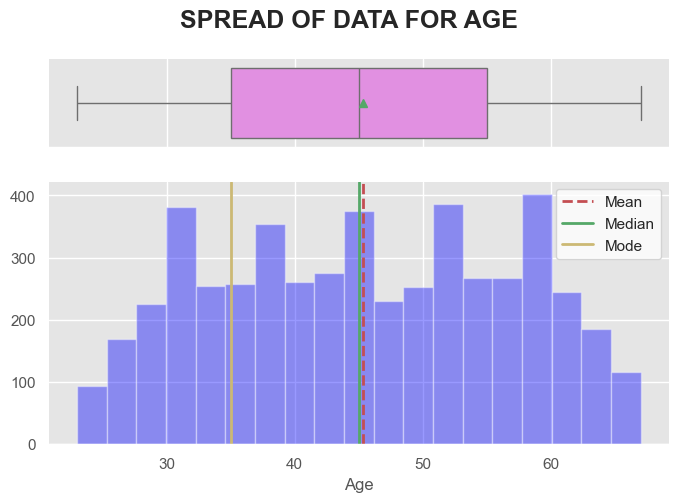

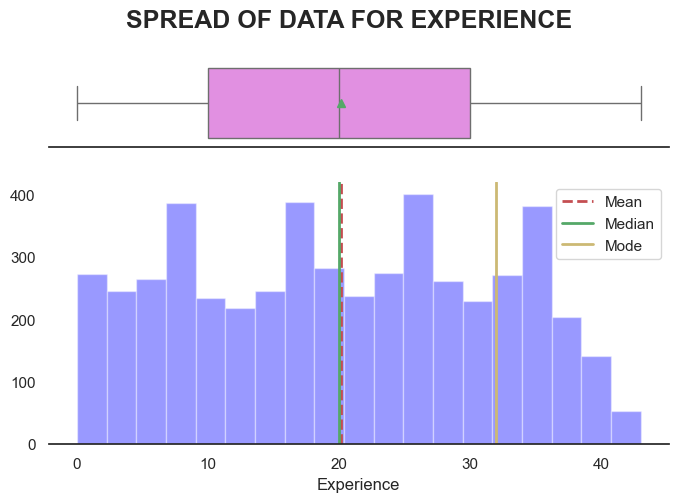

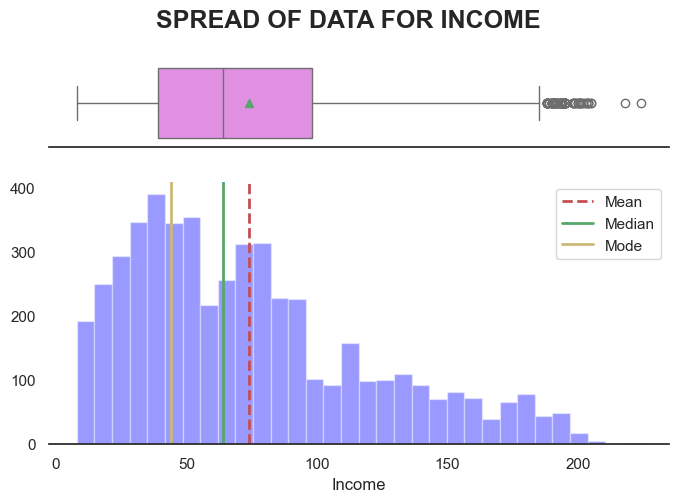

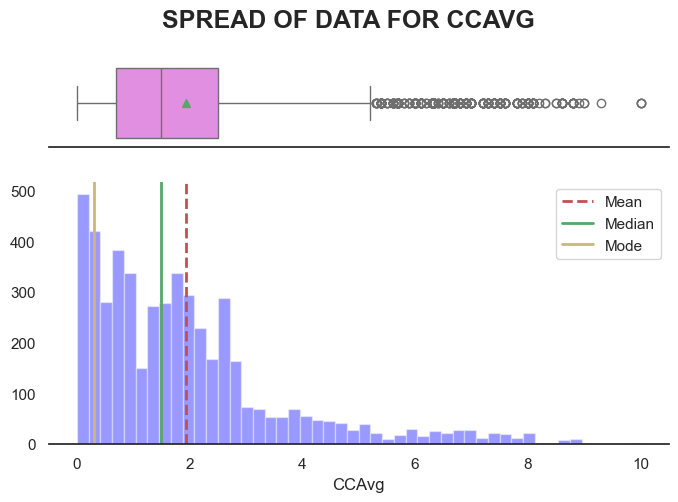

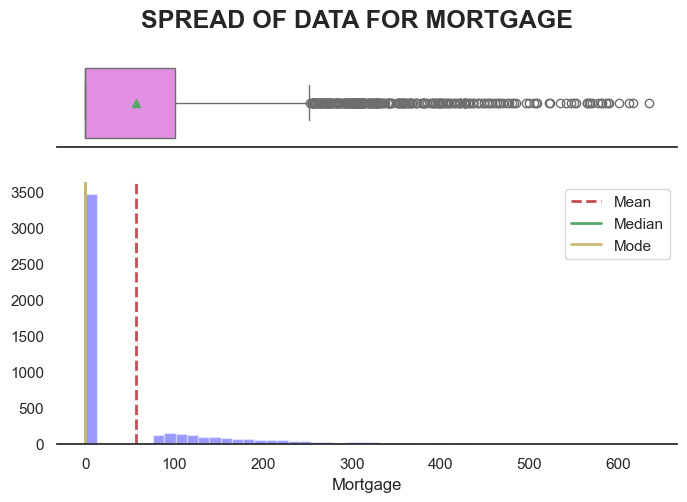

In [224]:
# select all quantitative columns for checking the spread
list_col = df.select_dtypes(include=["number"]).columns.tolist()
for i in range(len(list_col)):
    dist_box(df[list_col[i]])


### Observations

- Age and experience both has same distribution with spike at 5 points.
- Income is right skewed and has some outliers on higher side which can be clipped.
- Average monthly credit is right skewed and has lot of outliers on higher side which can be clipped.
- Mortgage is mostly 0. but is right skewed and has lot of outlier on higher side which can be clipped

### Categorizing Age ,Income and Spending

### Age

__Age can be a vital factor in borrowinng loan, converting ages to bins to explore if there is any pattern__

In [225]:
df["Agebin"] = pd.cut(
    df["Age"],
    bins=[0, 30, 40, 50, 60, 100],
    labels=["18-30", "31-40", "41-50", "51-60", "60-100"],
)

### Income

__To understand customers segments derving new columns which will help us identify if customer belongs to Upper, middle or lower income group__

In [226]:
# Create a new variable - Income group

df["Income_group"] = pd.cut(
    x=df["Income"], bins=[0, 50, 140, 224], labels=["Lower", "Middle", "High"]
)

### Spending

__To understand customers spending derving new columns which will say if customer belongs to Upper
middle or lower spending__

In [227]:
df.CCAvg.describe()


count   5000.00000
mean       1.93794
std        1.74766
min        0.00000
25%        0.70000
50%        1.50000
75%        2.50000
max       10.00000
Name: CCAvg, dtype: float64

In [228]:
df["Spending_group"] = pd.cut(
    x=df["CCAvg"],
    bins=[0.00000, 0.70000, 2.50000, 10.00000],
    labels=["low", "Medium", "High"],
    include_lowest=True,
)

# Count Plot of Categorical columns ---> Categorical Features analysis

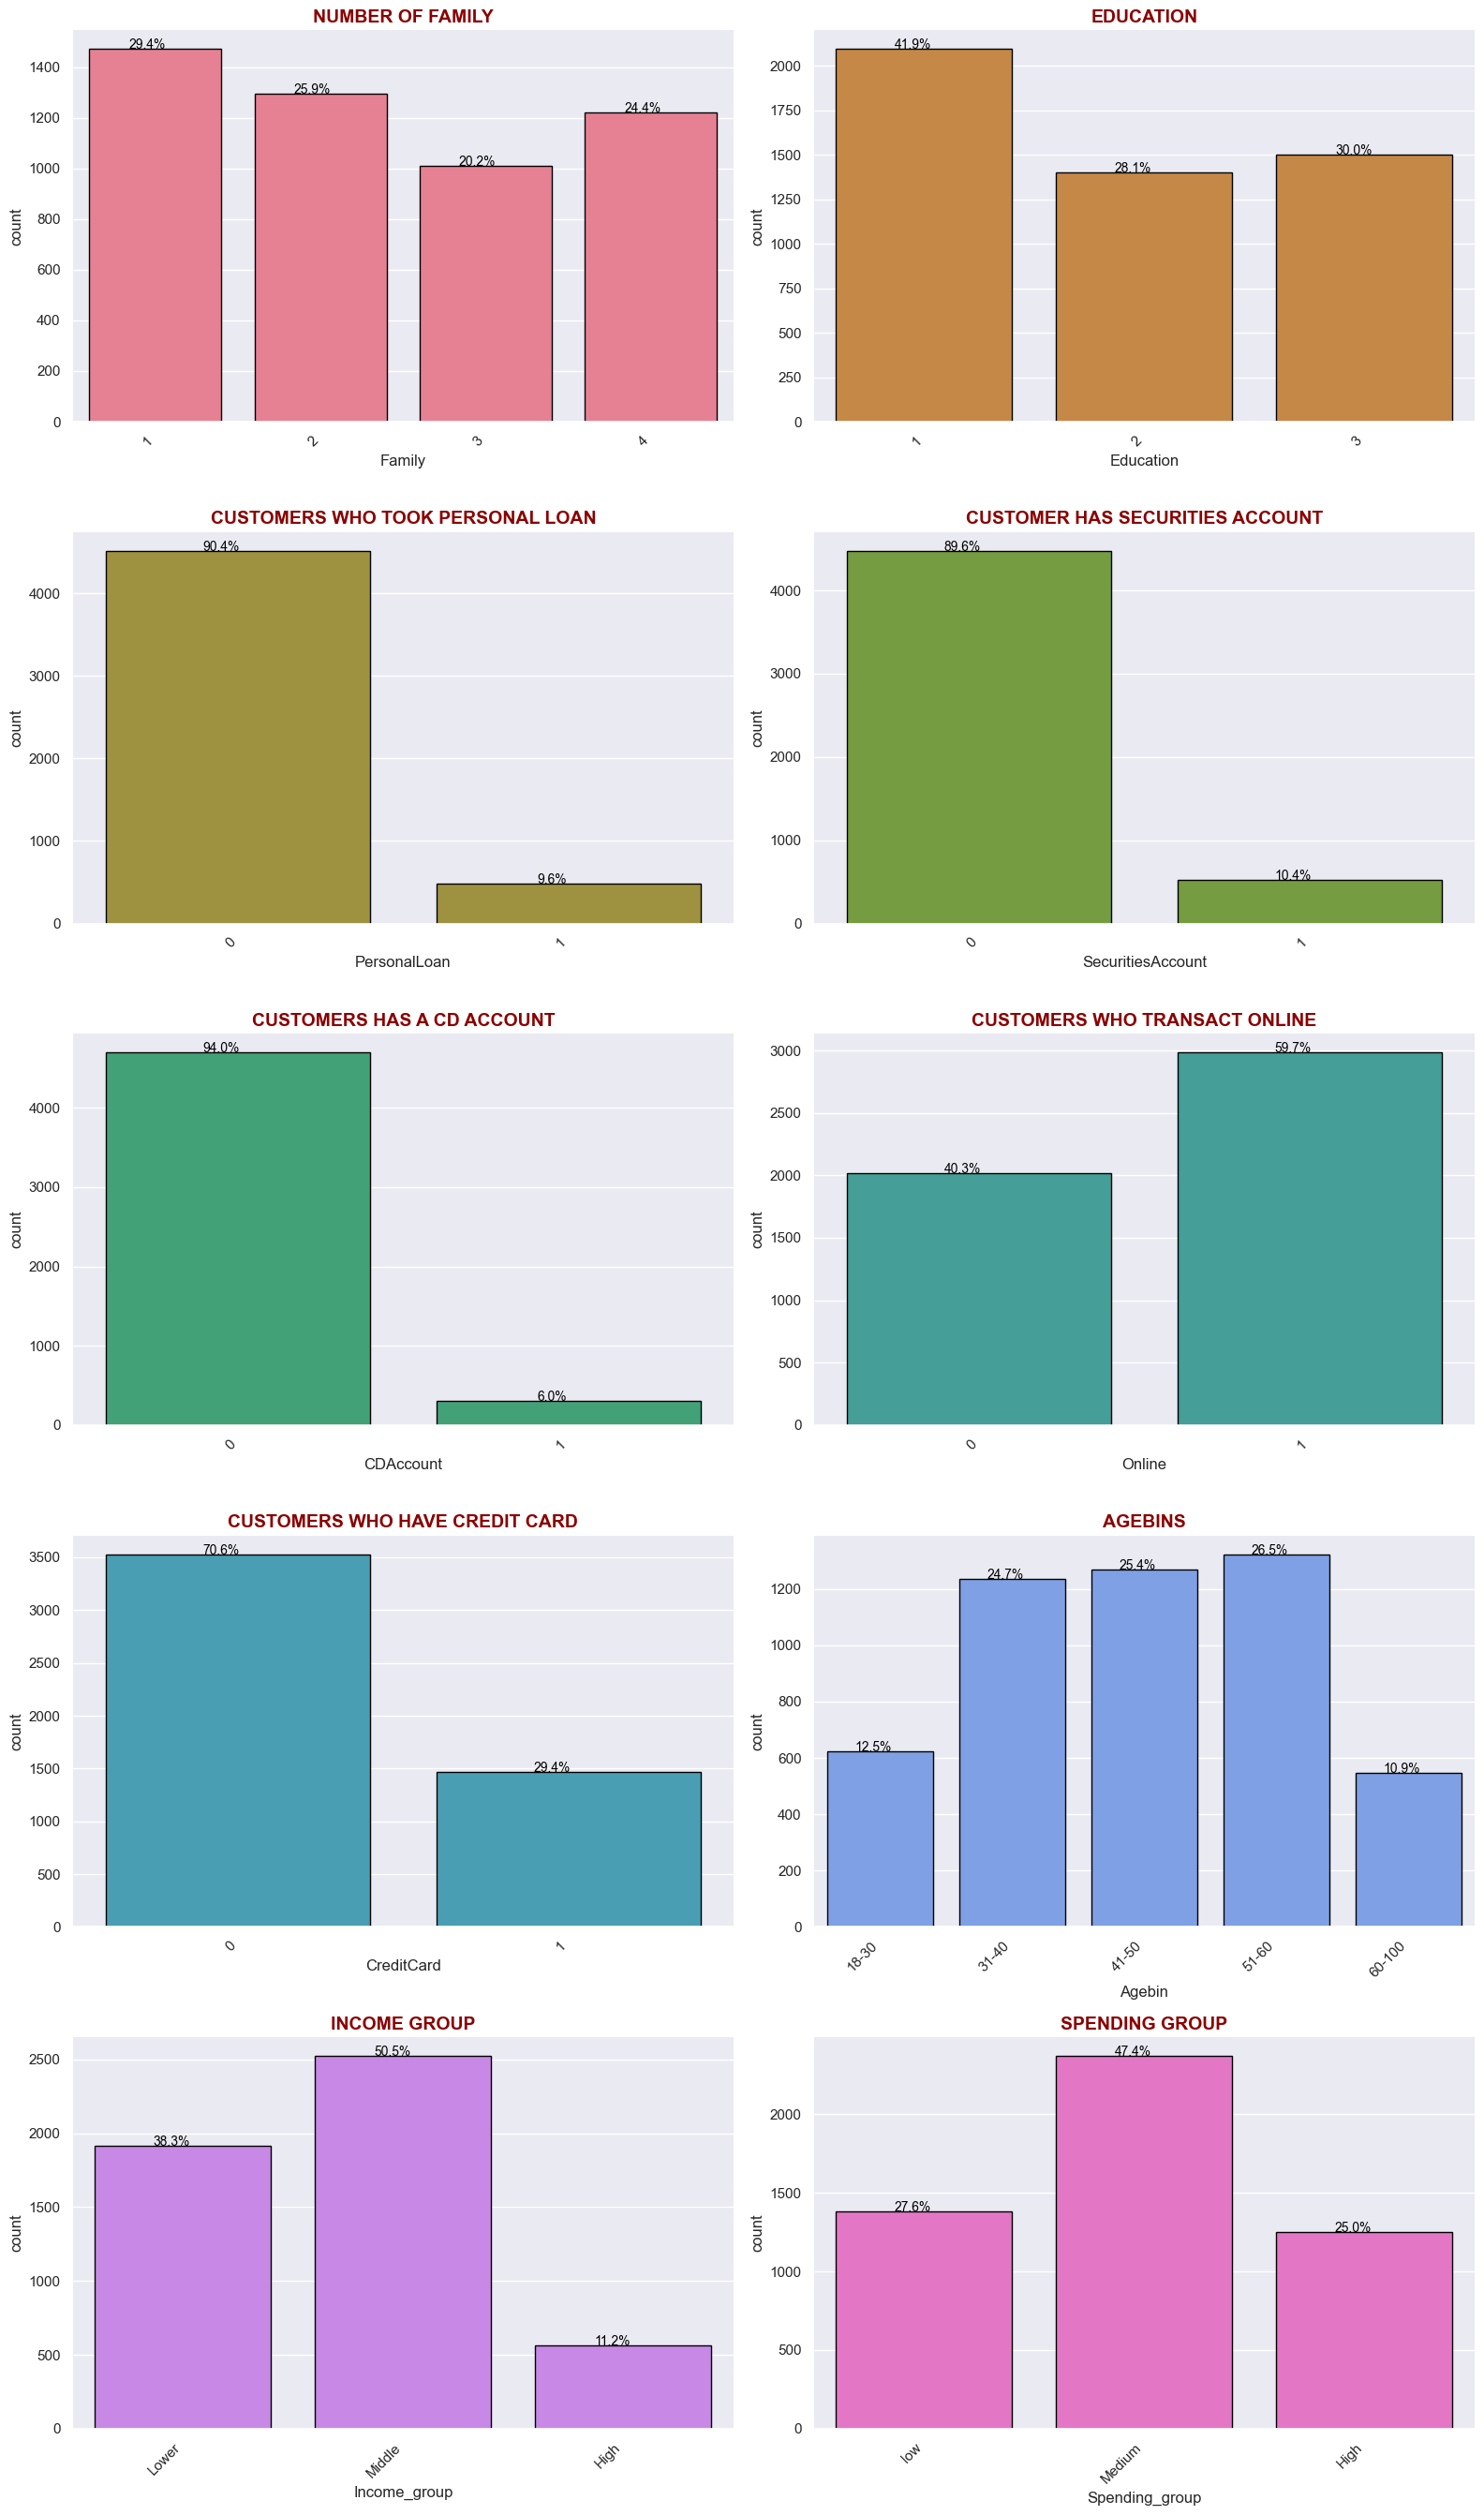

In [229]:
cat_columns = [
    "Family",
    "Education",
    "PersonalLoan",
    "SecuritiesAccount",
    "CDAccount",
    "Online",
    "CreditCard",
    "Agebin",
    "Income_group",
    "Spending_group",
]

title = [
    "Number of Family",
    "Education",
    "Customers who took Personal Loan",
    "Customer has Securities Account",
    "Customers has a CD Account",
    "Customers who transact Online",
    "Customers who have Credit Card",
    "Agebins",
    "Income group",
    "Spending group",
]

# Set vibrant background and theme
sns.set_theme(style="darkgrid", palette="bright")

# Define a vibrant color palette
color_palettes = sns.color_palette("husl", len(cat_columns))

plt.figure(figsize=(16, 27))  # Larger figure size for better visuals

for i, variable in enumerate(cat_columns):
    plt.subplot(5, 2, i + 1)
    ax = sns.countplot(
        x=df[variable],
        data=df,
        palette=[color_palettes[i]],  # Assign a unique color from the palette
        edgecolor="black",  # Add edge for definition
    )
    sns.despine(top=True, right=True, left=True)

    # Annotate percentages on each bar
    for p in ax.patches:
        percentage = "{:.1f}%".format(100 * p.get_height() / len(df[variable]))
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plt.annotate(percentage, (x, y), ha="center", fontsize=10, color="black")

    # Rotate x-axis labels if needed
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

    # Set title with bold styling and larger font
    plt.title(title[i].upper(), fontsize=14, fontweight="bold", color="darkred")

    plt.tight_layout()


### Observations

- `~29.4 %` customers are single.
- `~41.9%` customers are undergrad.
- `~9.6%` bought  a personal loan from the bank.
- `10.4 %` customers have a securities account with the bank
- `6 %` customer have a CD account.
- `60%` customers  transact online.
- `29.4%` customers have  credit cards.  
- `~ 75 %` of customers  are in range of 31- 60.
- `~ 50 %` Most of bank customers belong to middle income group.
- `~48 %` of customers has medium Average spending

In [230]:
df.groupby(["County", "PersonalLoan"])["PersonalLoan"].agg({"size"}).unstack()

size     
PersonalLoan              0    1
County                          
9307                      1    0
96651                     6    0
Alameda County          456   44
Butte County             17    2
Contra Costa County      73   12
El Dorado County         16    1
Fresno County            24    2
Humboldt County          30    2
Imperial County           3    0
Kern County              47    7
Lake County               4    0
Los Angeles County      984  111
Marin County             48    6
Mendocino County          7    1
Merced County             4    0
Monterey County         113   15
Napa County               3    0
Orange County           333   33
Placer County            22    2
Riverside County         50    6
Sacramento County       169   15
San Benito County        14    0
San Bernardino County    98    3
San Diego County        509   59
San Francisco County    238   19
San Joaquin County       12    1
San Luis Obispo County   28    5
San Mateo County        192   12
Santa Barbara County    143   11
Santa Clara County      492   71
Santa Cruz County        60    8
Shasta County            15    3
Siskiyou County           7    0
Solano County            30    3
Sonoma County            22    6
Stanislaus County        14    1
Trinity County            4    0
Tuolumne County           7    0
Ventura County          103   11
Yolo County             122    8

# Cross tab of County and PersonalLoan

In [231]:
df["PersonalLoan"].unique()

[0, 1]
Categories (2, int64): [0, 1]

Text(0, 0.5, 'County')

<Figure size 1500x2400 with 0 Axes>

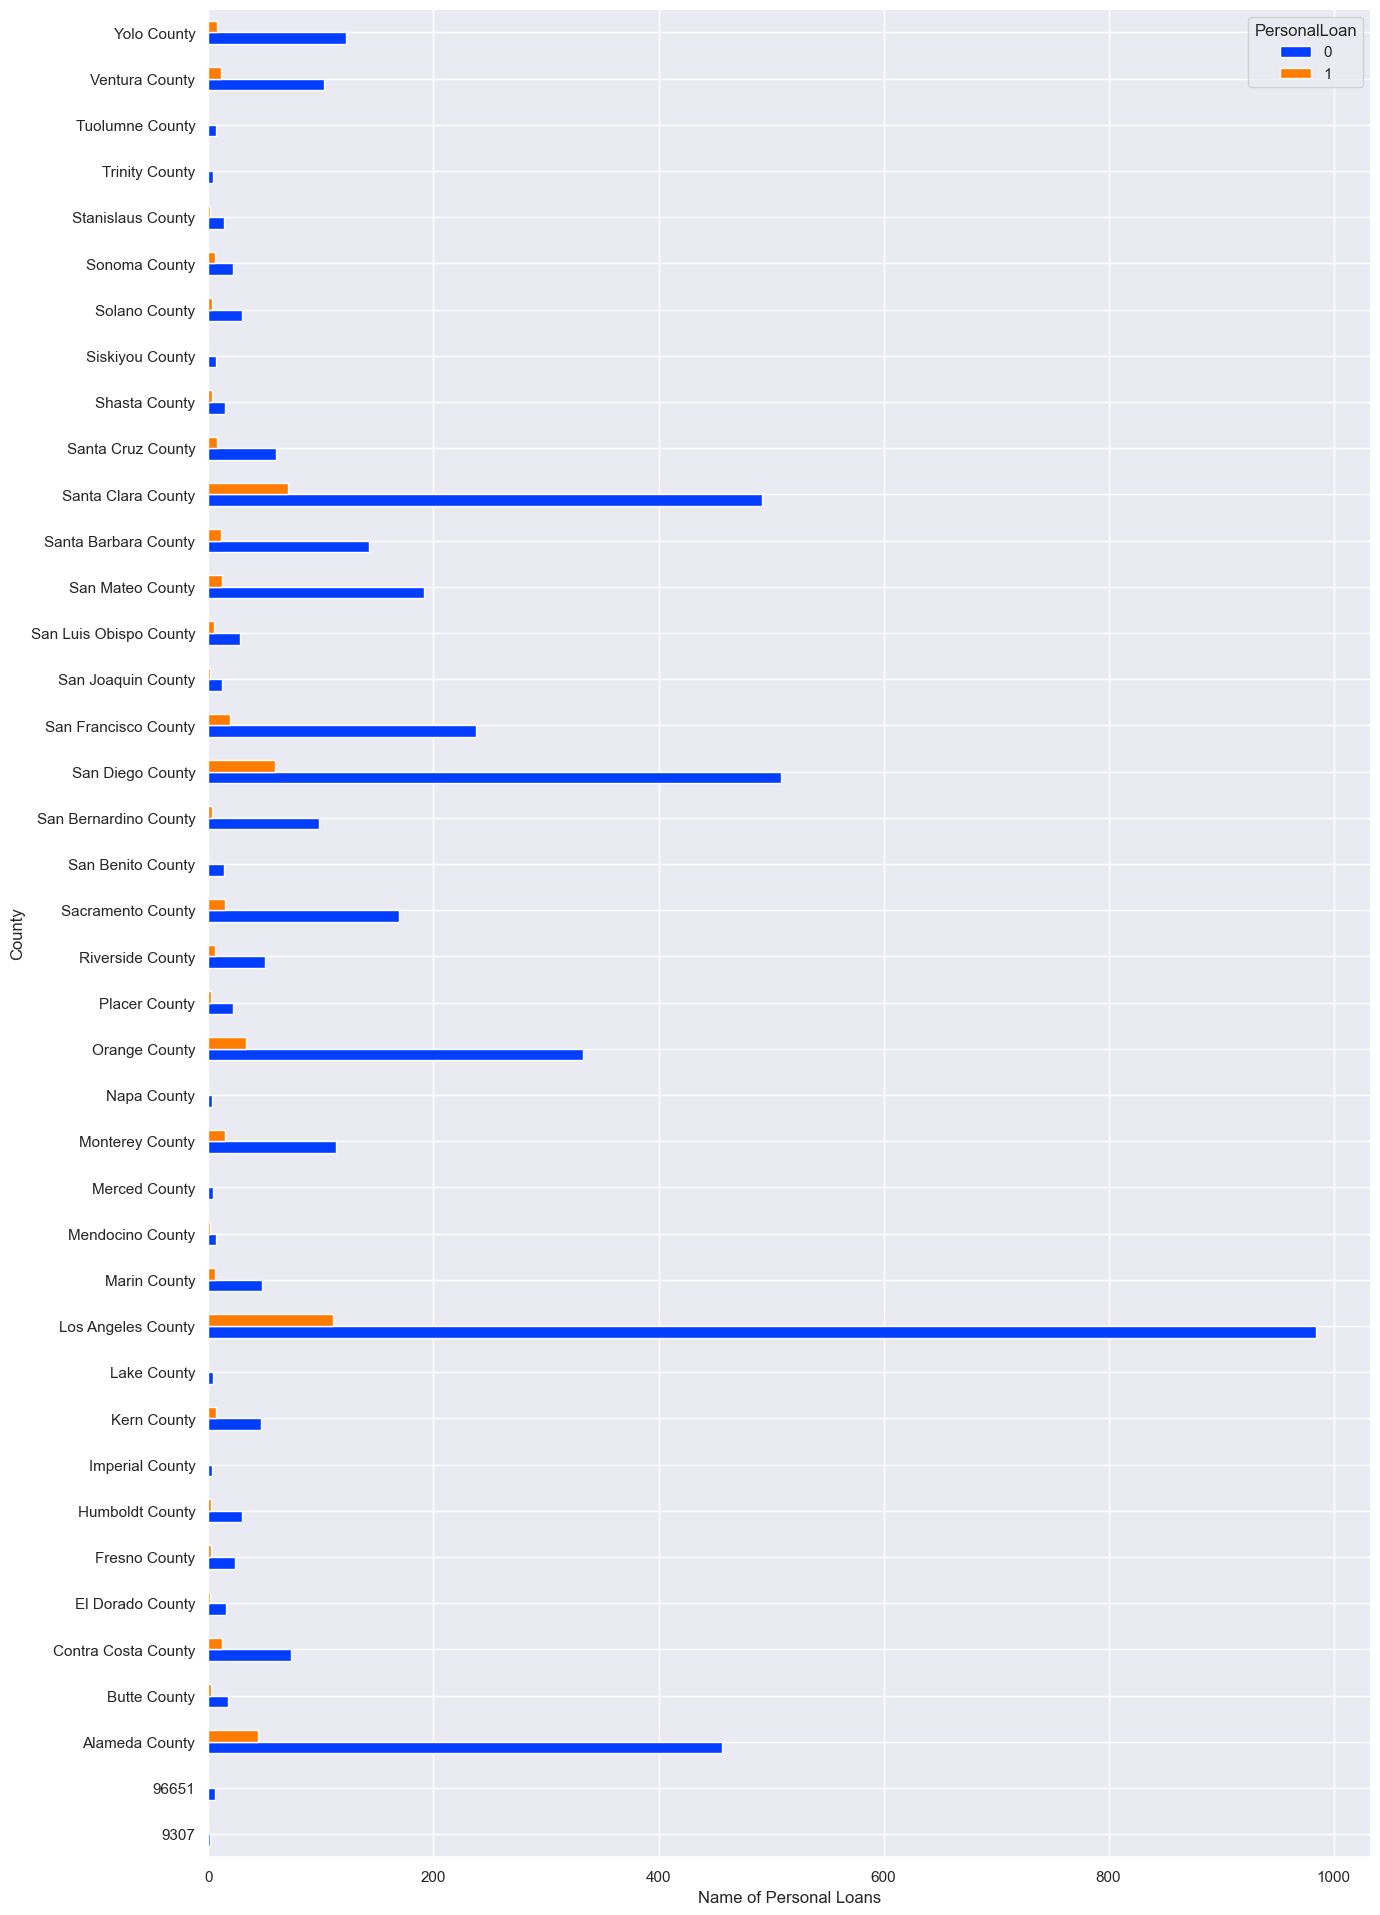

In [232]:
plt.figure(figsize=(15, 24))

pd.crosstab(
    index=df["County"], columns=df["PersonalLoan"].sort_values(ascending=False)
).plot(kind="barh", figsize=(15, 24))
plt.xlabel("Name of Personal Loans")
plt.ylabel("County")

__It can be seen the percentage of loan taken from various country differ.There are so many county converting them to regions will help in our model 
(not conversing to regions may cause high cardinality problem)__


In [233]:
categorical_values = df["County"].unique().tolist()
categorical_values

['Los Angeles County',
 'Alameda County',
 'San Francisco County',
 'San Diego County',
 'Monterey County',
 'Ventura County',
 'Santa Barbara County',
 'Marin County',
 'Santa Clara County',
 'Santa Cruz County',
 'San Mateo County',
 'Humboldt County',
 'Contra Costa County',
 'Orange County',
 'Sacramento County',
 'Yolo County',
 'Placer County',
 'San Bernardino County',
 'San Luis Obispo County',
 'Riverside County',
 'Kern County',
 'Fresno County',
 'Sonoma County',
 'El Dorado County',
 'San Benito County',
 'Butte County',
 'Solano County',
 9307,
 'Mendocino County',
 'San Joaquin County',
 96651,
 'Imperial County',
 'Siskiyou County',
 'Merced County',
 'Trinity County',
 'Stanislaus County',
 'Shasta County',
 'Tuolumne County',
 'Napa County',
 'Lake County']

In [234]:
counties = {
    "Los Angeles County": "Los Angeles Region",
    "San Diego County": "Southern",
    "Santa Clara County": "Bay Area",
    "Alameda County": "Bay Area",
    "Orange County": "Southern",
    "San Francisco County": "Bay Area",
    "San Mateo County": "Bay Area",
    "Sacramento County": "Central",
    "Santa Barbara County": "Southern",
    "Yolo County": "Central",
    "Monterey County": "Bay Area",
    "Ventura County": "Southern",
    "San Bernardino County": "Southern",
    "Contra Costa County": "Bay Area",
    "Santa Cruz County": "Bay Area",
    "Riverside County": "Southern",
    "Kern County": "Southern",
    "Marin County": "Bay Area",
    "San Luis Obispo County": "Southern",
    "Solano County": "Bay Area",
    "Humboldt County": "Superior",
    "Sonoma County": "Bay Area",
    "Fresno County": "Central",
    "Placer County": "Central",
    "Butte County": "Superior",
    "Shasta County": "Superior",
    "El Dorado County": "Central",
    "Stanislaus County": "Central",
    "San Benito County": "Bay Area",
    "San Joaquin County": "Central",
    "Mendocino County": "Superior",
    "Tuolumne County": "Central",
    "Siskiyou County": "Superior",
    "Trinity County": "Superior",
    "Merced County": "Central",
    "Lake County": "Superior",
    "Napa County": "Bay Area",
    "Imperial County": "Southern",
    93077: "Southern",
    96651: "Bay Area",
}

**Converting the county to regions based on  https://www.calbhbc.org/region-map-and-listing.html**

In [235]:
df["Regions"] = df["County"].map(counties)
df["Regions"] = df["Regions"].astype("category")

In [236]:
df.head()

Age  Experience  Income ZIPCode Family   CCAvg Education  Mortgage  \
0   25           1      49   91107      4 1.60000         1         0   
1   45          19      34   90089      3 1.50000         1         0   
2   39          15      11   94720      1 1.00000         1         0   
3   35           9     100   94112      1 2.70000         2         0   
4   35           8      45   91330      4 1.00000         2         0   

  PersonalLoan SecuritiesAccount CDAccount Online CreditCard  \
0            0                 1         0      0          0   
1            0                 1         0      0          0   
2            0                 0         0      0          0   
3            0                 0         0      0          0   
4            0                 0         0      0          1   

                 County Agebin Income_group Spending_group             Regions  
0    Los Angeles County  18-30        Lower         Medium  Los Angeles Region  
1    Los Angeles County  41-50        Lower         Medium  Los Angeles Region  
2        Alameda County  31-40        Lower         Medium            Bay Area  
3  San Francisco County  31-40       Middle           High            Bay Area  
4    Los Angeles County  31-40        Lower         Medium  Los Angeles Region

In [237]:
df["Regions"].unique()

['Los Angeles Region', 'Bay Area', 'Southern', 'Superior', 'Central', NaN]
Categories (5, object): ['Bay Area', 'Central', 'Los Angeles Region', 'Southern', 'Superior']

In [238]:
df.isnull().sum()

Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
County               0
Agebin               0
Income_group         0
Spending_group       0
Regions              1
dtype: int64

In [239]:
df.dropna(inplace=True)

In [240]:
df

Age  Experience  Income ZIPCode Family   CCAvg Education  Mortgage  \
0      25           1      49   91107      4 1.60000         1         0   
1      45          19      34   90089      3 1.50000         1         0   
2      39          15      11   94720      1 1.00000         1         0   
3      35           9     100   94112      1 2.70000         2         0   
4      35           8      45   91330      4 1.00000         2         0   
...   ...         ...     ...     ...    ...     ...       ...       ...   
4995   29           3      40   92697      1 1.90000         3         0   
4996   30           4      15   92037      4 0.40000         1        85   
4997   63          39      24   93023      2 0.30000         3         0   
4998   65          40      49   90034      3 0.50000         2         0   
4999   28           4      83   92612      3 0.80000         1         0   

     PersonalLoan SecuritiesAccount CDAccount Online CreditCard  \
0               0                 1         0      0          0   
1               0                 1         0      0          0   
2               0                 0         0      0          0   
3               0                 0         0      0          0   
4               0                 0         0      0          1   
...           ...               ...       ...    ...        ...   
4995            0                 0         0      1          0   
4996            0                 0         0      1          0   
4997            0                 0         0      0          0   
4998            0                 0         0      1          0   
4999            0                 0         0      1          1   

                    County  Agebin Income_group Spending_group  \
0       Los Angeles County   18-30        Lower         Medium   
1       Los Angeles County   41-50        Lower         Medium   
2           Alameda County   31-40        Lower         Medium   
3     San Francisco County   31-40       Middle           High   
4       Los Angeles County   31-40        Lower         Medium   
...                    ...     ...          ...            ...   
4995         Orange County   18-30        Lower         Medium   
4996      San Diego County   18-30        Lower            low   
4997        Ventura County  60-100        Lower            low   
4998    Los Angeles County  60-100        Lower            low   
4999         Orange County   18-30       Middle         Medium   

                 Regions  
0     Los Angeles Region  
1     Los Angeles Region  
2               Bay Area  
3               Bay Area  
4     Los Angeles Region  
...                  ...  
4995            Southern  
4996            Southern  
4997            Southern  
4998  Los Angeles Region  
4999            Southern  

[4999 rows x 18 columns]

# Count plot of  Regions --> After categorizing countys to regions 

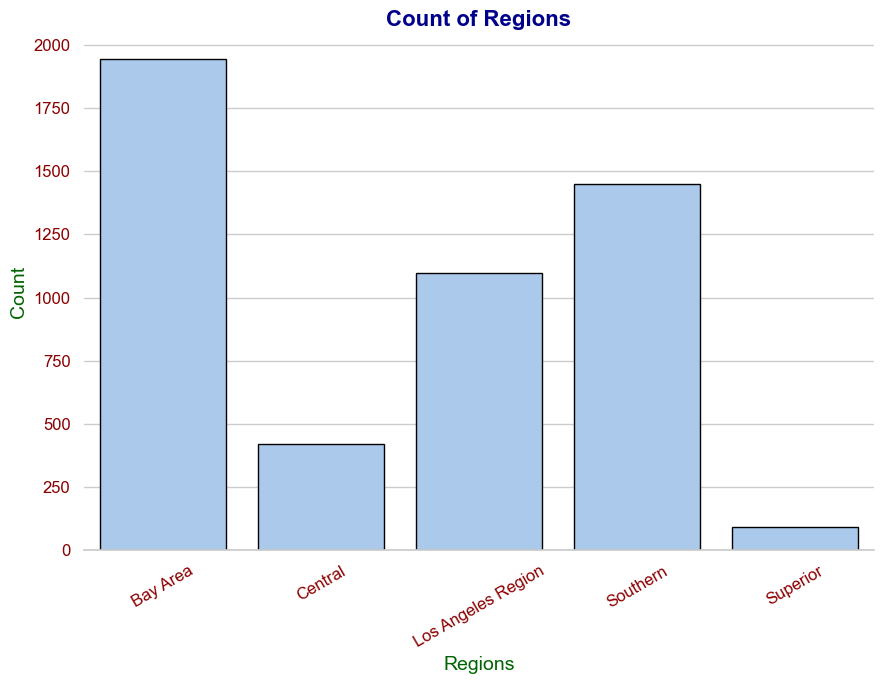

In [241]:
# Set a beautiful style
sns.set_style("whitegrid")
sns.set_palette("pastel")  # Choose a pastel color palette

plt.figure(figsize=(9, 7))  # Adjusting figure size
sns.countplot(
    data=df, x="Regions", edgecolor="black"
)  # Adding edge color for better visibility

# Customize the plot
plt.title(
    "Count of Regions", fontsize=16, fontweight="bold", color="darkblue"
)  # Add a title
plt.xlabel("Regions", fontsize=14, color="darkgreen")  # Label for x-axis
plt.ylabel("Count", fontsize=14, color="darkgreen")  # Label for y-axis

# Remove unnecessary spines
sns.despine(top=True, right=True, left=True)

plt.xticks(fontsize=12, rotation=30, color="darkred")  # Customize x-axis ticks
plt.yticks(fontsize=12, color="darkred")  # Customize y-axis ticks

plt.tight_layout()  # Ensure proper spacing
plt.show()

### Bivariate & Multivariate Analysis

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4999 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                4999 non-null   int64   
 1   Experience         4999 non-null   int64   
 2   Income             4999 non-null   int64   
 3   ZIPCode            4999 non-null   category
 4   Family             4999 non-null   category
 5   CCAvg              4999 non-null   float64 
 6   Education          4999 non-null   category
 7   Mortgage           4999 non-null   int64   
 8   PersonalLoan       4999 non-null   category
 9   SecuritiesAccount  4999 non-null   category
 10  CDAccount          4999 non-null   category
 11  Online             4999 non-null   category
 12  CreditCard         4999 non-null   category
 13  County             4999 non-null   category
 14  Agebin             4999 non-null   category
 15  Income_group       4999 non-null   category
 16  Spending_gr

# Correlation between columns --> using heatmap

In [243]:
numerical_df = df.select_dtypes(include="number")

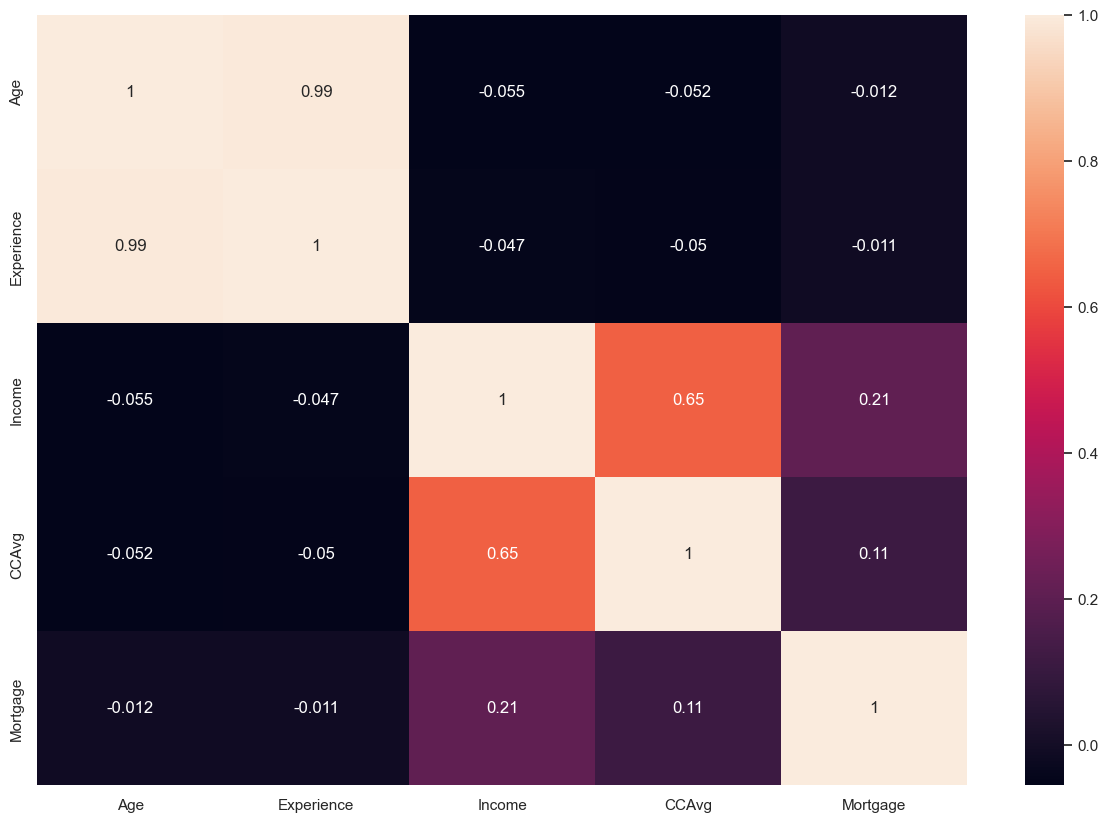

In [244]:
sns.set_palette(sns.color_palette("Set2", 8))
plt.figure(figsize=(15, 10))
sns.heatmap(numerical_df.corr(), annot=True)
plt.show()


### Observation
- __As expected Age and experience are highly correlated and one of them can be dropped.Since we had to handle 0, will drop experience.__
- __Income and Average spending on  credit card are  positively corrleated.__
- __Mortgage has very little correlation with income.__


# Pair plot of columnns --> Numerical columns

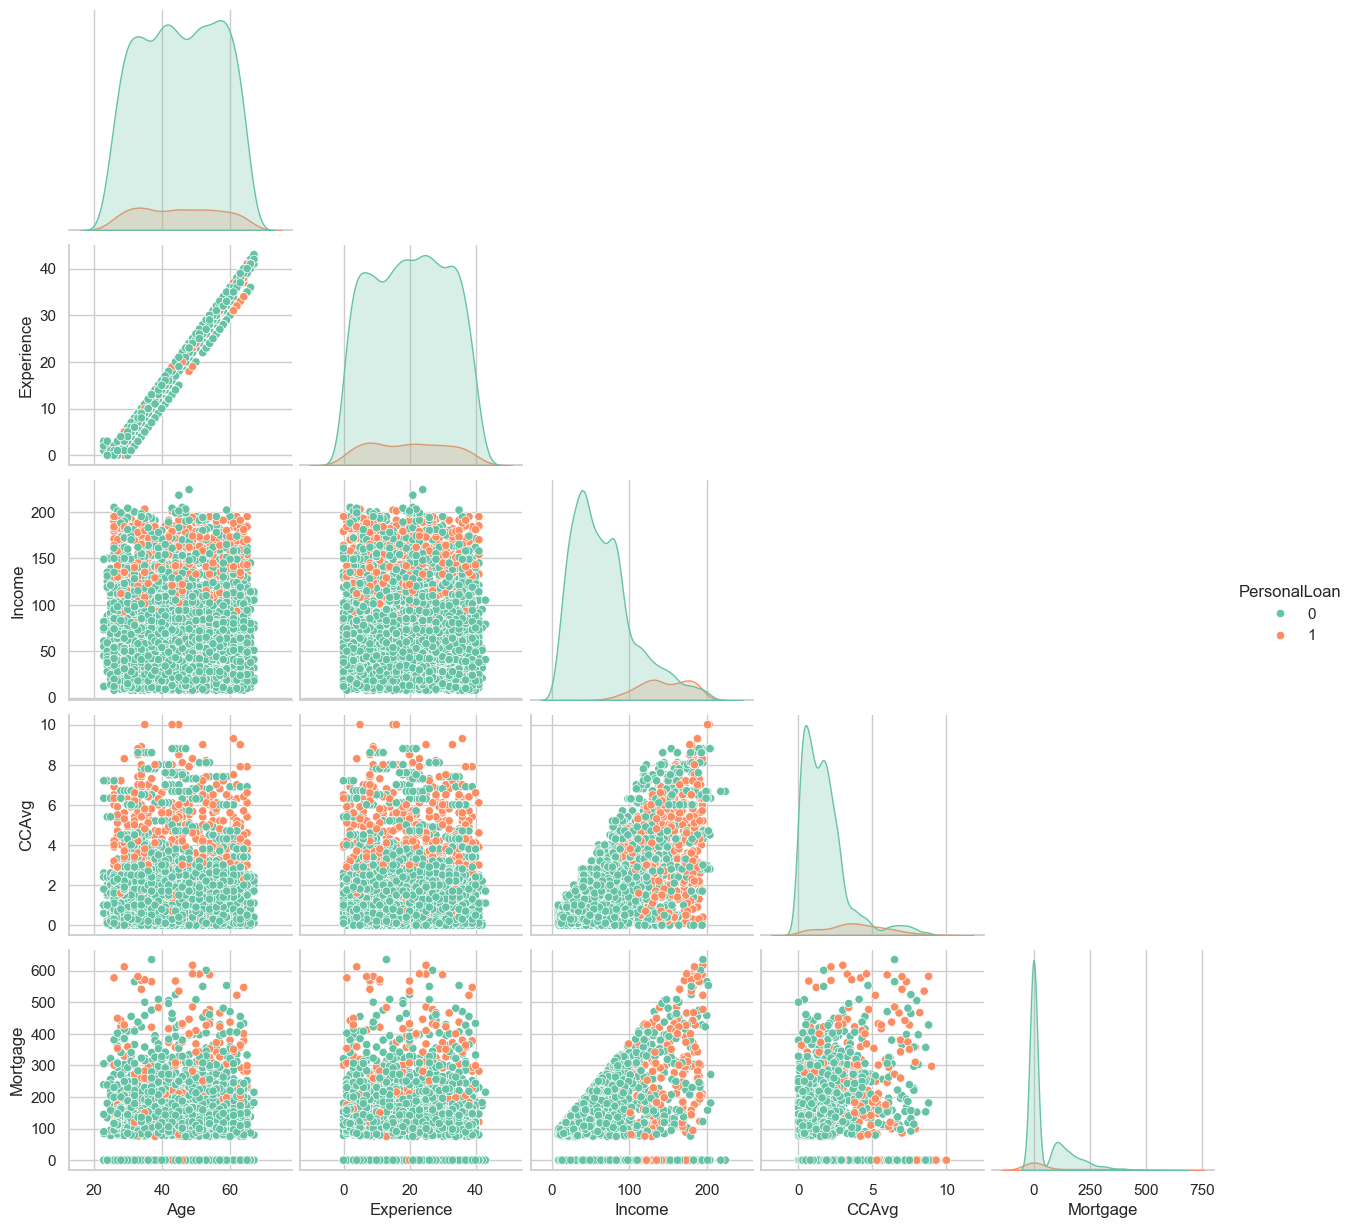

In [245]:
sns.set_palette(sns.color_palette("Set2", 8))
sns.pairplot(df, hue="PersonalLoan", corner=True)
plt.show()

# Bivariate Analysis --- Box Plot of numerical column with Personal Loan

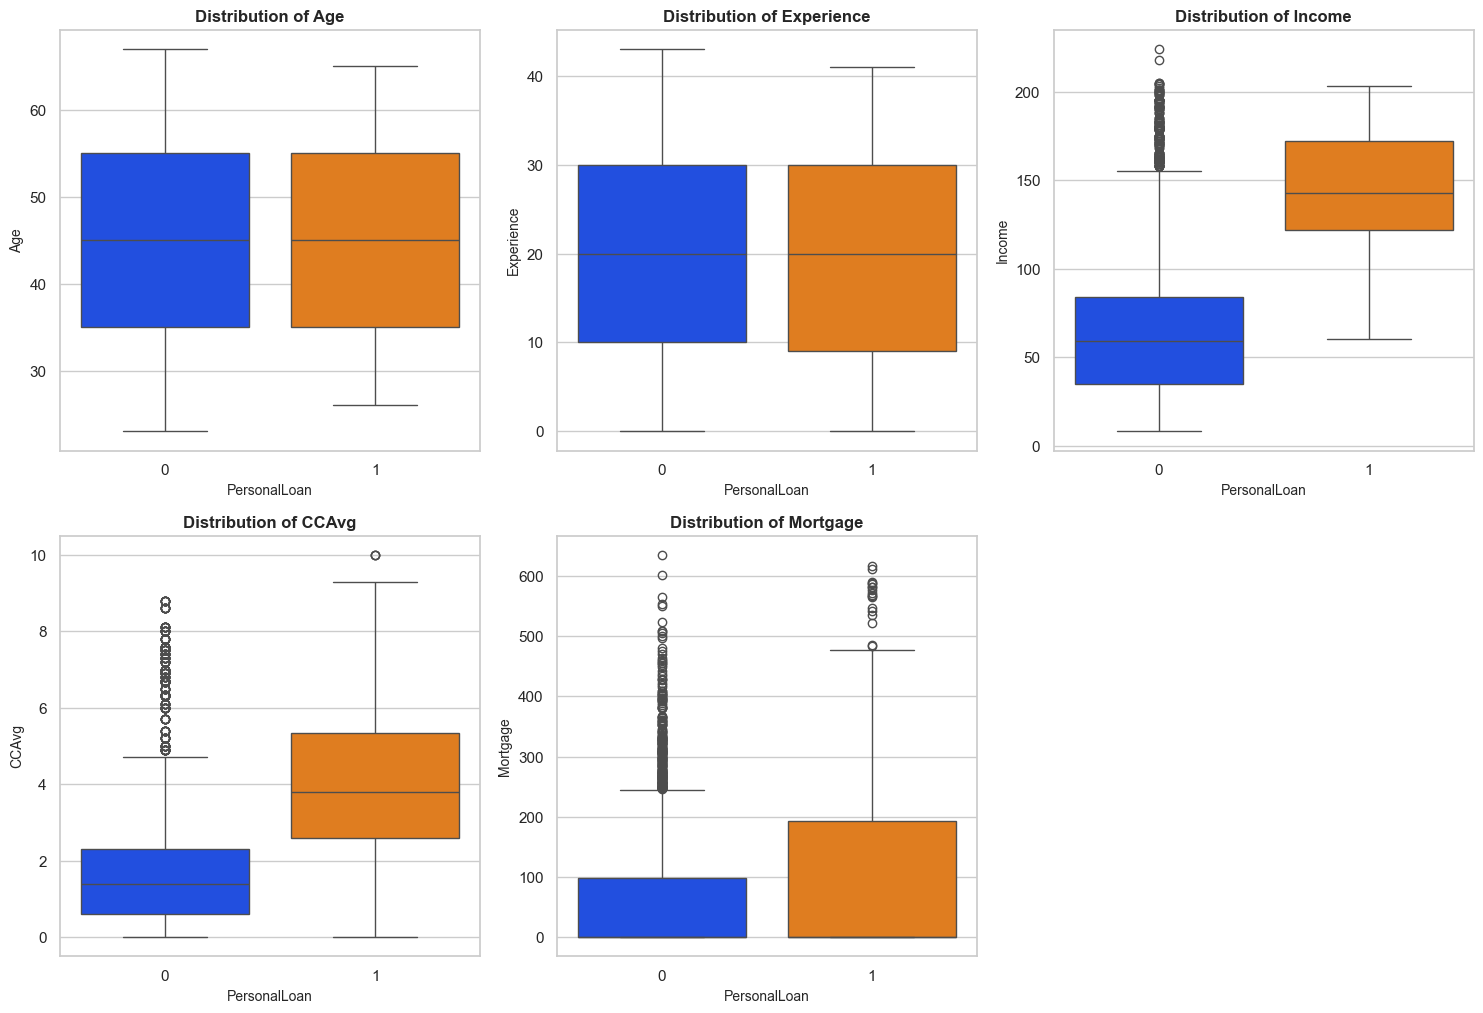

In [246]:
plt.figure(figsize=(15, 25))


numeric_column = ["Age", "Experience", "Income", "CCAvg", "Mortgage"]


for i, variable in enumerate(numeric_column):
    plt.subplot(5, 3, i + 1)

    # Apply a bright and bold palette to each boxplot
    sns.boxplot(
        x="PersonalLoan",
        y=variable,
        data=df,
        palette=sns.color_palette("bright", 2),  # 'bright' palette for bold colors
    )

    # Add a title for clarity
    plt.title(f"Distribution of {variable}", fontsize=12, fontweight="bold")
    plt.xlabel("PersonalLoan", fontsize=10)
    plt.ylabel(variable, fontsize=10)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

### 

In [247]:
num = numeric_column[:1] + numeric_column[2:]
num

['Age', 'Income', 'CCAvg', 'Mortgage']

# Num Distplot with PersonalLoan

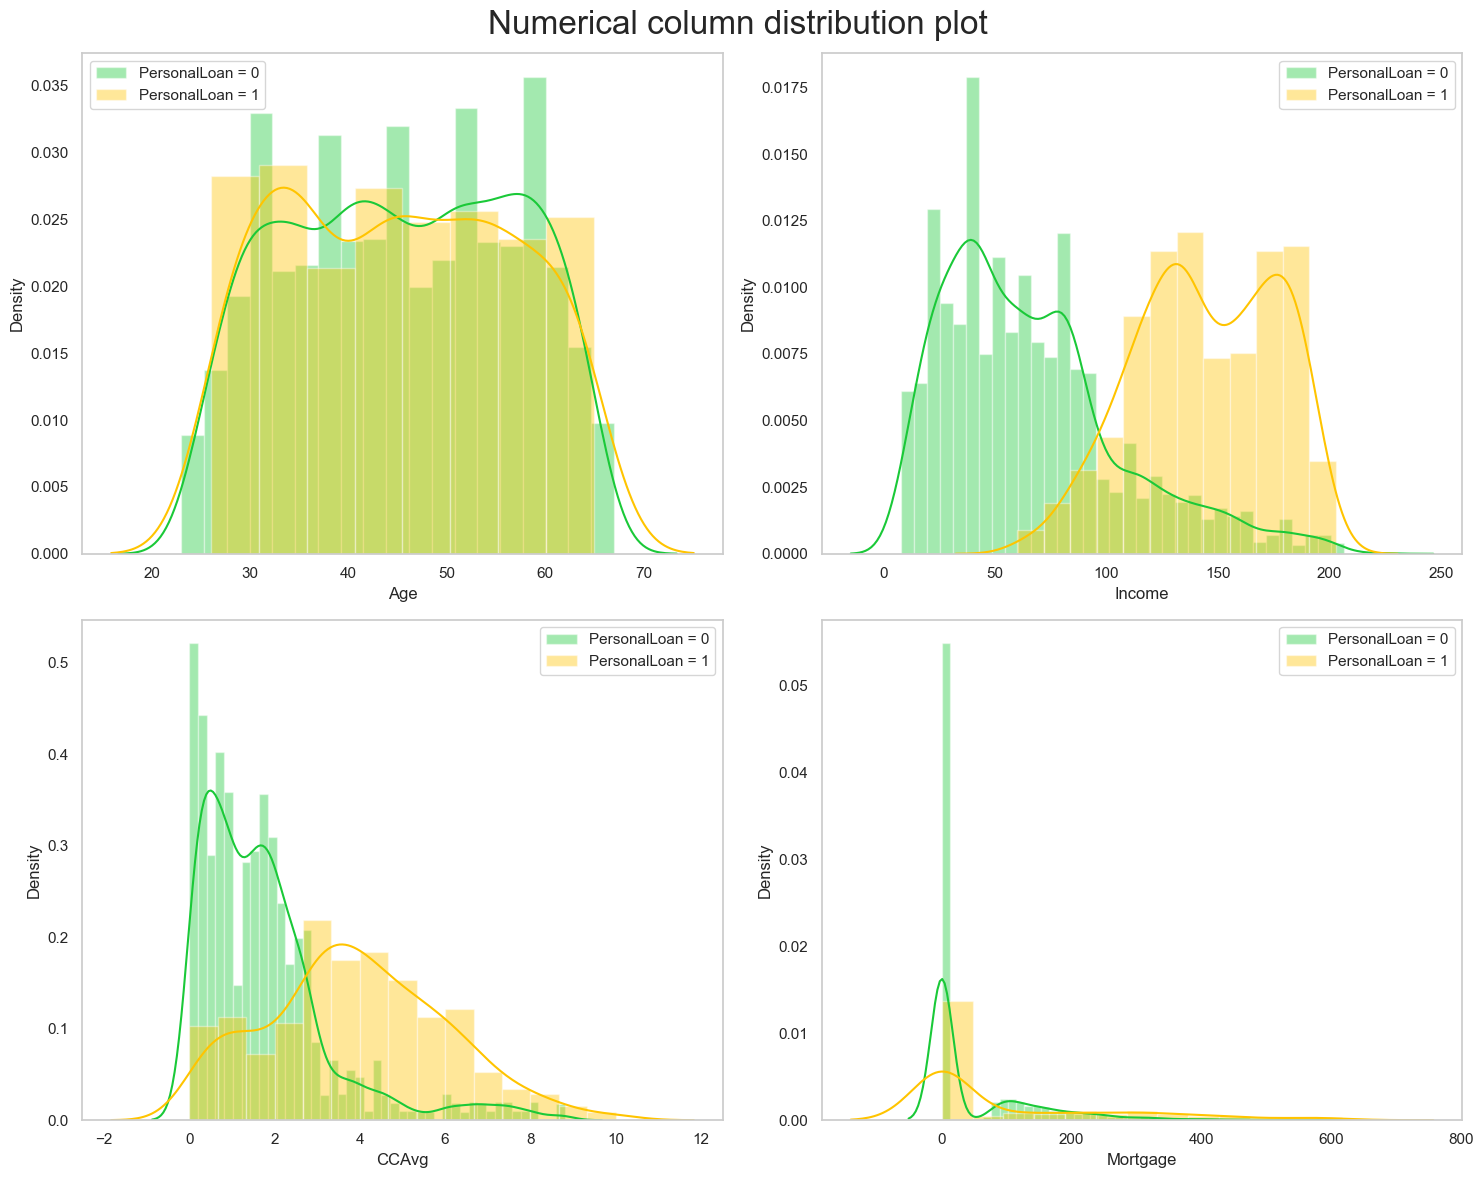

In [248]:
fig, ax = plt.subplots(2, 2, figsize=(15, 12), dpi=100)

numeric_column

for i, col in enumerate(num):
    x = i // 2
    y = i % 2
    sns.distplot(
        df[df["PersonalLoan"] == 0][col],
        color="g",
        ax=ax[x, y],
        label="PersonalLoan = 0",
    )
    sns.distplot(
        df[df["PersonalLoan"] == 1][col],
        color="y",
        ax=ax[x, y],
        label="PersonalLoan = 1",
    )

    ax[x, y].legend()
    ax[x, y].grid(False)


plt.suptitle("Numerical column distribution plot ", fontsize=24)
plt.tight_layout()
plt.show()

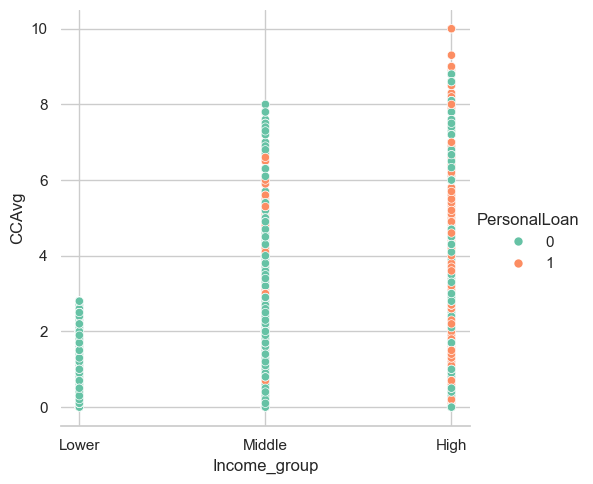

In [249]:
sns.relplot(x="Income_group", y="CCAvg", hue="PersonalLoan", data=df)
sns.despine(top=True, right=True, left=True)  # to remove side line from graph

### bivariate analysis on Income_group & CDAccount with count

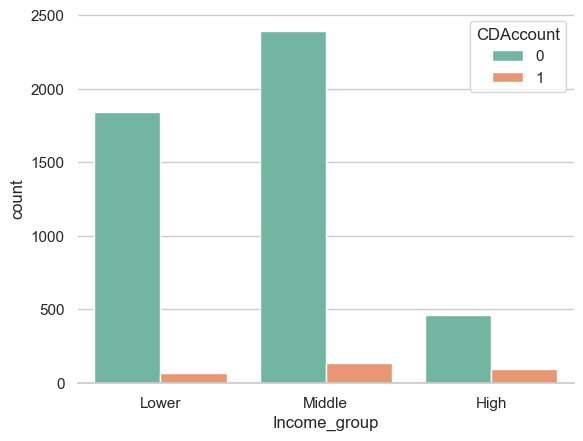

In [250]:
sns.countplot(x="Income_group", hue="CDAccount", data=df)
sns.despine(top=True, right=True, left=True)

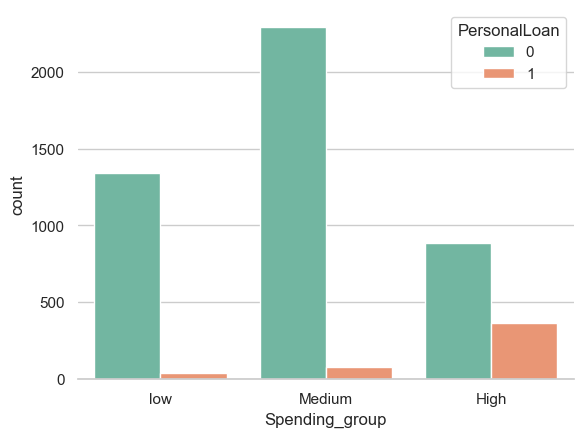

In [251]:
sns.countplot(x="Spending_group", hue="PersonalLoan", data=df)
sns.despine(top=True, right=True, left=True)

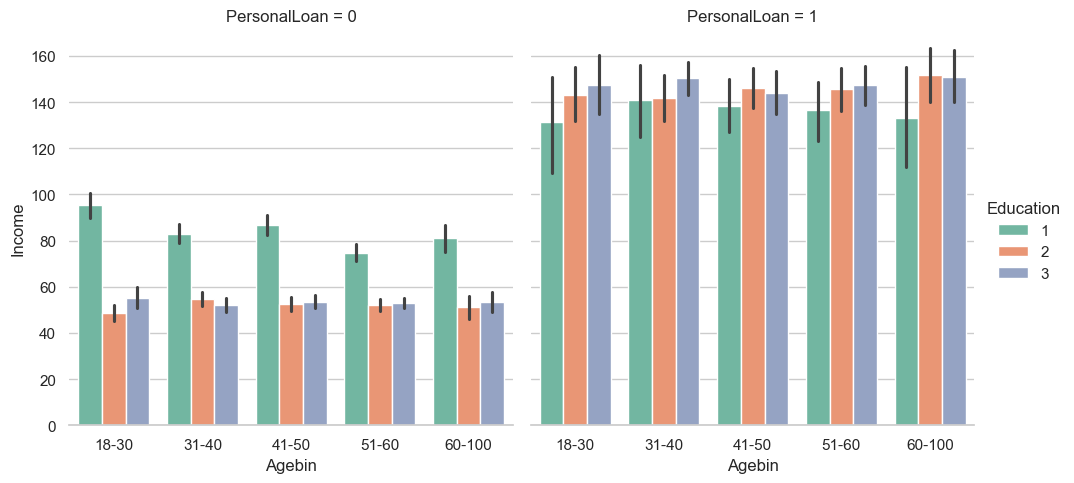

In [252]:
sns.catplot(
    y="Income", x="Agebin", hue="Education", kind="bar", col="PersonalLoan", data=df
)
sns.despine(top=True, right=True, left=True)

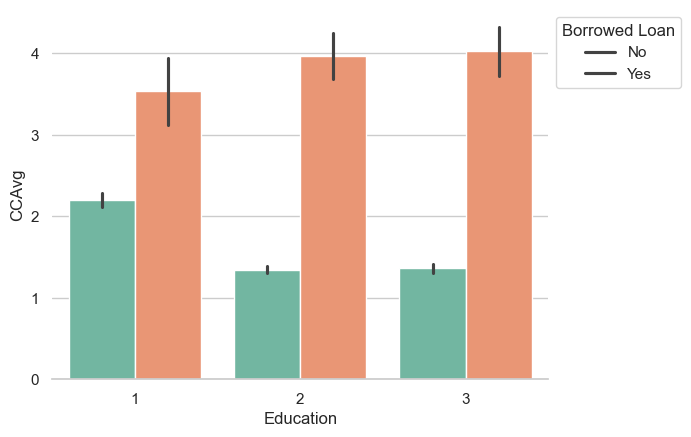

In [253]:
sns.set_palette(sns.color_palette("Set2", 8))

sns.barplot(y="CCAvg", x="Education", hue="PersonalLoan", data=df)

labels = ["No", "Yes"]
plt.legend(
    loc="upper left", labels=labels, title="Borrowed Loan", bbox_to_anchor=(1, 1)
)

sns.despine(top=True, right=True, left=True)  # to remove side line from graph

In [254]:
df.columns

Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'PersonalLoan', 'SecuritiesAccount',
       'CDAccount', 'Online', 'CreditCard', 'County', 'Agebin', 'Income_group',
       'Spending_group', 'Regions'],
      dtype='object')

### Observations

* People with higher income had opted for personal loan before.

* People with high mortgages opted for loan.

* Customers with higher average monthly credit usage have opted for loan.

* Customers with higher income had higher average credit card usage and mortgage.

* Graduate and Advance/professional have higher monthly credit card usage and have borrowed loans with the bank

### Function to plot stacked bar chart

In [255]:
def stacked_plot(x):
    sns.set_palette(sns.color_palette("Set2", 8))
    tab1 = pd.crosstab(x, df["PersonalLoan"], margins=True)
    print(tab1)

    print("-" * 120)

    tab = pd.crosstab(x, df["PersonalLoan"], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(7, 4))
    plt.xticks(rotation=360)

    labels = ["No", "Yes"]
    plt.legend(loc="lower left")
    plt.legend(
        loc="upper left", labels=labels, title="Borrowed Loan", bbox_to_anchor=(1, 1)
    )
    sns.despine(top=True, right=True, left=True)
    plt.show()

In [256]:
cat_columns = df.select_dtypes(include="category").columns.to_list()
cat_columns = [
    col for col in cat_columns if col not in ["ZIPCode", "PersonalLoan", "County"]
]

cat_columns

['Family',
 'Education',
 'SecuritiesAccount',
 'CDAccount',
 'Online',
 'CreditCard',
 'Agebin',
 'Income_group',
 'Spending_group',
 'Regions']

PersonalLoan     0    1   All
Family                       
1             1365  107  1472
2             1190  106  1296
3              877  133  1010
4             1087  134  1221
All           4519  480  4999
------------------------------------------------------------------------------------------------------------------------


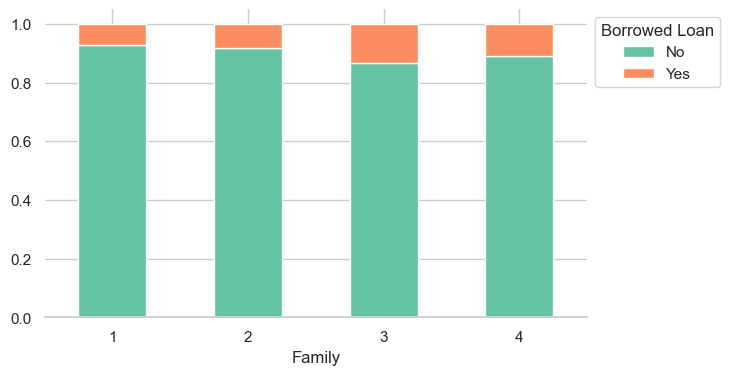

PersonalLoan     0    1   All
Education                    
1             2003   93  2096
2             1221  182  1403
3             1295  205  1500
All           4519  480  4999
------------------------------------------------------------------------------------------------------------------------


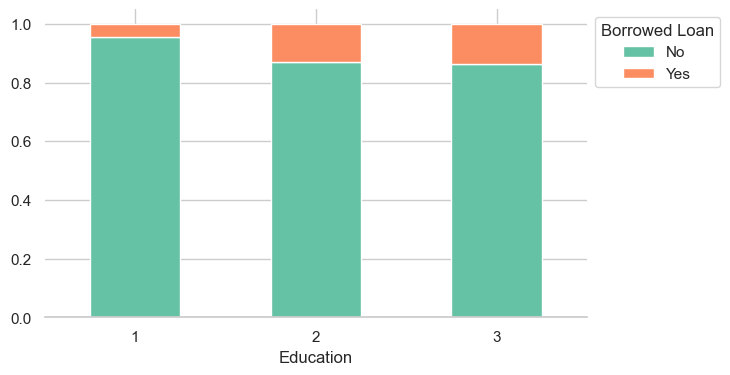

PersonalLoan          0    1   All
SecuritiesAccount                 
0                  4057  420  4477
1                   462   60   522
All                4519  480  4999
------------------------------------------------------------------------------------------------------------------------


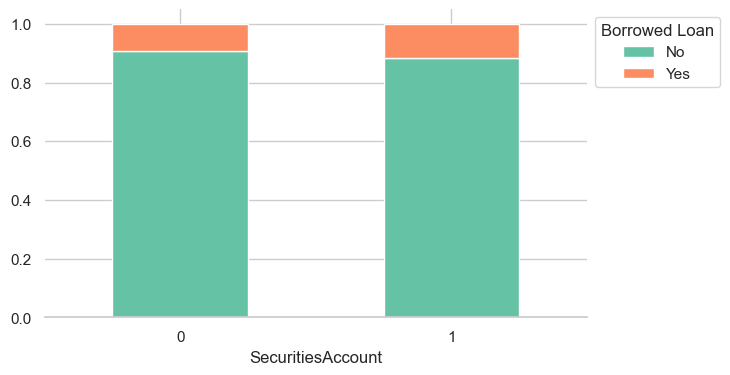

PersonalLoan     0    1   All
CDAccount                    
0             4357  340  4697
1              162  140   302
All           4519  480  4999
------------------------------------------------------------------------------------------------------------------------


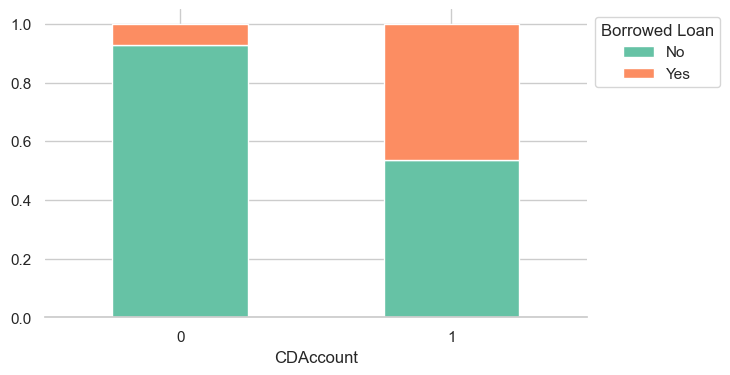

PersonalLoan     0    1   All
Online                       
0             1827  189  2016
1             2692  291  2983
All           4519  480  4999
------------------------------------------------------------------------------------------------------------------------


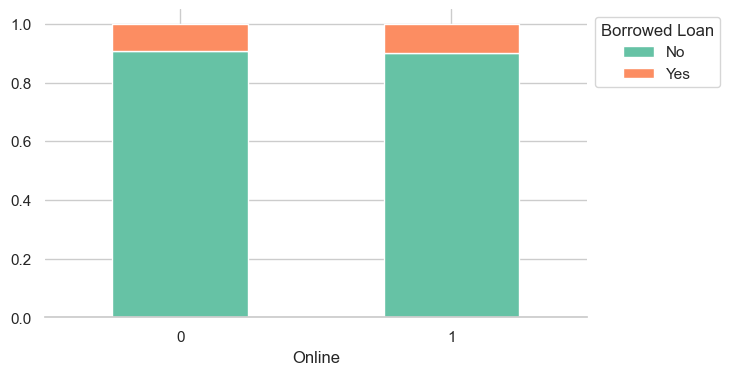

PersonalLoan     0    1   All
CreditCard                   
0             3193  337  3530
1             1326  143  1469
All           4519  480  4999
------------------------------------------------------------------------------------------------------------------------


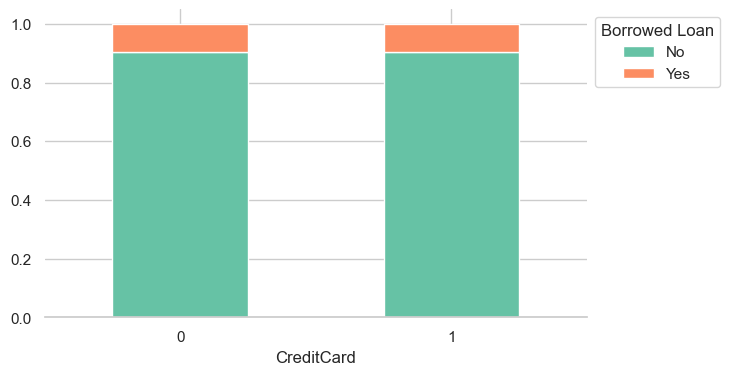

PersonalLoan     0    1   All
Agebin                       
18-30          558   66   624
31-40         1118  118  1236
41-50         1148  122  1270
51-60         1207  115  1322
60-100         488   59   547
All           4519  480  4999
------------------------------------------------------------------------------------------------------------------------


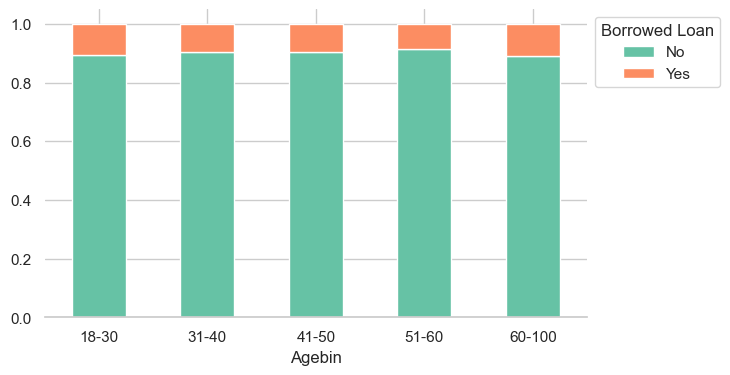

PersonalLoan     0    1   All
Income_group                 
Lower         1913    0  1913
Middle        2301  223  2524
High           305  257   562
All           4519  480  4999
------------------------------------------------------------------------------------------------------------------------


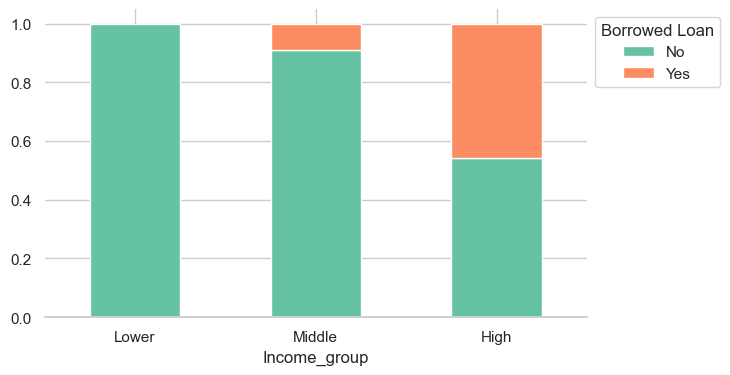

PersonalLoan       0    1   All
Spending_group                 
low             1341   39  1380
Medium          2292   79  2371
High             886  362  1248
All             4519  480  4999
------------------------------------------------------------------------------------------------------------------------


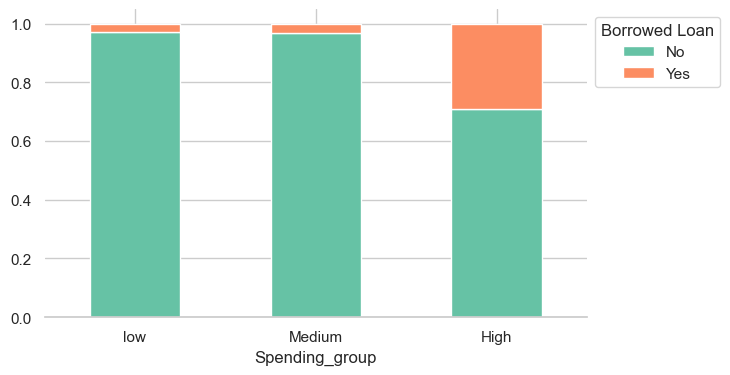

PersonalLoan           0    1   All
Regions                            
Bay Area            1747  196  1943
Central              390   30   420
Los Angeles Region   984  111  1095
Southern            1314  135  1449
Superior              84    8    92
All                 4519  480  4999
------------------------------------------------------------------------------------------------------------------------


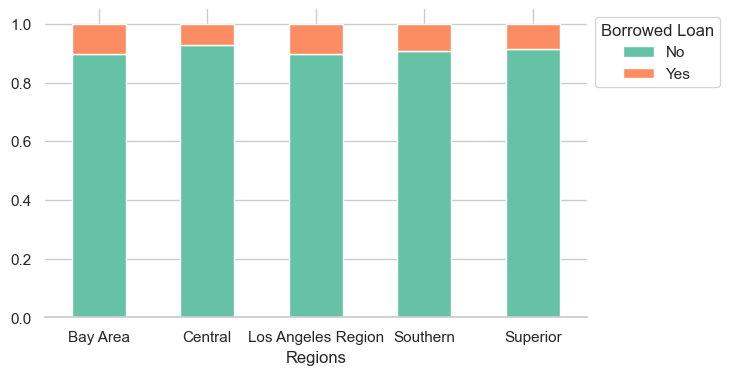

In [257]:
for i, variable in enumerate(cat_columns):
    stacked_plot(df[variable])

### Observations

* Number of Customers with Family size of 3 who had borrowed loans from the bank is greatet than other family size

* 140 of those who had Personal loan with the bank also had Securities_Account

* Must of Customers who had certificate of deposite with the bank had perviously borrowed loan

* Customer using Online facilities has almost no impact on personal loan

* Majority customers who did have Personal loan with the bank did not used CreditCard from other banks.

* Ratio of borrowing loan is high in 30 and below and 60 and above customers.

* Customer with high average Monthly spending have bought personal loan before 

* As expected Age and experience are highly correlated and one of them can be dropped. Since experience had negative values dropping experience would be better option.


Text(0.5, 1.0, 'Correlation Heatmap')

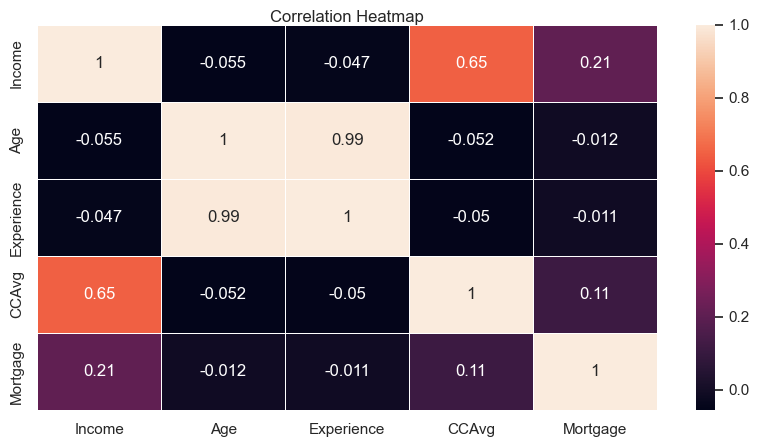

In [258]:
plt.figure(figsize=(10, 5))
numerical = ["Income", "Age", "Experience", "CCAvg", "Mortgage"]

# A better color to see the positive or negative correlation of eash variable
heatmap = sns.heatmap(df[numerical].corr(), annot=True, linewidths=0.5)
heatmap.set_title("Correlation Heatmap", fontdict={"fontsize": 12}, pad=2)


### Check distribution in target column

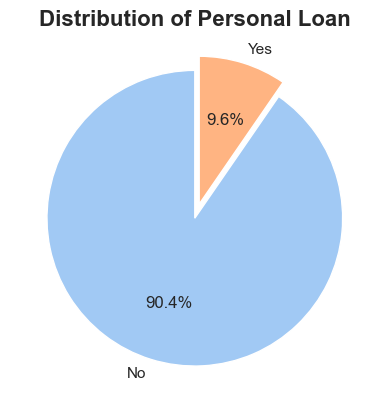

In [259]:
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
colors = sns.color_palette("pastel")


fig, ax = plt.subplots()

ax.pie(
    df["PersonalLoan"].value_counts(),
    explode=explode,
    labels=labels,
    autopct="%1.1f%%",
    colors=colors,
    startangle=90,
)

plt.title("Distribution of Personal Loan", fontsize=16, fontweight="bold")

plt.show()

# Add a title

__The target variable personal_loan is highly imbalanced where only 9.6% of the customers have previously opted
for a personal loan in the dataset. This can be handled using weight or SMOTE. But for now we will carry
n without SMOTE__

In [260]:
df.head()

Age  Experience  Income ZIPCode Family   CCAvg Education  Mortgage  \
0   25           1      49   91107      4 1.60000         1         0   
1   45          19      34   90089      3 1.50000         1         0   
2   39          15      11   94720      1 1.00000         1         0   
3   35           9     100   94112      1 2.70000         2         0   
4   35           8      45   91330      4 1.00000         2         0   

  PersonalLoan SecuritiesAccount CDAccount Online CreditCard  \
0            0                 1         0      0          0   
1            0                 1         0      0          0   
2            0                 0         0      0          0   
3            0                 0         0      0          0   
4            0                 0         0      0          1   

                 County Agebin Income_group Spending_group             Regions  
0    Los Angeles County  18-30        Lower         Medium  Los Angeles Region  
1    Los Angeles County  41-50        Lower         Medium  Los Angeles Region  
2        Alameda County  31-40        Lower         Medium            Bay Area  
3  San Francisco County  31-40       Middle           High            Bay Area  
4    Los Angeles County  31-40        Lower         Medium  Los Angeles Region

In [261]:
# Saving dataset before treating outliers for logistic regression

df_Decision = df.copy()

# Insights based on EDA

### __Summary of EDA__

 __Data Description :__

   * Dependent variable is the Personal_loan which is of categorical data type.

   * Age, Experience, Income,mortage ,CCavg are of integer type while other variables are of categorical type.

   * There were no missing values in the dataset.
 
 __Data Cleaning :__
  
  * We oberved that some obsevation where experience = -ve but since there was a strong correlation with age, we dropped experience.

  * There are 450 unique zipcode, we mapped it to counties. They were further mapped to regions to reduce the dimension of data and we now have only 5 distinct values in the data.

  * We also created Age bin , Spending group and Incomegroup to analyse in there is any pattern in buying loan based on these.

 __Obdervations form EDA:__
  
  - People with higher income had opted for personal loan before.
  - People with high mortgages opted for loan.
  - Customers with higher average monthly credit usage have opted for loan.  
  - Customers with Family of 3 members had borrowed the loans with the bank.
  - Education level 2: Graduate and 3: Advanced/Professional have borrowed loans with the bank.
  - Customers who had certificate of deposit loan with the bank had previously borrowed loan.
  - Majority of customers who did have Personal loan with bank used Online facilities.
  - Majority fo customers who had thake personal loan before are from LosAngeles region.
  - Ratio of borrowing loan is high in 30 and below and 60 and above customers.
  - The more income you get the more you spend and have a "large than life" lifestyle.

 #### Customer segmentation for borrowing loan based on EDA

 - Customer with Higher income have mortages and higher monthly average spending. They also have certificate of deposite with the bank.They are our high profile clients.

 - Few Customer in medium income group don't have higher mortages and have less average montlhy credit card spending. They are average profile clients.

 - Customer in lower income group have less mortages( few ourliers are there) , less monthly spending. They are our low profile clients.

 __Actions for data pre-processing:__

  * Many variables have outliers that need to be treated.
  * We can drop Experience, Country, Zipcode and Agebin , Income_group, Spending_group.


### Outliers detection

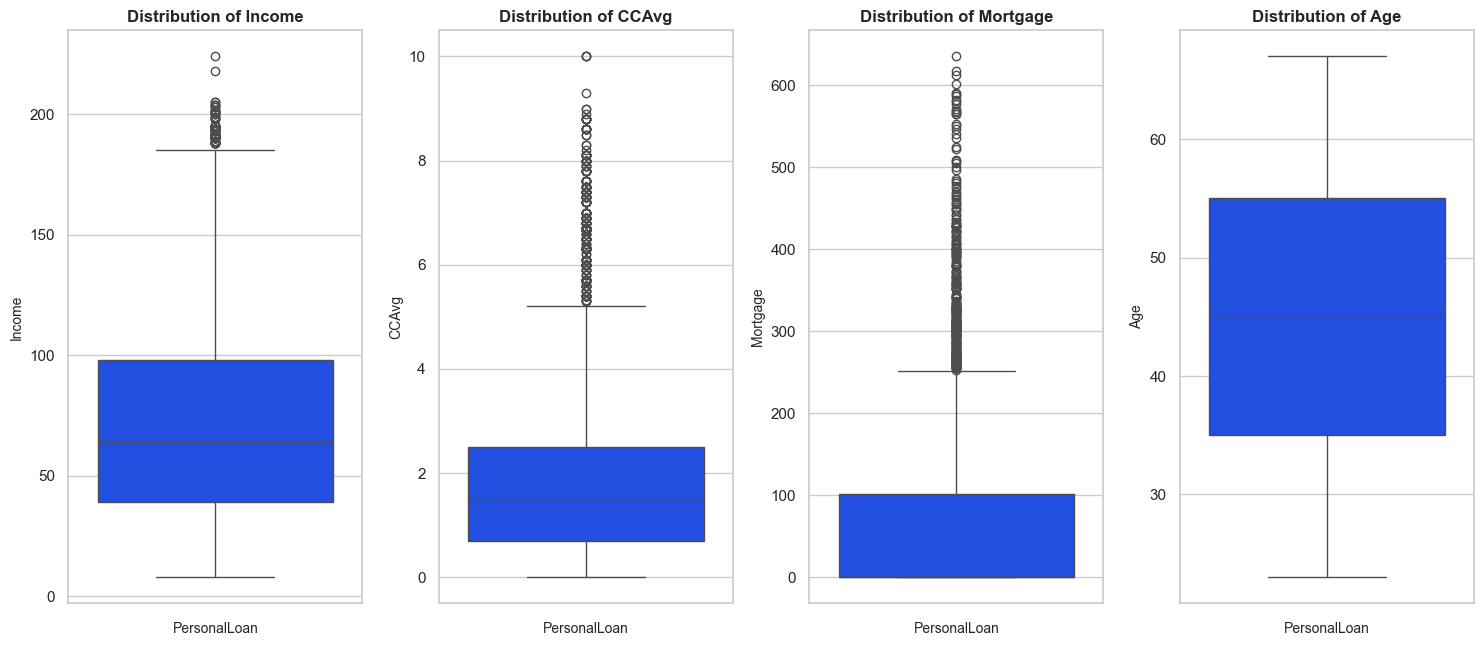

In [262]:
numeric_column = ["Income", "CCAvg", "Mortgage", "Age"]

plt.figure(figsize=(15, 25))


for i, variable in enumerate(numeric_column):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(
        df[variable], palette=sns.color_palette("bright", 2)
    )  # 'bright' palette for bold colors

    plt.title(f"Distribution of {variable}", fontsize=12, fontweight="bold")
    plt.xlabel("PersonalLoan", fontsize=10)
    plt.ylabel(variable, fontsize=10)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [263]:
# Check Income extreme values

df.sort_values(by=["Income"], ascending=False).head(5)

Age  Experience  Income ZIPCode Family   CCAvg Education  Mortgage  \
3896   48          24     224   93940      2 6.67000         1         0   
4993   45          21     218   91801      2 6.67000         1         0   
526    26           2     205   93106      1 6.33000         1       271   
2988   46          21     205   95762      2 8.80000         1       181   
677    46          21     204   92780      2 2.80000         1         0   

     PersonalLoan SecuritiesAccount CDAccount Online CreditCard  \
3896            0                 0         1      1          1   
4993            0                 0         0      1          0   
526             0                 0         0      0          1   
2988            0                 1         0      1          0   
677             0                 0         0      1          0   

                    County Agebin Income_group Spending_group  \
3896       Monterey County  41-50         High           High   
4993    Los Angeles County  41-50         High           High   
526   Santa Barbara County  18-30         High           High   
2988      El Dorado County  41-50         High           High   
677          Orange County  41-50         High           High   

                 Regions  
3896            Bay Area  
4993  Los Angeles Region  
526             Southern  
2988             Central  
677             Southern

In [264]:
df.loc[(df["Age"] == 48) & (df["Experience"] == 24)].sort_values(
    by=["Income"], ascending=False
).head(5)

Age  Experience  Income ZIPCode Family   CCAvg Education  Mortgage  \
3896   48          24     224   93940      2 6.67000         1         0   
196    48          24     165   93407      1 5.00000         1         0   
2217   48          24     162   91355      4 3.30000         2       446   
4629   48          24     148   91311      2 3.30000         1         0   
4167   48          24     144   94025      4 3.50000         2         0   

     PersonalLoan SecuritiesAccount CDAccount Online CreditCard  \
3896            0                 0         1      1          1   
196             0                 0         0      0          1   
2217            1                 0         1      1          0   
4629            0                 0         1      1          1   
4167            1                 0         0      0          0   

                      County Agebin Income_group Spending_group  \
3896         Monterey County  41-50         High           High   
196   San Luis Obispo County  41-50         High           High   
2217      Los Angeles County  41-50         High           High   
4629      Los Angeles County  41-50         High           High   
4167        San Mateo County  41-50         High           High   

                 Regions  
3896            Bay Area  
196             Southern  
2217  Los Angeles Region  
4629  Los Angeles Region  
4167            Bay Area

In [265]:
# Check Mortagage extreme values
df.sort_values(by=["Mortgage"], ascending=False).head(5)

Age  Experience  Income ZIPCode Family   CCAvg Education  Mortgage  \
2934   37          13     195   91763      2 6.50000         1       635   
303    49          25     195   95605      4 3.00000         1       617   
4812   29           4     184   92126      4 2.20000         3       612   
1783   53          27     192   94720      1 1.70000         1       601   
4842   49          23     174   95449      3 4.60000         2       590   

     PersonalLoan SecuritiesAccount CDAccount Online CreditCard  \
2934            0                 0         0      1          0   
303             1                 0         0      0          0   
4812            1                 0         0      1          0   
1783            0                 0         0      1          0   
4842            1                 0         0      0          0   

                     County Agebin Income_group Spending_group   Regions  
2934  San Bernardino County  31-40         High           High  Southern  
303             Yolo County  41-50         High           High   Central  
4812       San Diego County  18-30         High         Medium  Southern  
1783         Alameda County  51-60         High         Medium  Bay Area  
4842       Mendocino County  41-50         High           High  Superior

In [266]:
# check CCAVg extreme values

df.sort_values(by=["CCAvg"], ascending=False).head(5)

Age  Experience  Income ZIPCode Family    CCAvg Education  Mortgage  \
2101   35           5     203   95032      1 10.00000         3         0   
2337   43          16     201   95054      1 10.00000         2         0   
787    45          15     202   91380      3 10.00000         3         0   
3943   61          36     188   91360      1  9.30000         2         0   
1339   52          25     180   94545      2  9.00000         2       297   

     PersonalLoan SecuritiesAccount CDAccount Online CreditCard  \
2101            1                 0         0      0          0   
2337            1                 0         0      0          1   
787             1                 0         0      0          0   
3943            1                 0         0      0          0   
1339            1                 0         0      1          0   

                  County  Agebin Income_group Spending_group  \
2101  Santa Clara County   31-40         High           High   
2337  Santa Clara County   41-50         High           High   
787   Los Angeles County   41-50         High           High   
3943      Ventura County  60-100         High           High   
1339      Alameda County   51-60         High           High   

                 Regions  
2101            Bay Area  
2337            Bay Area  
787   Los Angeles Region  
3943            Southern  
1339            Bay Area

__This is some really extreme values in income 224K USD compared to same age group and experience. Values for Credit card and Mortages looks fine.After identifying outliers, we can decide whether to remove/treat them or not. It depends,here I am not going to treat them as there will be outliers in real case scenario (in Income, Mortgage value, Average spending on the credit card, etc) and we would want our model to learn the underlying pattern for such customers__                                             

In [267]:
df.head()

Age  Experience  Income ZIPCode Family   CCAvg Education  Mortgage  \
0   25           1      49   91107      4 1.60000         1         0   
1   45          19      34   90089      3 1.50000         1         0   
2   39          15      11   94720      1 1.00000         1         0   
3   35           9     100   94112      1 2.70000         2         0   
4   35           8      45   91330      4 1.00000         2         0   

  PersonalLoan SecuritiesAccount CDAccount Online CreditCard  \
0            0                 1         0      0          0   
1            0                 1         0      0          0   
2            0                 0         0      0          0   
3            0                 0         0      0          0   
4            0                 0         0      0          1   

                 County Agebin Income_group Spending_group             Regions  
0    Los Angeles County  18-30        Lower         Medium  Los Angeles Region  
1    Los Angeles County  41-50        Lower         Medium  Los Angeles Region  
2        Alameda County  31-40        Lower         Medium            Bay Area  
3  San Francisco County  31-40       Middle           High            Bay Area  
4    Los Angeles County  31-40        Lower         Medium  Los Angeles Region

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4999 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                4999 non-null   int64   
 1   Experience         4999 non-null   int64   
 2   Income             4999 non-null   int64   
 3   ZIPCode            4999 non-null   category
 4   Family             4999 non-null   category
 5   CCAvg              4999 non-null   float64 
 6   Education          4999 non-null   category
 7   Mortgage           4999 non-null   int64   
 8   PersonalLoan       4999 non-null   category
 9   SecuritiesAccount  4999 non-null   category
 10  CDAccount          4999 non-null   category
 11  Online             4999 non-null   category
 12  CreditCard         4999 non-null   category
 13  County             4999 non-null   category
 14  Agebin             4999 non-null   category
 15  Income_group       4999 non-null   category
 16  Spending_gr

In [269]:
# drop column which we don't need for modelling

df.drop(
    columns=[
        "Agebin",
        "ZIPCode",
        "County",
        "Experience",
        "Income_group",
        "Spending_group",
    ],
    inplace=True,
)

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4999 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                4999 non-null   int64   
 1   Income             4999 non-null   int64   
 2   Family             4999 non-null   category
 3   CCAvg              4999 non-null   float64 
 4   Education          4999 non-null   category
 5   Mortgage           4999 non-null   int64   
 6   PersonalLoan       4999 non-null   category
 7   SecuritiesAccount  4999 non-null   category
 8   CDAccount          4999 non-null   category
 9   Online             4999 non-null   category
 10  CreditCard         4999 non-null   category
 11  Regions            4999 non-null   category
dtypes: category(8), float64(1), int64(3)
memory usage: 235.5 KB


__we have 6 categorical independent variable but 4 of them of binary, so we'll have the same result
with them even after creating dummies So we will only make dummies for Regions and Education.__

In [271]:
df.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'PersonalLoan', 'SecuritiesAccount', 'CDAccount', 'Online',
       'CreditCard', 'Regions'],
      dtype='object')

In [272]:
X = df.drop(["PersonalLoan"], axis=1)
y = df["PersonalLoan"]


oneHotCols = ["Regions", "Education"]
X = pd.get_dummies(X, columns=oneHotCols, drop_first=True)

__We droped first column from this dummies because it may cause  problem of multicollinearity and lead 
our model to Overfitting and Instability.__

In [273]:
# Splitting data in train and test sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1, stratify=y
)

### stratgy = Y ::
__It ensures the class distribution in train and test sets matches the original data.__

__Always use it for classification tasks, especially with imbalanced datasets.__

In [274]:
from sklearn.preprocessing import StandardScaler

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)


X_train_scaled_df.index = np.arange(len(X_train_scaled_df))
X_test_scaled_df.index = np.arange(len(X_test_scaled_df))

y_train.index = np.arange(len(y_train))
y_test.index = np.arange(len(y_test))

### Model building Logistic Regression

__Model evaluation criterion__


### Model can make wrong prediction as:

1. Predicting a person will buy a loan but he actually doesn't.(Loss of Resource)   [Type-1 Error] ----> False Positive 
2. Predicting a person will not buy a loan but he actually does.(Loss of Opportunity)   [Type-2 Error] ----> False negative

Which case is more important?

* The whole purpose of the campagin is to bring in more customers. 2nd case is more important to us A 
potential customer potential customer is missed by the saled/marketing team.it's lost of opportunity. So we want to minimize the loss

How to reduce losses? i.e need to reduce False Negatives?

* In this case, not being able to identify a potential customer is the biggest loss we can face. Hence,
recall is the right metric to check the performance of the model. Banks wants Recall to be maximized, greater the recall lesser the chances of false negatives.

* We can use accuracy but since the data is imbalanced it would not be the right metric to check the model performance.

* Therefore, Recall should be maximized, the greater the Recall higher the chances of identifying both the class correctly.

In [275]:
def make_confusion_matrix(y_actual, y_predict, title):
    fig, ax = plt.subplots(figsize=(3, 3))  # Reduced figure size for a smaller plot
    
    # Generate confusion matrix and display
    cm = confusion_matrix(y_actual, y_predict, labels=[0, 1])
    display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])
    display.plot(cmap="Greens", colorbar=True, ax=ax)
    
    # Customize plot appearance
    ax.set_title(title)
    ax.tick_params(axis='both', which='both', length=0)  # Remove ticks
    ax.grid(False)  # Disable grid
    
    plt.show()


In [276]:
def get_metrics_score(model,X_train_df,X_test_df,y_train_pass,y_test_pass,statsklearn,threshold=0.5,flag=True,roc=False):
    '''
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    X_train_df, X_test_df: Independent features
    y_train_pass,y_test_pass: Dependent variable
    statsklearn : 0 if calling for Sklearn model else 1
    threshold: thresold for classifiying the observation as 1
    flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    '''
    # defining an empty list to store train and test results
    
    score_list=[] 
    if statsklearn==0:
        pred_train = model.predict(X_train_df)
        pred_test = model.predict(X_test_df)
    else:
        pred_train = (model.predict(X_train_df)>threshold)
        pred_test = (model.predict(X_test_df)>threshold)
    
    
    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
    
    train_acc = accuracy_score(y_train_pass,pred_train)
    test_acc = accuracy_score(y_test_pass,pred_test)
    
    train_recall = recall_score(y_train_pass,pred_train)
    test_recall = recall_score(y_test_pass,pred_test)
    
    train_precision = precision_score(y_train_pass,pred_train)
    test_precision = precision_score(y_test_pass,pred_test)
    
    train_f1 = f1_score(y_train_pass,pred_train)
    test_f1 = f1_score(y_test_pass,pred_test)
    
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
      
    if flag == True: 
        print("\x1b[0;30;47m \033[1mMODEL PERFORMANCE\x1b[0m")
        print("\x1b[0;30;47m \033[1mAccuracy   : Train:\x1b[0m",
              round(accuracy_score(y_train_pass,pred_train),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m ",
              round(accuracy_score(y_test_pass,pred_test),3))
        print("\x1b[0;30;47m \033[1mRecall     : Train:\x1b[0m"
              ,round(recall_score(y_train_pass,pred_train),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m" ,
              round(recall_score(y_test_pass,pred_test),3))
        
        print("\x1b[0;30;47m \033[1mPrecision  : Train:\x1b[0m",
              round(precision_score(y_train_pass,pred_train),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m ",
              round(precision_score(y_test_pass,pred_test),3))
        print("\x1b[0;30;47m \033[1mF1         : Train:\x1b[0m",
              round(f1_score(y_train_pass,pred_train),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m",
              round(f1_score(y_test_pass,pred_test),3))
        make_confusion_matrix(y_train_pass,pred_train,"Confusion Matrix for Train")     
        make_confusion_matrix(y_test_pass,pred_test,"Confusion Matrix for Test") 
   
    if roc == True:
        
        print("\x1b[0;30;47m \033[1mROC-AUC Score  :Train:\x1b[0m: ",
              round(roc_auc_score(y_train_pass,pred_train),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m: ",
              round(roc_auc_score(y_test_pass,pred_test),3))
    
    return score_list # returning the list with train and test scores

In [277]:
## defining empty lists to add train and test results

acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []


def add_score_model(score):
     '''Add scores to list so that we can compare all models score together'''   
     acc_train.append(score[0])
     acc_test.append(score[1])
     recall_train.append(score[2])
     recall_test.append(score[3])
     precision_train.append(score[4])
     precision_test.append(score[5])
     f1_train.append(score[6])
     f1_test.append(score[7])


# Logistic Regression (with Sklearn  library)   -----> 1st Model

 MODEL PERFORMANCE
 Accuracy   : Train: 0.658  Test:  0.65
 Recall     : Train: 0.979  Test: 0.986
 Precision  : Train: 0.217  Test:  0.214
 F1         : Train: 0.355  Test: 0.351


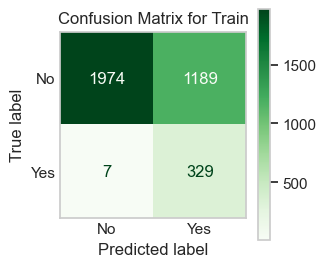

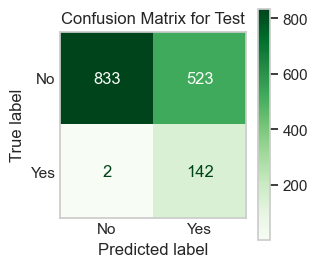

In [278]:
lr = LogisticRegression(solver='newton-cg' , random_state = 1 , fit_intercept = False , class_weight = {0:0.15 ,1:0.85})
model = lr.fit(X_train_scaled_df , y_train)

statmodel = 0 

# Let's check model performances for this model 
scores_Sklearn  = get_metrics_score(model ,X_train_scaled_df , X_test_scaled_df, y_train, y_test , statmodel)


In [279]:
add_score_model(scores_Sklearn)

 # Logistic Regression (with StatModel) -----> 2nd Model

Optimization terminated successfully.
         Current function value: 0.113898
         Iterations 9
 MODEL PERFORMANCE
 Accuracy   : Train: 0.962  Test:  0.953
 Recall     : Train: 0.688  Test: 0.653
 Precision  : Train: 0.888  Test:  0.817
 F1         : Train: 0.775  Test: 0.726


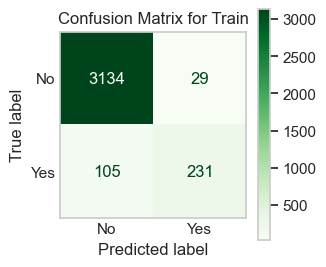

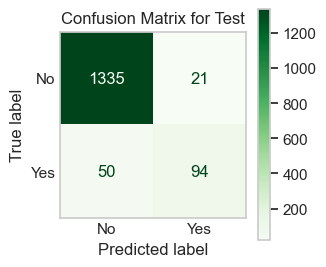

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           PersonalLoan   No. Observations:                 3499
Model:                          Logit   Df Residuals:                     3483
Method:                           MLE   Df Model:                           15
Date:                Wed, 18 Dec 2024   Pseudo R-squ.:                  0.6399
Time:                        15:03:11   Log-Likelihood:                -398.53
converged:                       True   LL-Null:                       -1106.6
Covariance Type:            nonrobust   LLR p-value:                5.492e-293
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -5.2604      0.236    -22.276      0.000      -5.723      -4.798
Age                            0.1547      0.096      1.618      0.106      -0.033       0.342
Income                         3.0106      0.177     17.055      0.000       2.665       3.357
Family                         0.7829      0.108      7.278      0.000       0.572       0.994
CCAvg                          0.2176      0.094      2.310      0.021       0.033       0.402
Mortgage                       0.0874      0.073      1.206      0.228      -0.055       0.230
SecuritiesAccount             -0.2303      0.112     -2.056      0.040      -0.450      -0.011
CDAccount                      0.8431      0.100      8.459      0.000       0.648       1.038
Online                        -0.3423      0.099     -3.457      0.001      -0.536      -0.148
CreditCard                    -0.3662      0.116     -3.153      0.002      -0.594      -0.139
Regions_Central               -0.1968      0.111     -1.781      0.075      -0.413       0.020
Regions_Los Angeles Region    -0.0451      0.102     -0.444      0.657      -0.244       0.154
Regions_Southern              -0.0149      0.104     -0.143      0.886      -0.219       0.189
Regions_Superior              -0.3143      0.216     -1.456      0.145      -0.737       0.109
Education_2                    1.8569      0.150     12.375      0.000       1.563       2.151
Education_3                    1.9912      0.152     13.101      0.000       1.693       2.289
==============================================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [280]:
# adding constant to training and test set

X_train_stat = sm.add_constant(X_train_scaled_df)
X_test_stat = sm.add_constant(X_test_scaled_df)

statmodel = 1 #0 for sklearn and 1 for statmodel
logit = sm.Logit(y_train , X_train_stat.astype(float))
lg = logit.fit(warn_convergence = False)

# Let's check model performances for this model
scores_statsmodel = get_metrics_score(lg, X_train_stat , X_test_stat , y_train , y_test , statmodel)
lg.summary()

# Test Assumption

### MultiCollinearity

__we will have to check and remove multicollinearity from the data to get reliable coefficients and p-values. There are different ways of detecting (or testing) multi-collinearity, one such way is the Variation Inflation Factor.* General Rule of thumb: If VIF is 1 then there is no correlation among the predictor and the remaining predictor variables. Whereas if VIF exceeds 5, we say it shows signs of high multi-collinearity. But the purpose of the analysis should dictate which threshold to use.__

In [281]:
def multicollinearity_assumption(X):
    ''''
    This assumes that predictors are not correlated with each other and calculates VIF values of predictors
    '''
    vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    possible_multicollinearity = sum([1 for v in vif if v > 10])
    definite_multicollinearity = sum([1 for v in vif if v > 100])
    
    print('{} cases of possible multicollinearity.'.format(possible_multicollinearity))
    print('{} cases of definite multicollinearity.'.format(definite_multicollinearity))
    
    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied.')
        else:
            print('Assumption possibly satisfied.')
    else:
        print('Assumption not satisfied.')
    
    return pd.DataFrame({'vif': vif}, index=X.columns).round(2)

In [282]:
X_train_num = X_train_stat.astype(float).copy()


In [283]:
multicollinearity_assumption(X_train_num)

0 cases of possible multicollinearity.
0 cases of definite multicollinearity.
Assumption satisfied.


vif
const                      1.00000
Age                        1.01000
Income                     1.91000
Family                     1.05000
CCAvg                      1.74000
Mortgage                   1.06000
SecuritiesAccount          1.16000
CDAccount                  1.36000
Online                     1.05000
CreditCard                 1.11000
Regions_Central            1.12000
Regions_Los Angeles Region 1.22000
Regions_Southern           1.24000
Regions_Superior           1.03000
Education_2                1.29000
Education_3                1.26000

__Observation:__  There is no correlation between predictor variables

In [284]:
lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           PersonalLoan   No. Observations:                 3499
Model:                          Logit   Df Residuals:                     3483
Method:                           MLE   Df Model:                           15
Date:                Wed, 18 Dec 2024   Pseudo R-squ.:                  0.6399
Time:                        15:03:12   Log-Likelihood:                -398.53
converged:                       True   LL-Null:                       -1106.6
Covariance Type:            nonrobust   LLR p-value:                5.492e-293
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -5.2604      0.236    -22.276      0.000      -5.723      -4.798
Age                            0.1547      0.096      1.618      0.106      -0.033       0.342
Income                         3.0106      0.177     17.055      0.000       2.665       3.357
Family                         0.7829      0.108      7.278      0.000       0.572       0.994
CCAvg                          0.2176      0.094      2.310      0.021       0.033       0.402
Mortgage                       0.0874      0.073      1.206      0.228      -0.055       0.230
SecuritiesAccount             -0.2303      0.112     -2.056      0.040      -0.450      -0.011
CDAccount                      0.8431      0.100      8.459      0.000       0.648       1.038
Online                        -0.3423      0.099     -3.457      0.001      -0.536      -0.148
CreditCard                    -0.3662      0.116     -3.153      0.002      -0.594      -0.139
Regions_Central               -0.1968      0.111     -1.781      0.075      -0.413       0.020
Regions_Los Angeles Region    -0.0451      0.102     -0.444      0.657      -0.244       0.154
Regions_Southern              -0.0149      0.104     -0.143      0.886      -0.219       0.189
Regions_Superior              -0.3143      0.216     -1.456      0.145      -0.737       0.109
Education_2                    1.8569      0.150     12.375      0.000       1.563       2.151
Education_3                    1.9912      0.152     13.101      0.000       1.693       2.289
==============================================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

**P < 0.005**: Strong evidence against the null hypothesis; significant effect.  
**P > 0.005** : Weak evidence against the null hypothesis; no significant effect.


In this case 'Regions' all the attributes have a high p-value which means it is not significant therefore we can drop the complete variable.

In [285]:
X_train1 = X_train_stat.drop(['Regions_Central', 'Regions_Los Angeles Region', 'Regions_Southern', 'Regions_Superior'], axis = 1)


X_test1= X_test_stat.drop(['Regions_Central', 'Regions_Los Angeles Region', 'Regions_Southern', 'Regions_Superior'], axis = 1)


logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(warn_convergence =False)

lg1.summary()

Optimization terminated successfully.
         Current function value: 0.114762
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           PersonalLoan   No. Observations:                 3499
Model:                          Logit   Df Residuals:                     3487
Method:                           MLE   Df Model:                           11
Date:                Wed, 18 Dec 2024   Pseudo R-squ.:                  0.6371
Time:                        15:03:12   Log-Likelihood:                -401.55
converged:                       True   LL-Null:                       -1106.6
Covariance Type:            nonrobust   LLR p-value:                7.885e-296
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.1980      0.230    -22.607      0.000      -5.649      -4.747
Age                   0.1507      0.095      1.585      0.113      -0.036       0.337
Income                2.9923      0.174     17.158      0.000       2.650       3.334
Family                0.7735      0.107      7.240      0.000       0.564       0.983
CCAvg                 0.2112      0.093      2.266      0.023       0.028       0.394
Mortgage              0.0806      0.072      1.116      0.264      -0.061       0.222
SecuritiesAccount    -0.2293      0.113     -2.036      0.042      -0.450      -0.009
CDAccount             0.8396      0.099      8.469      0.000       0.645       1.034
Online               -0.3457      0.099     -3.505      0.000      -0.539      -0.152
CreditCard           -0.3831      0.116     -3.298      0.001      -0.611      -0.155
Education_2           1.8450      0.149     12.388      0.000       1.553       2.137
Education_3           1.9776      0.151     13.123      0.000       1.682       2.273
=====================================================================================

Possibly complete quasi-separation: A fraction 0.12 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [307]:
# The Pvalue for Mortgage is 0.26 So droping Mortage

X_train2 = X_train1.drop(['Mortgage'] , axis = 1)
X_test2 = X_test1.drop(['Mortgage'] , axis = 1)

logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit()
lg2.summary()

Optimization terminated successfully.
         Current function value: 0.114939
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           PersonalLoan   No. Observations:                 3499
Model:                          Logit   Df Residuals:                     3488
Method:                           MLE   Df Model:                           10
Date:                Wed, 18 Dec 2024   Pseudo R-squ.:                  0.6366
Time:                        15:04:24   Log-Likelihood:                -402.17
converged:                       True   LL-Null:                       -1106.6
Covariance Type:            nonrobust   LLR p-value:                1.199e-296
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.1941      0.230    -22.613      0.000      -5.644      -4.744
Age                   0.1492      0.095      1.572      0.116      -0.037       0.335
Income                3.0134      0.174     17.341      0.000       2.673       3.354
Family                0.7769      0.107      7.266      0.000       0.567       0.987
CCAvg                 0.1986      0.092      2.148      0.032       0.017       0.380
SecuritiesAccount    -0.2317      0.113     -2.059      0.040      -0.452      -0.011
CDAccount             0.8427      0.099      8.495      0.000       0.648       1.037
Online               -0.3437      0.098     -3.491      0.000      -0.537      -0.151
CreditCard           -0.3882      0.116     -3.348      0.001      -0.616      -0.161
Education_2           1.8369      0.148     12.371      0.000       1.546       2.128
Education_3           1.9659      0.150     13.110      0.000       1.672       2.260
=====================================================================================

Possibly complete quasi-separation: A fraction 0.12 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### Dropping Age as pvalue is greater than 0.05

In [308]:
X_train3 = X_train2.drop(['Age'] , axis = 1)
X_test3 = X_test2.drop(['Age'], axis = 1)

logit3 = sm.Logit(y_train , X_train3.astype(float))
lg3 = logit3.fit()
lg3.summary()

Optimization terminated successfully.
         Current function value: 0.115294
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           PersonalLoan   No. Observations:                 3499
Model:                          Logit   Df Residuals:                     3489
Method:                           MLE   Df Model:                            9
Date:                Wed, 18 Dec 2024   Pseudo R-squ.:                  0.6355
Time:                        15:04:24   Log-Likelihood:                -403.41
converged:                       True   LL-Null:                       -1106.6
Covariance Type:            nonrobust   LLR p-value:                3.200e-297
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.1735      0.228    -22.704      0.000      -5.620      -4.727
Income                3.0026      0.173     17.369      0.000       2.664       3.341
Family                0.7691      0.107      7.196      0.000       0.560       0.979
CCAvg                 0.1792      0.092      1.948      0.051      -0.001       0.360
SecuritiesAccount    -0.2338      0.112     -2.080      0.037      -0.454      -0.014
CDAccount             0.8444      0.099      8.522      0.000       0.650       1.039
Online               -0.3354      0.098     -3.417      0.001      -0.528      -0.143
CreditCard           -0.3854      0.116     -3.322      0.001      -0.613      -0.158
Education_2           1.8329      0.148     12.361      0.000       1.542       2.123
Education_3           1.9513      0.149     13.106      0.000       1.659       2.243
=====================================================================================

Possibly complete quasi-separation: A fraction 0.11 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

# 3rd  final Model After droping ---> features which were not significant 

### CCAvg is important parameter as per EDA so not dropping it

 MODEL PERFORMANCE
 Accuracy   : Train: 0.959  Test:  0.956
 Recall     : Train: 0.682  Test: 0.674
 Precision  : Train: 0.864  Test:  0.836
 F1         : Train: 0.762  Test: 0.746


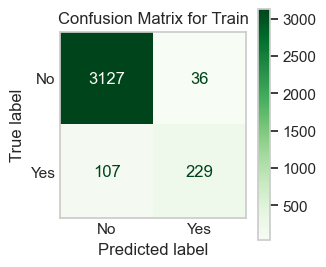

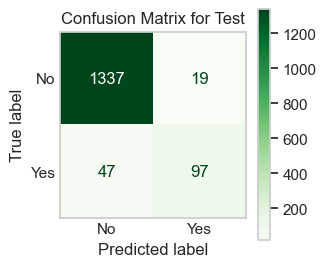

In [309]:
# Let's check model performances for this model

scores_statmodel = get_metrics_score(lg3 , X_train3 , X_test3 , y_train , y_test , statmodel)
add_score_model(scores_statmodel)




# ROC - AUC curve

### Roc - Auc curve on Train data

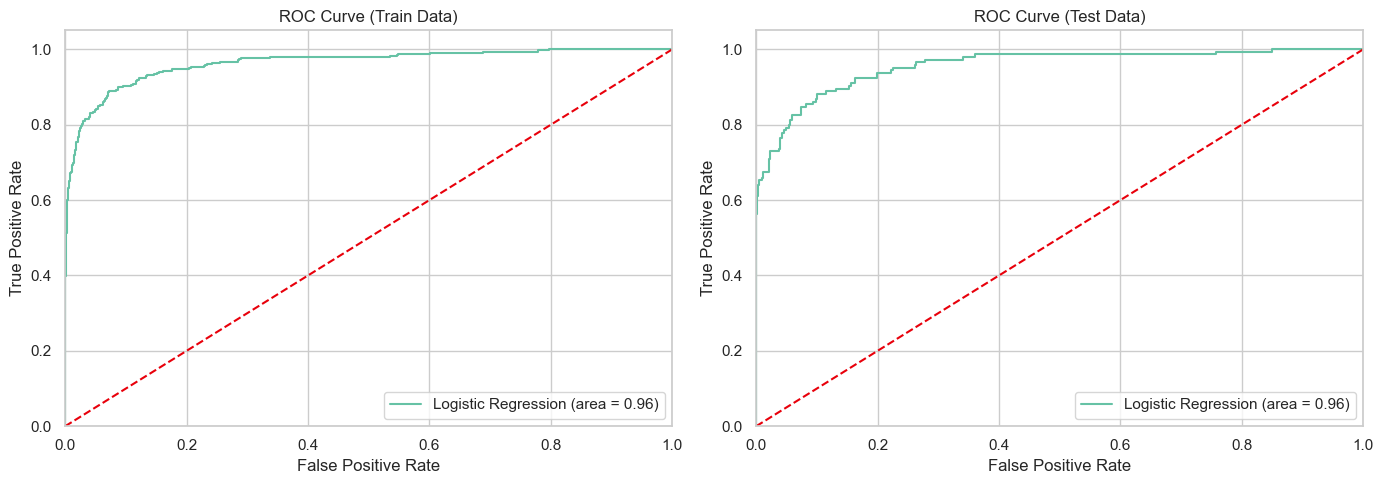

In [310]:

# Train ROC AUC
logit_roc_auc_train = roc_auc_score(y_train, lg3.predict(X_train3))
fpr_train, tpr_train, _ = roc_curve(y_train, lg3.predict(X_train3))

# Test ROC AUC
logit_roc_auc_test = roc_auc_score(y_test, lg3.predict(X_test3))
fpr_test, tpr_test, _ = roc_curve(y_test, lg3.predict(X_test3))

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Train ROC Curve
axes[0].plot(fpr_train, tpr_train, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train)
axes[0].plot([0, 1], [0, 1], 'r--')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve (Train Data)')
axes[0].legend(loc="lower right")

# Test ROC Curve
axes[1].plot(fpr_test, tpr_test, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_test)
axes[1].plot([0, 1], [0, 1], 'r--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve (Test Data)')
axes[1].legend(loc="lower right")

# Adjust layout and show
plt.tight_layout()
plt.show()


### Roc  - Auc curve on Test data

* Logistic Regression model is giving a generalized performance on training and test data
* ROC-AUC score of 0.96 on training and test set is quite good



Coefficient interpretations

* Coefficient of Income, Education, Family,CCavg,CD account,Age, are positive , ie a one unit increase in these will lead to increase in chances of a person borrowing loan

* Coefficient of Securities account, online , Credit card are negative in these will lead to decrease in chances of a person borrowing a loan

### Converting Coefficient to Odds

* The coefficient of the logistic regression model are in terms of log(odds), to find the odds we have to take the exponential of the coefficients

* Therefore; odds = exp(b)

* Calculate the probability from the odds ratio using the formula probability = odds / (1 + odds)

* The percentage change in odds is given as odds = (exp(b) - 1 ) * 100


In [311]:
#Calculate Odds Ratio, probability
##create a data frame to collate Odds ratio, probability and p-value of the coef
lgcoef = pd.DataFrame(lg3.params, columns=['coef'])
lgcoef.loc[:, "Odds Ratio"] = np.exp(lgcoef.coef)
lgcoef['Probability'] = lgcoef['Odds Ratio']/(1+lgcoef['Odds Ratio'])
lgcoef['Percentage Change of Odds']=(np.exp(lg3.params)-1)*100


lgcoef['pval']=lg3.pvalues
pd.options.display.float_format = '{:.2f}'.format
lgcoef = lgcoef.sort_values(by = "Odds Ratio" , ascending = False)
lgcoef

coef  Odds Ratio  Probability  Percentage Change of Odds  \
Income             3.00       20.14         0.95                    1913.74   
Education_3        1.95        7.04         0.88                     603.79   
Education_2        1.83        6.25         0.86                     525.17   
CDAccount          0.84        2.33         0.70                     132.66   
Family             0.77        2.16         0.68                     115.78   
CCAvg              0.18        1.20         0.54                      19.63   
SecuritiesAccount -0.23        0.79         0.44                     -20.85   
Online            -0.34        0.72         0.42                     -28.50   
CreditCard        -0.39        0.68         0.40                     -31.98   
const             -5.17        0.01         0.01                     -99.43   

                   pval  
Income             0.00  
Education_3        0.00  
Education_2        0.00  
CDAccount          0.00  
Family             0.00  
CCAvg              0.05  
SecuritiesAccount  0.04  
Online             0.00  
CreditCard         0.00  
const              0.00

When the odds are 20, this means that for every 1 time the event does not occur, the event is expected to occur 20 times.



* Income : Holding all other features constant a 1 unit change in Income will increase the odds of a customer taking a personal loan by 20 times or a 95% chance of a customer taking personal loan.

* Family : Holding all other features constant a  1 unit change in Family will increase the odds of a customer taking a personal loan by 2.16 times increase in the odds of a customer taking personal loan.

* CCAvg : Holding all other features constant a 1 unit change in CCAVg will increase the odds of a customer taking a personal loan by 1.20 times or a 22.16% increase in the odds of a customer taking personal loan.

* Education Advance has 7 times chances of taking a personal loan than undergraduate Interpretation for other attributes can be done similarly.

__Most ovarall significant varaibles are Income , Education, CD account , Family and CCAvg__

### Model performance evaluation and improvement

 MODEL PERFORMANCE
 Accuracy   : Train: 0.959  Test:  0.956
 Recall     : Train: 0.682  Test: 0.674
 Precision  : Train: 0.864  Test:  0.836
 F1         : Train: 0.762  Test: 0.746


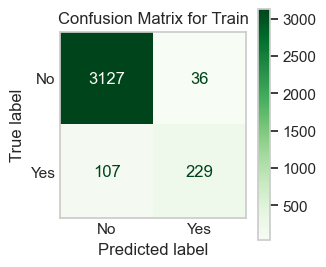

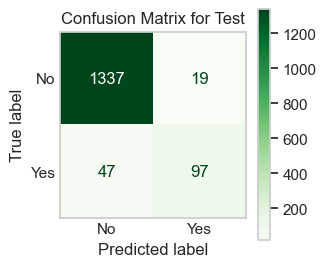

In [312]:
# Let's check model performances for this model
scores_LR = get_metrics_score(lg3,X_train3,X_test3,y_train,y_test,statmodel)

**Insights:**

**True Positives:**

Reality: A customer wanted to take personal Loan.
Model Prediction: The customer will take personal loan.
Outcome: The model is good.
    
**True Negatives**:

Reality: A customer didn't wanted to take personal loan.
Model Prediction: The customer will not take personal loan.
Outcome: The business is unaffected .

**False Positives** :

Reality: A customer didn't want to take personal loan.
Model Prediction: The customer will take personal loan.
Outcome: The team which is targeting the potential customers would waste their resources on the customers who will not be buying a personal loan.

**False Negatives**:

Reality: A customer wanted to take personal Loan.
Model Prediction: The customer will not take personal loan.
Outcome: The potential customer is missed by the salesteam. This is loss of oppurtunity. The purpose of campaign was to target such customers. If team knew about this customers, they could have offered some good APR /interest rates.

### Right Metric to use:

__Here not able to identify a potential customer is the biggest loss we can face. Hence, Recall is the right metric to check the performance of the 
model. We have recall as 68%  on train and 67%  on test. False negative are 107 and 47 on train and test. We can further improve this score 
using Optimal thresholds for ROC AUC curve and precision recall curve__

### Optimal threshold using AUC-ROC curve

In [313]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
#fpr, tpr, thresholds = metrics.roc_curve(y_test, lg2.predict(X_test2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.13565685133881916


In [314]:
X_train3.head()

const  Income  Family  CCAvg  SecuritiesAccount  CDAccount  Online  \
0   1.00    0.42   -1.21   0.48              -0.35      -0.25    0.84   
1   1.00   -0.65   -0.34   0.19              -0.35      -0.25    0.84   
2   1.00   -0.35   -1.21  -0.09              -0.35      -0.25    0.84   
3   1.00    1.33    0.53   1.61               2.89       3.93    0.84   
4   1.00   -0.69    0.53  -0.77              -0.35      -0.25    0.84   

   CreditCard  Education_2  Education_3  
0       -0.64        -0.61         1.50  
1       -0.64        -0.61         1.50  
2       -0.64        -0.61         1.50  
3       -0.64         1.63        -0.66  
4       -0.64         1.63        -0.66

 MODEL PERFORMANCE
 Accuracy   : Train: 0.959  Test:  0.956
 Recall     : Train: 0.682  Test: 0.674
 Precision  : Train: 0.864  Test:  0.836
 F1         : Train: 0.762  Test: 0.746


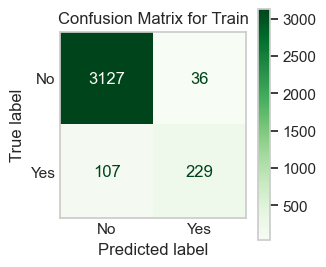

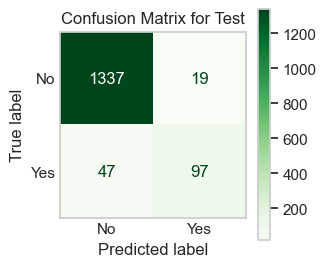

 ROC-AUC Score  :Train::  0.835  Test::  0.83


In [315]:
scores_statmodel = get_metrics_score(lg3 , X_train3 , X_test3 , y_train , y_test , statmodel , threshold=optimal_threshold_auc_roc , roc = True)
add_score_model(scores_statmodel)

__with 0.092 Threshold the Recall score has improved from 68% to 87% on test data with 89% accuracy. Also False negative values
has decreased to 18 from 46 testdata. ROC-AUC score is 88 which is good.__

##### Let's use Precision-Recall curve and see if we can find a better threshold

Text(0.0, 1.0, 'Precision - Recall Curve')

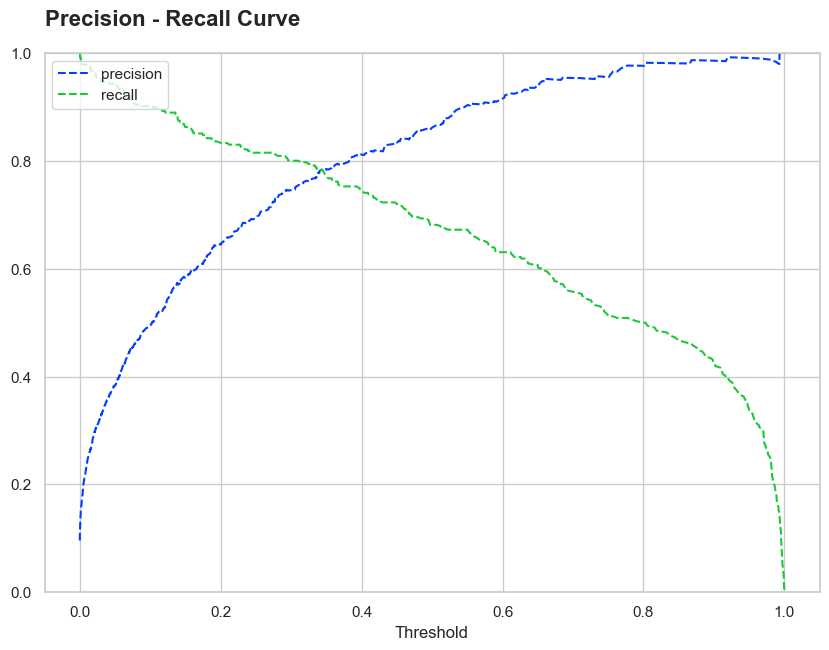

In [316]:
y_scores = lg3.predict(X_train3)
prec, rec , tre = precision_recall_curve(y_train , y_scores)


def plot_prec_recall_vs_tresh(precisions , recalls , thresholds):
    plt.plot(thresholds , precisions[:-1] , 'b--' , label = 'precision')
    plt.plot(thresholds , recalls[:-1], 'g--' , label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc = 'upper left') 
    plt.ylim([0 ,1])
    
plt.figure(figsize = (10 ,7))
plot_prec_recall_vs_tresh(prec , rec , tre)
plt.title("Precision - Recall Curve", fontdict={'fontsize': 16, 'fontweight': 'bold'}, loc='left', pad=20)


In [317]:
# Calculate F1-scores for each threshold
f1_scores = 2 * (prec[:-1] * rec[:-1]) / (prec[:-1] + rec[:-1])

# Find the optimal threshold (where F1 is maximized)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = tre[optimal_idx]

optimal_threshold

0.3447936341931933

 MODEL PERFORMANCE
 Accuracy   : Train: 0.959  Test:  0.956
 Recall     : Train: 0.682  Test: 0.674
 Precision  : Train: 0.864  Test:  0.836
 F1         : Train: 0.762  Test: 0.746


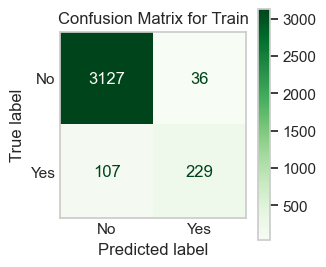

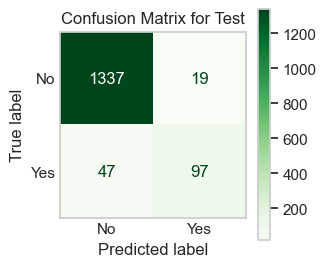

 ROC-AUC Score  :Train::  0.835  Test::  0.83


In [318]:
scores_opt_curve = get_metrics_score(lg3,X_train3,X_test3,y_train,y_test,statmodel,threshold=optimal_threshold,roc=True)
add_score_model(scores_opt_curve)


__with this model the False negative cases have gone up and recall for test is 72 with 95% accuracy. Model is performing  well on training and test set. Model is performing well on training and test set. Model has given a balanced performance, if the bank wishes to maintain a balance between recall and precision this model can be used. Area under the curve has decreased as compared to the initial model but the performance is generalized on training and test  set.__

### Using Sequential Feature Selection

In [319]:
X_train_seq = X_train_stat
X_test_seq  = X_test_stat

### Getting SequentialFeatureSelector from mlxtend

In [320]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
X_train_seq.shape


(3499, 16)

# Trying with all 16 feature

In [321]:
statmodel =  0 #0 for sklearn and 1 for statmodel

clf = LogisticRegression(solver = 'newton-cg' , random_state = 1 , fit_intercept = False)

# Build step forward feature selection

sfs1 = sfs(clf, k_features = 16 , forward = True, floating = False, scoring = 'recall' , verbose = 2 , cv = 5)

# Perform SFFS
sgs1 = sfs1.fit(X_train_seq , y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.6s finished

[2024-12-18 15:04:43] Features: 1/16 -- score: 0.9941176470588236[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.8s finished

[2024-12-18 15:04:44] Features: 2/16 -- score: 0.9970588235294118[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.8s finished

[2024-12-18 15:04:44] Features: 3/16 -- score: 0.9970588235294118[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

# Trying with 11 Features

In [322]:
statmodel = 0

clf = LogisticRegression(solver = 'newton-cg' , random_state = 1 , fit_intercept = False)

# Build step forward feature selection
sfs1 = sfs(clf , k_features= 11 , forward=True , floating = False , scoring = 'recall' , verbose = 2 , cv = 5)

# Perform SFFS 

sfs1 = sfs1.fit(X_train_seq , y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.7s finished

[2024-12-18 15:04:52] Features: 1/11 -- score: 0.9941176470588236[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.8s finished

[2024-12-18 15:04:53] Features: 2/11 -- score: 0.9970588235294118[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.8s finished

[2024-12-18 15:04:53] Features: 3/11 -- score: 0.9970588235294118[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [328]:
# NOw Which features are important?

feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[1, 2, 4, 5, 6, 8, 9, 10, 11, 13, 14]


In [329]:
X_train_seq.columns[feat_cols]

Index(['Age', 'Income', 'CCAvg', 'Mortgage', 'SecuritiesAccount', 'Online',
       'CreditCard', 'Regions_Central', 'Regions_Los Angeles Region',
       'Regions_Superior', 'Education_2'],
      dtype='object')

### Now we will fit a sklearn model using these features only

In [330]:
X_train_final = X_train_seq[X_train_seq.columns[feat_cols]]
X_test_final = X_test_seq[X_train_final.columns]

 MODEL PERFORMANCE
 Accuracy   : Train: 0.677  Test:  0.686
 Recall     : Train: 0.997  Test: 0.972
 Precision  : Train: 0.229  Test:  0.231
 F1         : Train: 0.372  Test: 0.373


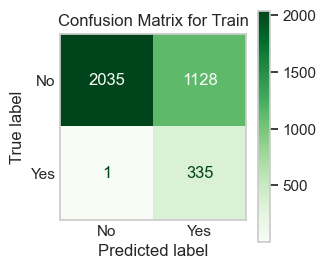

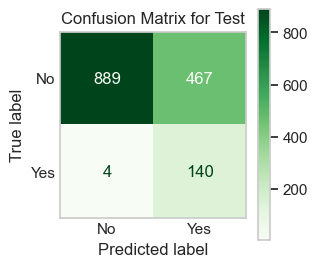

In [331]:
lr = LogisticRegression(solver='newton-cg',random_state=1,fit_intercept=False)
model  = lr.fit(X_train_final,y_train)


statmodel=0  #0 for sklearn and 1 for statmodel

# Let's check model performances for this model
scores_sfs = get_metrics_score(model,X_train_final,X_test_final,y_train,y_test,statmodel)
add_score_model(scores_sfs)


In [333]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression Model- Sklearn',
                                          'Logistic Regression Model - Statsmodels',
                                          'Logistic Regression - Optimal threshold = 0.092',
                                          'Logistic Regression - Optimal threshold = 0.3',
                                          'Logistic Regression - Sequential feature selection'
                                          ],
                                          'Train_Accuracy':acc_train, 
                                          'Test_Accuracy':acc_test,
                                          'Train Recall':recall_train,
                                          'Test Recall':recall_test, 
                                          'Train Precision':precision_train,
                                          'Test Precision':precision_test,
                                          'Train F1':f1_train,
                                          'Test F1':f1_test
                                })


comparison_frame

ValueError: All arrays must be of the same length

# Model building Decision Tree

* __Data preparation__
* __Partition the data into train and test set.__
* __Build a CART model on the train data__
* __Tune the model and prune the tree, if required__

In [334]:
#drop column which we don't need for modelling
df_Decision.drop(columns=["Agebin", "ZIPCode","County",'Experience','Income_group','Spending_group'], inplace=True)

In [335]:
X_dt  = df_Decision.drop('PersonalLoan' , axis = 1)
y_dt = df_Decision['PersonalLoan']

In [336]:
# OneHot Encoding

oneHotCols = X_dt.select_dtypes(exclude = 'number').columns.to_list() # selecting categorial columns

X_dt = pd.get_dummies(X_dt, columns = oneHotCols , drop_first= True)

# Splitting data set

X_train_dt , X_test_dt, y_train_dt , y_test_dt =  train_test_split(X_dt , y_dt , test_size = 0.3 , random_state = 1 , stratify=y_dt )

# Build Model

* __We are using 'gini' criteria to split.__

* __If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.__

* __To handle this imbalanced data set,we can pass a dictionary {0:0.15,1:0.85} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.__

* __class_weight is a hyperparameter for the decision tree classifier.__

* __Since not being able to identify a potential customer is the biggest loss as mentioned earlier with logistic regression. Hence, recall is the right metric to check the performance of the model.__

In [337]:
##  Function to calculate recall score
def get_recall_score(model):
    """
    model : classifier to predict values of X

    """
    ytrain_predict = model.predict(X_train_dt)
    ytest_predict = model.predict(X_test_dt)
    # accuracy on training set
    print(
        "\x1b[0;30;47m \033[1mAccuracy : Train :\033[0m",
        model.score(X_train_dt, y_train_dt),
        "\x1b[0;30;47m \033[1mTest:\033[0m",
        model.score(X_test_dt, y_test_dt),
    )
    # accuracy on training set
    print(
        "\x1b[0;30;47m \033[1mRecall   : Train :\033[0m",
        metrics.recall_score(y_train_dt, ytrain_predict),
        "\x1b[0;30;47m \033[1mTest:\033[0m",
        metrics.recall_score(y_test_dt, ytest_predict),
    )
    make_confusion_matrix(y_train_dt, ytrain_predict, "Confusion Matric on Train Data")
    make_confusion_matrix(y_test_dt, ytest_predict, "Confusion Matric on Test Data")

In [120]:
y_dt.value_counts()

PersonalLoan
0    4519
1     480
Name: count, dtype: int64

 Accuracy : Train : 1.0  Test: 0.984
 Recall   : Train : 1.0  Test: 0.9027777777777778


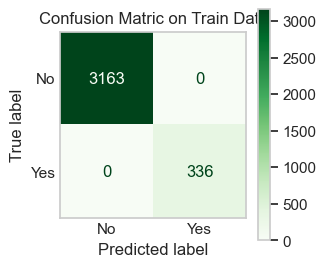

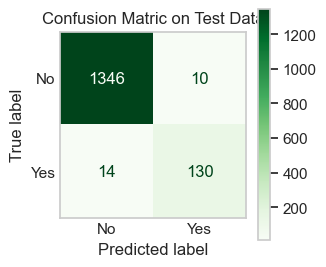

In [121]:
# since data is imbalance adding weights 

model = DecisionTreeClassifier(criterion= 'gini',
                               class_weight = {0:0.15 , 1:0.85} , random_state = 1)
model.fit(X_train_dt , y_train_dt)
get_recall_score(model)

__Decision tree tends to Overfit and the disparity between the Recall on Train and Test suggest that the model is
overfitted__

### Visuaizing the Decision Tree

In [122]:
column_names = list(X_dt.columns)
feature_names = column_names
print(feature_names)

['Age', 'Income', 'CCAvg', 'Mortgage', 'Family_2', 'Family_3', 'Family_4', 'Education_2', 'Education_3', 'SecuritiesAccount_1', 'CDAccount_1', 'Online_1', 'CreditCard_1', 'Regions_Central', 'Regions_Los Angeles Region', 'Regions_Southern', 'Regions_Superior']


In [123]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

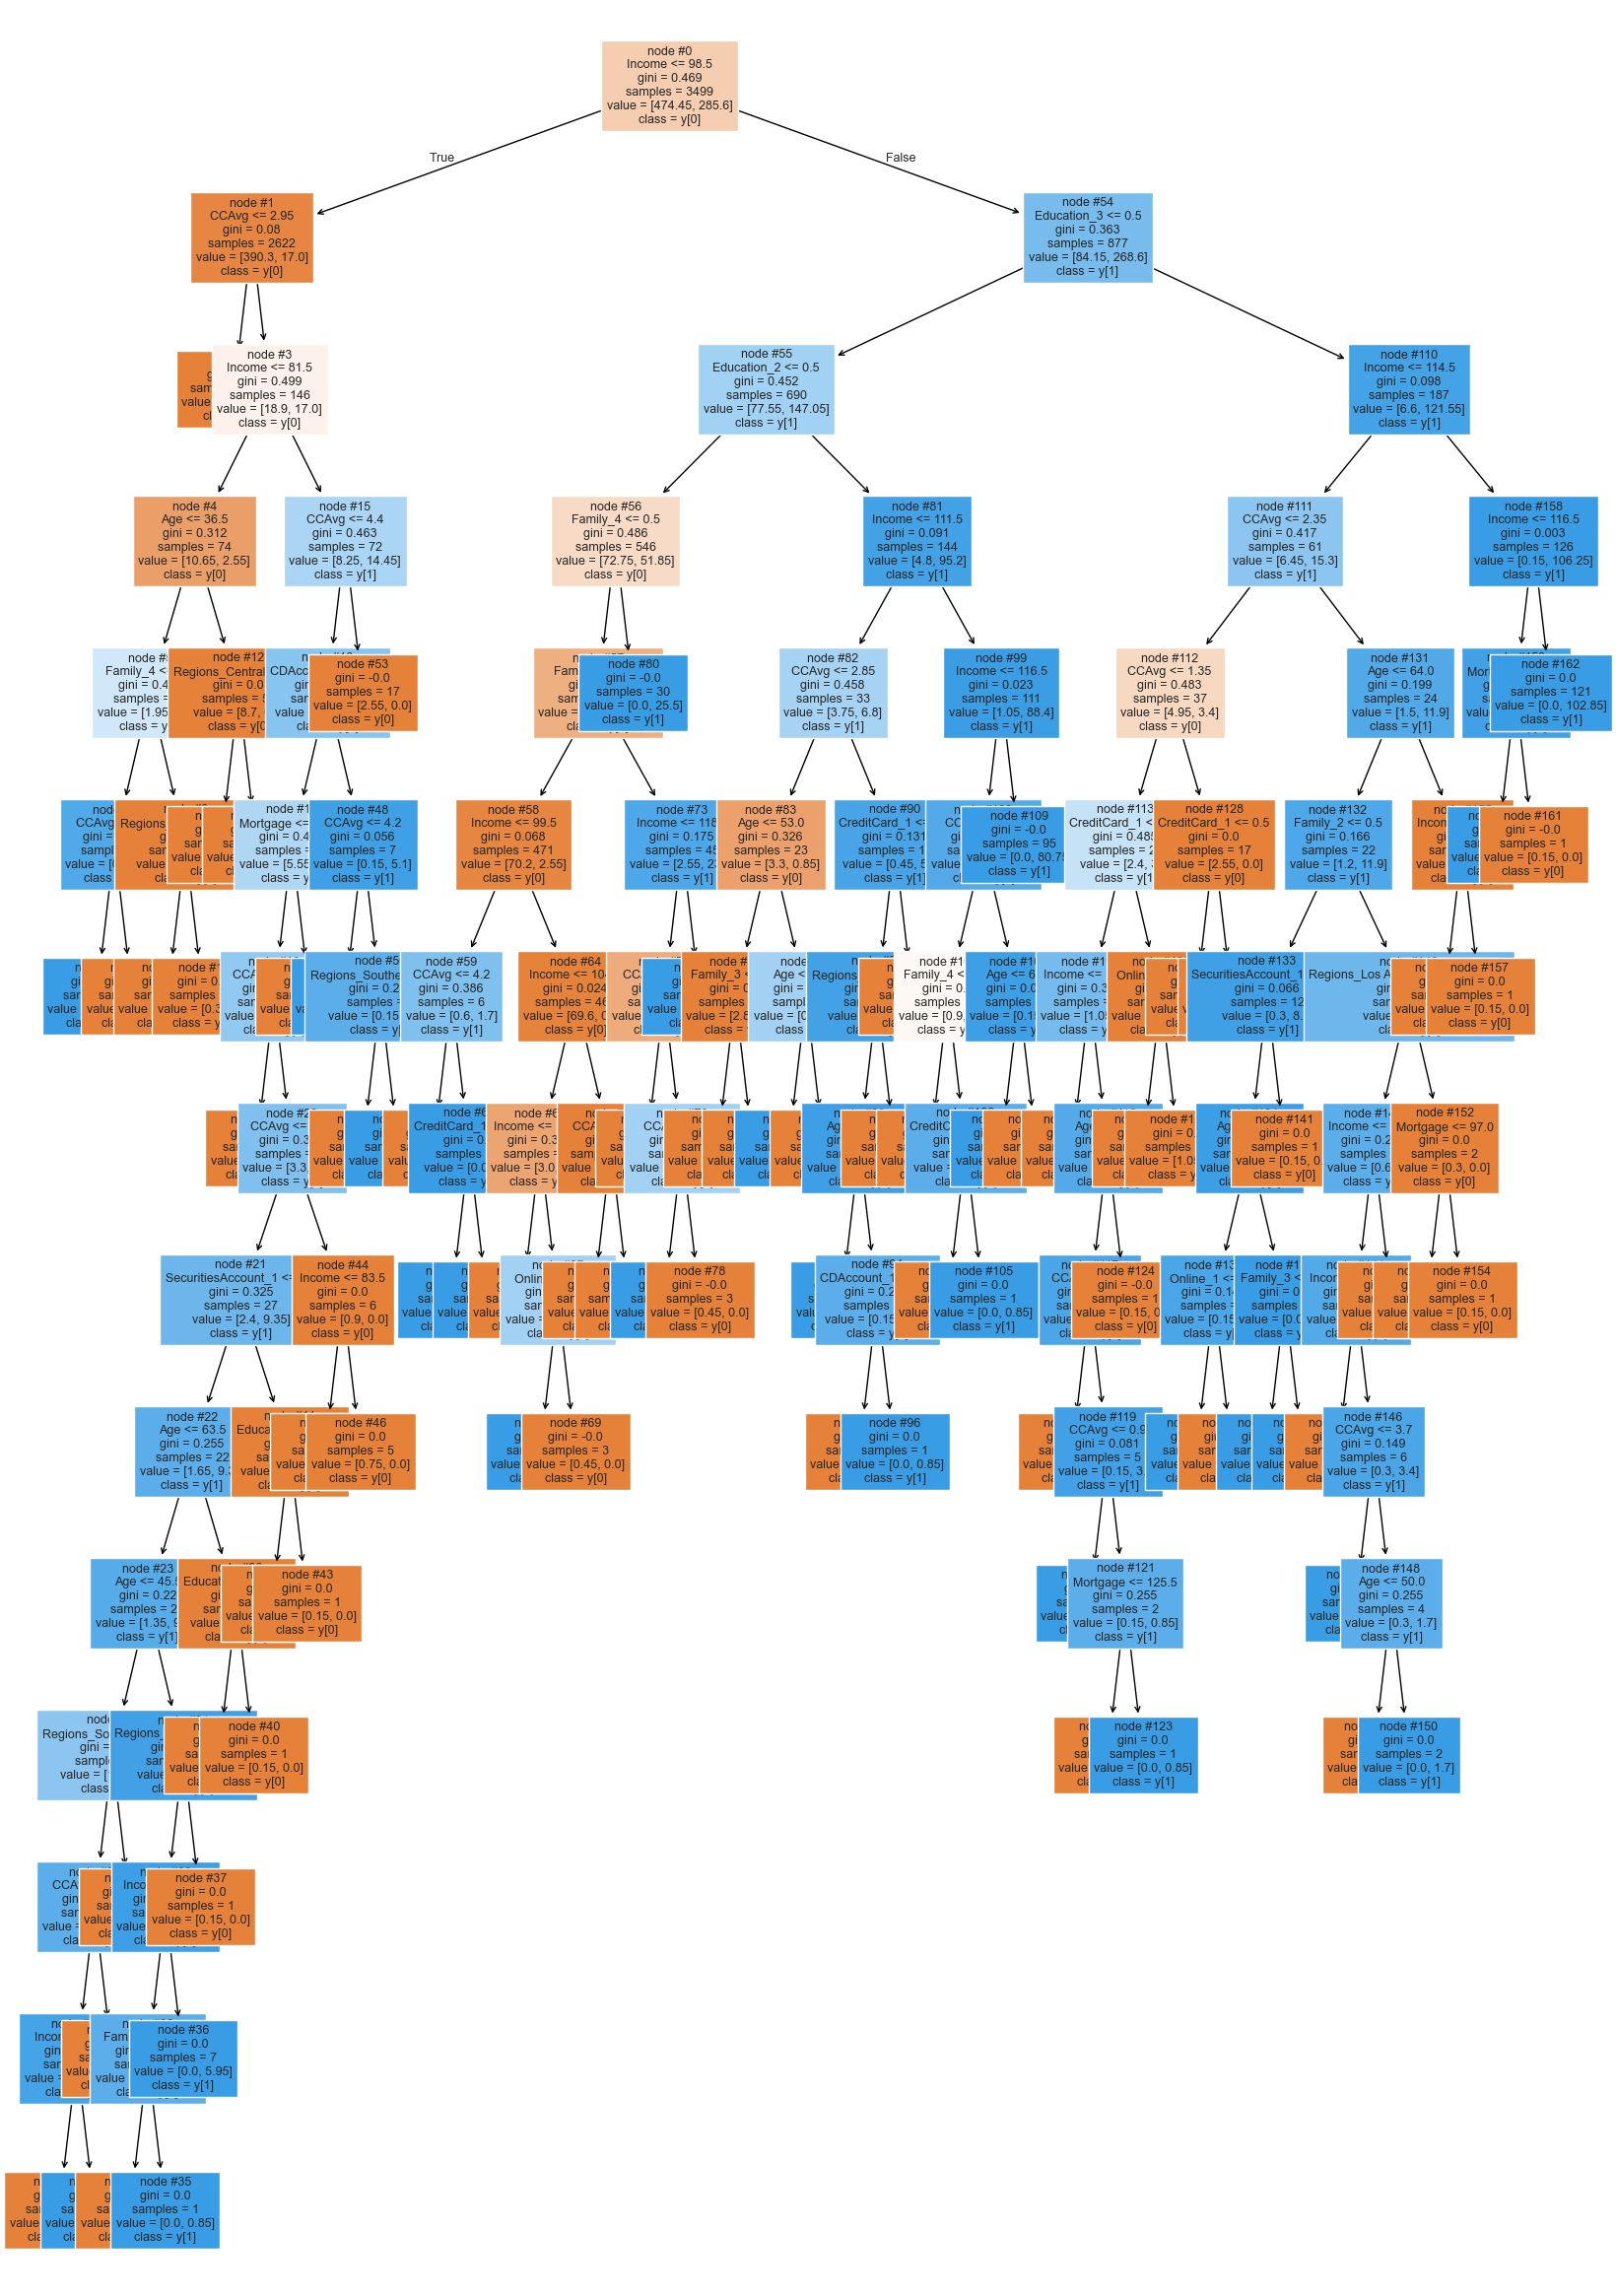

In [124]:
plt.figure(figsize=(20 , 30))


out = tree.plot_tree(model , feature_names = feature_names ,filled = True , fontsize = 9 , node_ids = True,
                     class_names = True)


for o in out:
    arrow  = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
        
plt.show()


In [125]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model , feature_names = feature_names, show_weights  = True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [371.40, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 81.50
|   |   |   |--- Age <= 36.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- CCAvg <= 3.50
|   |   |   |   |   |   |--- weights: [0.00, 2.55] class: 1
|   |   |   |   |   |--- CCAvg >  3.50
|   |   |   |   |   |   |--- weights: [0.30, 0.00] class: 0
|   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |--- Regions_Central <= 0.50
|   |   |   |   |   |   |--- weights: [1.35, 0.00] class: 0
|   |   |   |   |   |--- Regions_Central >  0.50
|   |   |   |   |   |   |--- weights: [0.30, 0.00] class: 0
|   |   |   |--- Age >  36.50
|   |   |   |   |--- Regions_Central <= 0.50
|   |   |   |   |   |--- weights: [8.25, 0.00] class: 0
|   |   |   |   |--- Regions_Central >  0.50
|   |   |   |   |   |--- weights: [0.45, 0.00] class: 0
|   |   |--- Income >  81.50
|   |   |   |--- CCAvg <= 4.40
|   |   |   |   |--- CDAccount_1 <= 0.50
|  

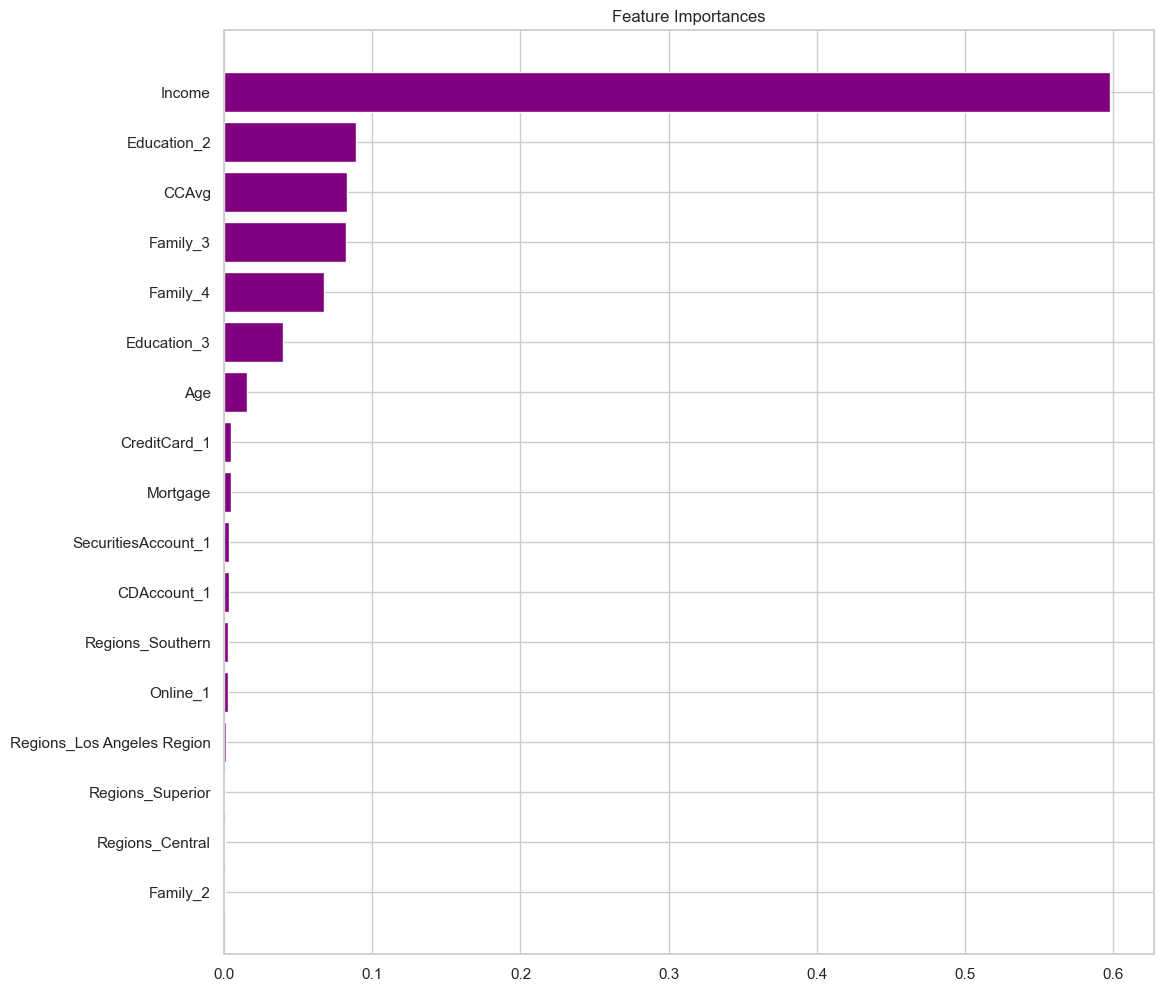

In [126]:
importances = model.feature_importances_
indices = np.argsort(importances)


plt.figure(figsize = (12 , 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)) , importances[indices] , color = 'purple' , align = 'center')
plt.yticks(range(len(indices)) , [feature_names[i] for i in indices])
plt.show()

### Using GridSearch for Hyperparameter tuning of our tree model

* __Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters__

* __If is an exhaustive search that is performed on the specific parameter values of a model.__

* __The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search__

* __Let's see if we can improve out model performance even more.__

In [127]:
# Choose the type of classifier.

estimator  = DecisionTreeClassifier(random_state = 1)

# Grid of parameters to choose from 

parameters = {'max_depth' : np.arange(1, 10),
              'min_samples_leaf' : [1 ,2, 5, 7, 10, 15, 20],
              'max_leaf_nodes' : [5, 10, 15, 20, 25, 30],
              }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)


# Run the grid search
grid_obj = GridSearchCV(estimator, parameters , scoring = acc_scorer , cv = 5)
grid_obj = grid_obj.fit(X_train_dt , y_train_dt)


# set the clf to the best combinaation of parameters
estimator = grid_obj.best_estimator_
estimator

DecisionTreeClassifier(max_depth=9, max_leaf_nodes=30, min_samples_leaf=2,
                       random_state=1)

In [128]:
# fit the best algorithm to the data.

estimator.fit(X_train_dt , y_train_dt)
ytrain_predict = estimator.predict(X_train_dt)
ytest_predict = estimator.predict(X_test_dt)

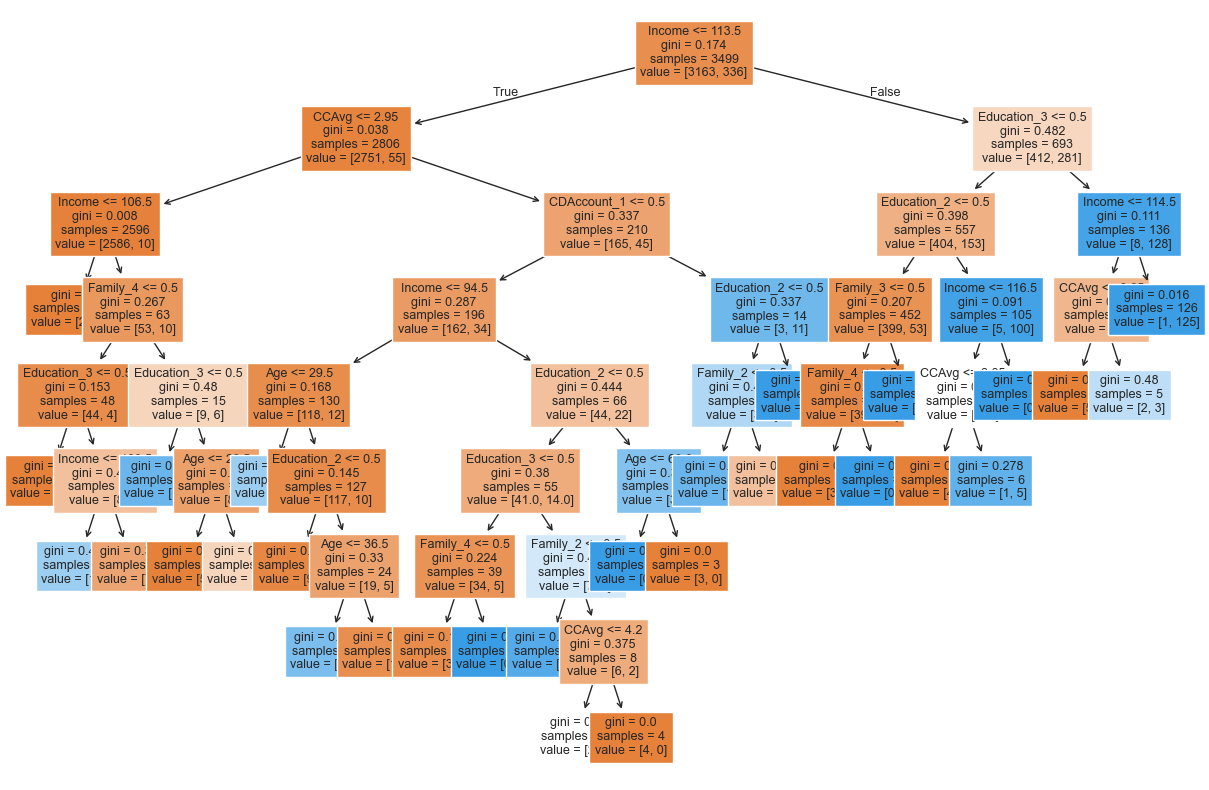

In [129]:
plt.figure(figsize = (15 ,10))


out = tree.plot_tree(estimator , feature_names= feature_names , filled = True , fontsize = 9
                     , node_ids = False)


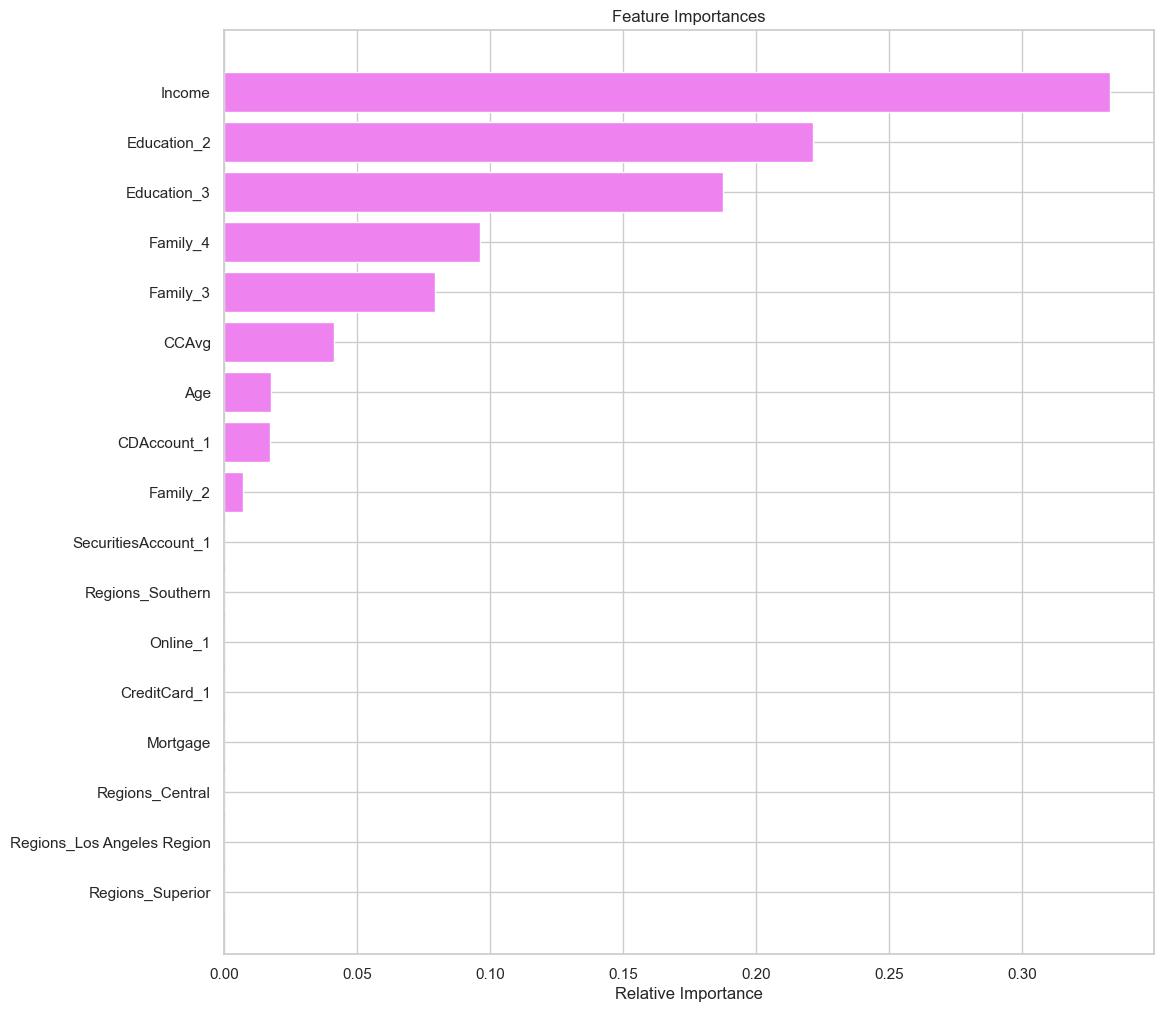

In [130]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize =  (12 ,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)) , importances[indices] , color = 'violet' , align = 'center')
plt.yticks(range(len(indices)) , [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

 Accuracy : Train : 0.992283509574164  Test: 0.984
 Recall   : Train : 0.9494047619047619  Test: 0.9166666666666666


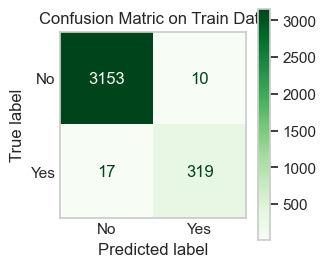

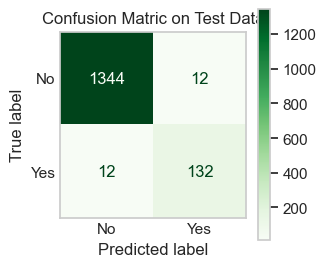

In [131]:
get_recall_score(estimator)

*  __With HyperParameter max_depth = 6 , max_leaf_nodes = 20 , min_samples_leaf = 7 the overfitting on train has reduced, but 
the recall for test has not improved__

* __Important features are Income,Education 2 and Education 3, Family 4, Family 3, CCavg & Age.__

* __But the recall metric is still 91 and false negative are 12.We don't want to loose opportunity in
predicting this customers. so Let see if instead of pre prunning helps in reducing false negative.__

# Cost Complexity Pruning

**Definition**:  
Cost Complexity Pruning simplifies a decision tree by balancing:  
1. **Error** (accuracy of the tree).  
2. **Tree Size** (number of leaves).  

The goal is to make the tree **accurate** and **simple**.

---

## Formula  

The total cost of the tree is given by:  

\[
C(T) = R(T) + \alpha \cdot |T|
\]

Where:  
- \( C(T) \): Total cost of the tree.  
- \( R(T) \): Error of the tree.  
- \( |T| \): Number of leaves in the tree.  
- \( \alpha \): Penalty parameter for tree size.

---

## Steps  

1. **Build a Full Tree**:  
   - Start with a large tree that fits the data well.

2. **Prune the Tree**:  
   - Gradually remove branches to simplify the tree.  

3. **Adjust \( \alpha \)**:  
   - **Small \( \alpha \)** → Less pruning, bigger tree.  
   - **Large \( \alpha \)** → More pruning, smaller tree.

4. **Find the Best \( \alpha \)**:  
   - Test on validation data.  
   - Choose the \( \alpha \) with the lowest cost \( C(T) \).

---

## Why Use It?  
- To **avoid overfitting**.  
- To make the tree **simpler** and easier to understand.  
- To **generalize better** to new data.


In [132]:
clf = DecisionTreeClassifier(random_state = 1)
path = clf.cost_complexity_pruning_path(X_train_dt , y_train_dt)
ccp_alphas, impurities = path.ccp_alphas , path.impurities

Text(0.5, 1.0, 'Total impurity vs effective alpha for training set')

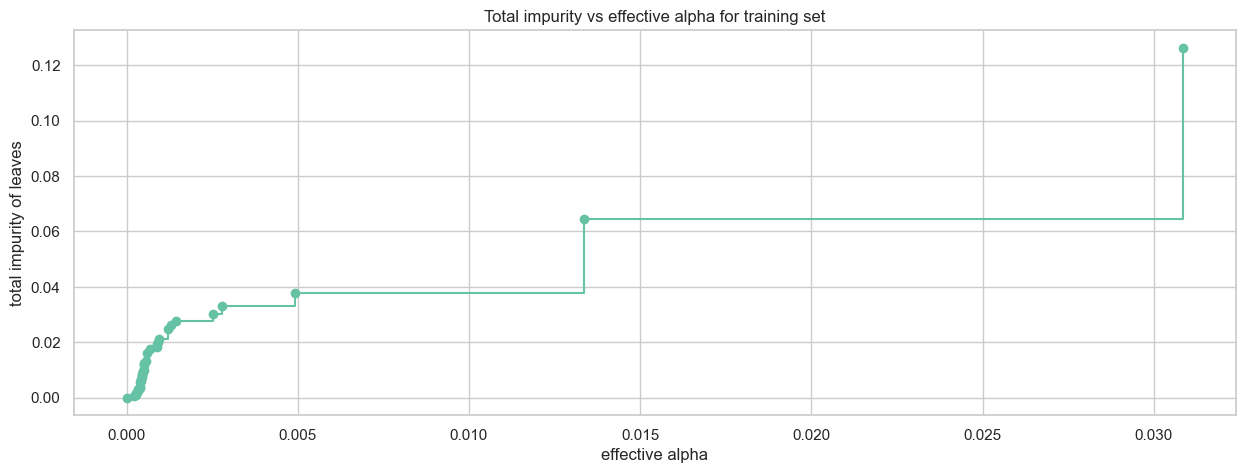

In [133]:
fig , ax = plt.subplots(figsize = (15 , 5))
ax.plot(ccp_alphas[:-1] , impurities[:-1] , marker = 'o' , drawstyle = "steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total impurity vs effective alpha for training set")

__Next, we train a decision tree using the effective alphas. We  will set these values of alpha and pass
it to the ccp_alpha parameter of our DecisionTreeClassifier. By looping over the alphas array, we will find the accuracy on both Train and Test parts of our dataset__

In [134]:
ccp_alphas

array([0.        , 0.00022864, 0.00027075, 0.00028353, 0.00032244,
       0.00034296, 0.00038001, 0.00038106, 0.00039393, 0.00042869,
       0.00042869, 0.00045727, 0.00045727, 0.00045727, 0.00047633,
       0.00048736, 0.00050014, 0.00050808, 0.00051443, 0.00051443,
       0.00057159, 0.00059167, 0.00067049, 0.00088527, 0.00089311,
       0.00091581, 0.00095265, 0.00121372, 0.00129289, 0.0014536 ,
       0.00253635, 0.00279963, 0.00491759, 0.01337108, 0.03086095,
       0.04730132])

In [135]:
clfs = []
accuracy_train = []
accuracy_test = []
recall_train = []
recall_test = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.15, 1: 0.85})
    clf.fit(X_train_dt, y_train_dt)

    y_train_pred = clf.predict(X_train_dt)
    y_test_pred = clf.predict(X_test_dt)
    
    accuracy_train.append(clf.score(X_train_dt , y_train_dt))
    accuracy_test.append(clf.score(X_test_dt , y_test_dt))
    
    recall_train.append(metrics.recall_score(y_train_dt , y_train_pred))
    recall_test.append(metrics.recall_score(y_test_dt, y_test_pred))
    
    clfs.append(clf)


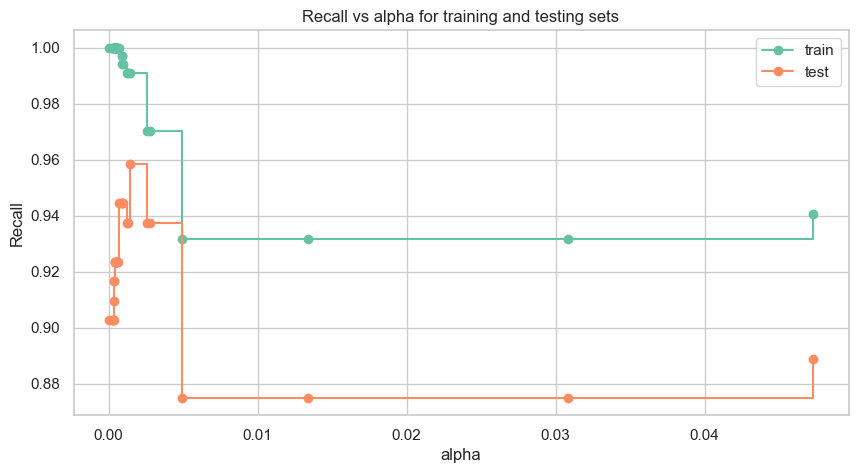

In [136]:
fig , ax = plt.subplots(figsize = (10 , 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")

ax.set_title("Recall vs alpha for training and testing sets")

ax.plot(ccp_alphas, recall_train , marker = 'o' , label = 'train' , drawstyle = "steps-post")
ax.plot(ccp_alphas, recall_test , marker = 'o' , label = "test" , drawstyle = "steps-post")


ax.legend()
plt.show()


__We are getting a higher recall on test data between 0.002 to 0.005. Will choose alpha as 0.002.__

### Creating model with 0.002 ccp_alpha

In [137]:
best_model = DecisionTreeClassifier(ccp_alpha = 0.002 , class_weight = {0 : 0.15 , 1 : 0.85} , random_state = 1 )
best_model.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier(ccp_alpha=0.002, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

 Accuracy : Train : 0.9794226921977708  Test: 0.9753333333333334
 Recall   : Train : 0.9791666666666666  Test: 0.9583333333333334


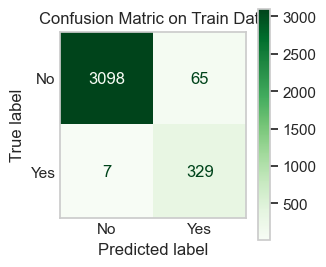

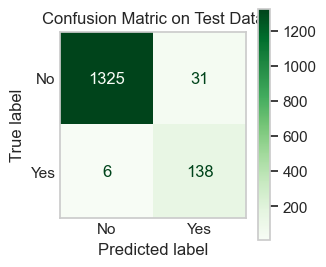

In [138]:
get_recall_score(best_model)

### The Recall on train and test indicate we have created a generalized model. with 96% accuracy and reduced False negatives

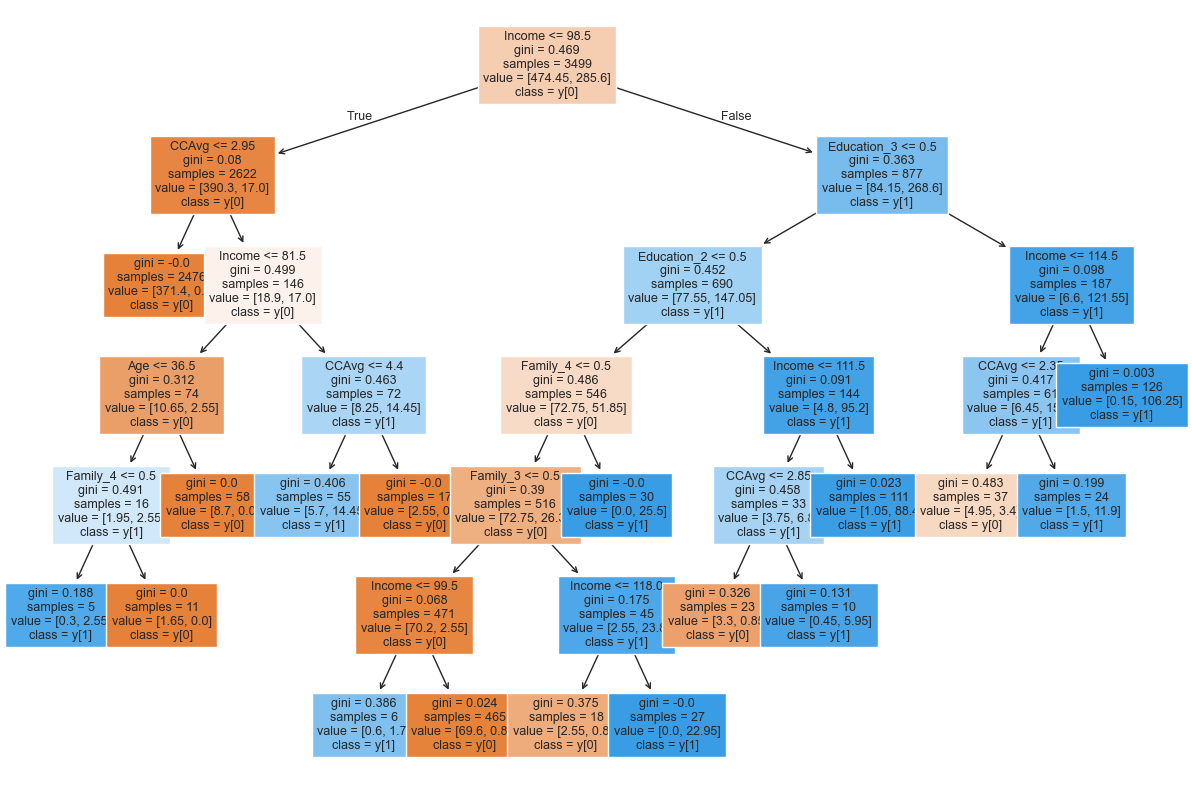

In [139]:
plt.figure(figsize = (15 , 10 ))

out = tree.plot_tree(best_model , feature_names=feature_names , filled = True, fontsize = 9 , node_ids = False ,class_names = True)

In [140]:
feature_names

['Age',
 'Income',
 'CCAvg',
 'Mortgage',
 'Family_2',
 'Family_3',
 'Family_4',
 'Education_2',
 'Education_3',
 'SecuritiesAccount_1',
 'CDAccount_1',
 'Online_1',
 'CreditCard_1',
 'Regions_Central',
 'Regions_Los Angeles Region',
 'Regions_Southern',
 'Regions_Superior']

In [141]:
# Text report showing the rules of a decision tree

print(tree.export_text(best_model , feature_names = feature_names , show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [371.40, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 81.50
|   |   |   |--- Age <= 36.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- weights: [0.30, 2.55] class: 1
|   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |--- weights: [1.65, 0.00] class: 0
|   |   |   |--- Age >  36.50
|   |   |   |   |--- weights: [8.70, 0.00] class: 0
|   |   |--- Income >  81.50
|   |   |   |--- CCAvg <= 4.40
|   |   |   |   |--- weights: [5.70, 14.45] class: 1
|   |   |   |--- CCAvg >  4.40
|   |   |   |   |--- weights: [2.55, 0.00] class: 0
|--- Income >  98.50
|   |--- Education_3 <= 0.50
|   |   |--- Education_2 <= 0.50
|   |   |   |--- Family_4 <= 0.50
|   |   |   |   |--- Family_3 <= 0.50
|   |   |   |   |   |--- Income <= 99.50
|   |   |   |   |   |   |--- weights: [0.60, 1.70] class: 1
|   |   |   |   |   |--- Income >  99.50
|   |   |   |   |   |   |--- weights: [69.60, 0.85] class: 0
|   

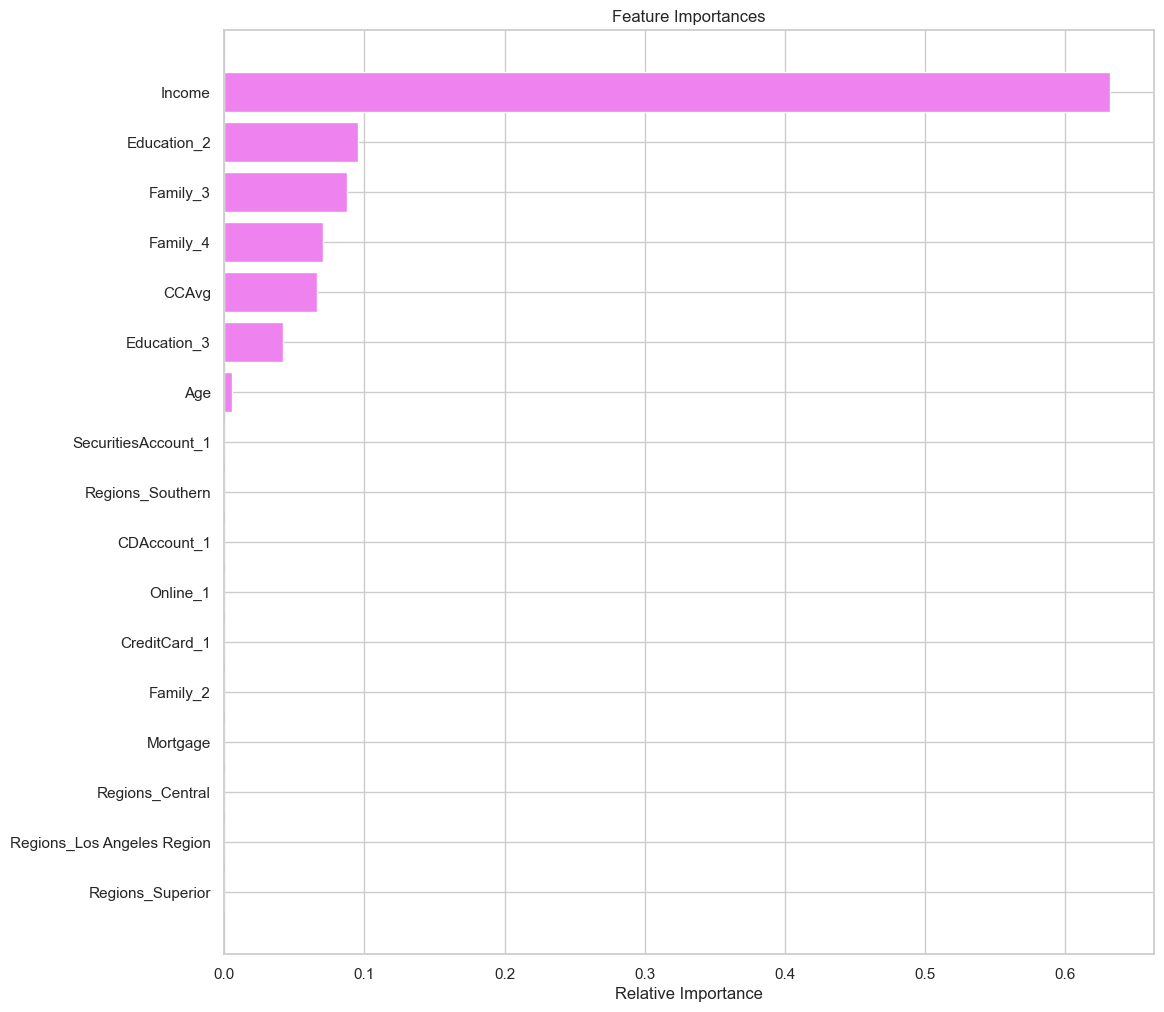

In [142]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* __We are getting a higher recall on test data between 0.002 to 0.005. We choosed alpha as 0.002__
* __The Recall on trian and test indicate we have created a generalized model. with 96 % accuracy and reduced False negatives.__
* __Important features : Income, Graduate education, Family member 3 and 4 , CCavg , Advance education Age.__
* __This is the best model as false negative is only 6 on Testdata.__

# Comparing all the model based on Model Performance

In [145]:
comparison_frame = pd.DataFrame({'Model':['Logisitic Regression with Optimal Threshold 0.104',
                                          'Initial decision tree model',
                                          'Decision treee with hyperparameter tuning',
                                          'Decision tree with post-pruning'], 
                                          'Train_accuracy':[0.92,1,0.99,0.98],
                                          'Test_accuracy':[0.91,0.98,0.98,0.97],
                                          'Train_Recall':[0.90,1,0.92,0.98], 
                                          'Test_Recall':[0.88,0.86,0.84,0.96]})  
comparison_frame

Model  Train_accuracy  \
0  Logisitic Regression with Optimal Threshold 0.104            0.92   
1                        Initial decision tree model            1.00   
2          Decision treee with hyperparameter tuning            0.99   
3                    Decision tree with post-pruning            0.98   

   Test_accuracy  Train_Recall  Test_Recall  
0           0.91          0.90         0.88  
1           0.98          1.00         0.86  
2           0.98          0.92         0.84  
3           0.97          0.98         0.96

__Decision tree model post prunning has given us best recall scores on data with 97% accuracy, Explotary data analysis also suggested income and education were important features in deciding if person will borrow personal loan. so choosing Decision Tree with post-prunning for our prediction__


              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1356
           1       0.82      0.96      0.88       144

    accuracy                           0.98      1500
   macro avg       0.91      0.97      0.93      1500
weighted avg       0.98      0.98      0.98      1500



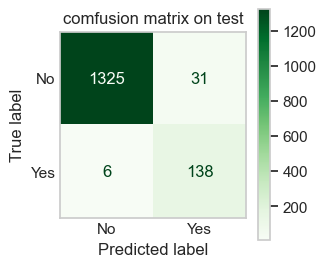

In [148]:
y_pred = best_model.predict(X_test_dt)
print(classification_report(y_test_dt , y_pred))
make_confusion_matrix(y_test, y_pred , "comfusion matrix on test")

# Observation

* __After Post Pruning, the false negative has reduced to 6. The accuracy on test data is 97% & Recall is 97% after choosing optimal cc-alpha__

### Conclusion

* __We analyzed the Personal Loan campaign data using EDA and by using different models like Logistic Regression and Decision Tree Classifier to build a likelihood of Customer buying Loan.__

* __First we build model using Logistic Regression and performance metric used was Recall. The most important features for classification were Income, Education, CD account, Family and CCAvg.__

* __Coefficient of Income, Graduate and Advance Education , Family_3 , Family 4 , CCavgCD , CD account,
Age, are positive , ie a one unit increase in these will lead to increase in chances of a person borrowing loan__

* __Coefficient of Securities account, online , Family_2 credit card are negative increase in these will lead to decrease in chances of a person borrowing a loan__

* __We also improved the performance using ROC-AUC curve and optimal threshold. This was best model with high recall and accuracy__

* __Decision tree can easily overfit. They require less datapreprocessing compared to logistic Regression and are easy to understand.__

* __We used decision trees with prepruning and post pruning. The Post pruning model gave 96 % recall with 97% accuracy.__

* __Income, Customers with graduate degree, customers having 3 family members are some of the most important variables in predicting if the customers will purchase a personal loan.__

### Actionable Insights & Recommendations

### Misclassification Analysis

In [152]:
misclass_df = X_test_dt.copy()

In [154]:
misclass_df['Actual'] = y_test_dt
misclass_df['Predicted'] = y_pred

([<matplotlib.patches.Wedge at 0x1de3a8f5bd0>,
 [Text(-1.050350983068654, 0.3267457916587637, ''),
  Text(1.0503509677725784, -0.32674584082924163, '')],
 [Text(-0.5729187180374475, 0.17822497726841657, '90.4%'),
  Text(0.5729187096941336, -0.17822500408867725, '9.6%')])

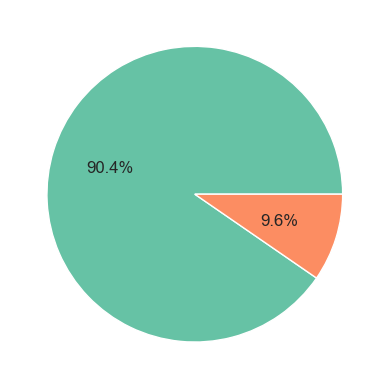

In [155]:
plt.pie(data = misclass_df , x = misclass_df["Actual"].value_counts(), autopct = '%1.1f%%')

([<matplotlib.patches.Wedge at 0x1de3cf5dbd0>,
 [Text(-1.031810979134434, 0.3812690694740925, ''),
  Text(1.031810979134434, -0.3812690694740926, '')],
 [Text(-0.5628059886187822, 0.20796494698586862, '88.7%'),
  Text(0.5628059886187822, -0.20796494698586868, '11.3%')])

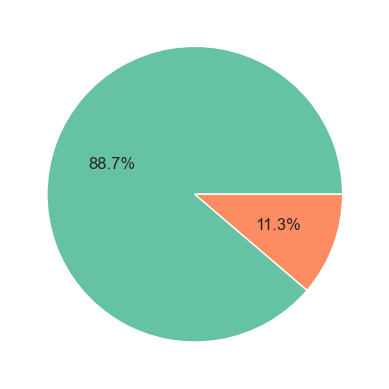

In [156]:
plt.pie(data = misclass_df  , x = misclass_df["Predicted"].value_counts() , autopct = '%1.1f%%')

* __Percentage of value predicted by our model has been very close to the actual values. Lets find out
False Negative and False Positive observations__

In [157]:
pd.crosstab(misclass_df['Predicted'] , misclass_df['Actual'] , margins = True)

Actual        0    1   All
Predicted                 
0          1325    6  1331
1            31  138   169
All        1356  144  1500

In [158]:
pd.crosstab(misclass_df['Predicted'] , misclass_df['Actual'], normalize = 'index')

Actual       0    1
Predicted          
0         1.00 0.00
1         0.18 0.82

<Axes: xlabel='Predicted'>

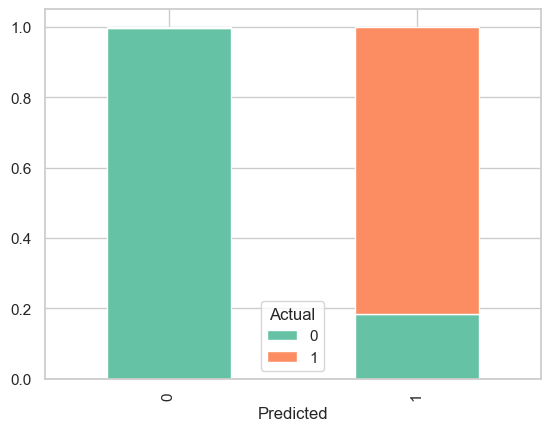

In [162]:
pd.crosstab(misclass_df['Predicted'],misclass_df['Actual'],normalize='index').plot(kind = 'bar' , stacked= True)

In [164]:
# Rows that were classified as Negative when they were actually positive

fn_rows = misclass_df[(misclass_df['Actual'] == 1) & (misclass_df['Predicted'] == 0)]

In [165]:
false_negative = df_Decision[df_Decision.index.isin(fn_rows.index.values)].copy()

In [166]:
false_negative

Age  Income Family  CCAvg Education  Mortgage PersonalLoan  \
322    63     101      1   3.90         1         0            1   
1069   44      75      2   3.50         1         0            1   
1518   43      64      4   3.00         3       221            1   
2533   54     111      1   1.10         2         0            1   
2623   42     111      3   3.00         1         0            1   
2996   42     103      1   3.33         1         0            1   

     SecuritiesAccount CDAccount Online CreditCard             Regions  
322                  1         1      1          0            Southern  
1069                 0         0      1          0  Los Angeles Region  
1518                 0         0      1          0            Bay Area  
2533                 0         0      1          0            Southern  
2623                 1         1      0          1            Bay Area  
2996                 1         1      1          1  Los Angeles Region

__Our model predicted 6 customers wrongly. On analyzing the Income , Education,Family , we can see the income is not in range of High income group and education is undergrad for most of them and there average spending is also low. These cases are some exceptions.__

In [172]:
# Rows that were classified as positive when they were actually negative

fp_rows = misclass_df[(misclass_df['Actual'] == 0) & (misclass_df['Predicted']== 1)]


false_positive = df_Decision[df_Decision.index.isin(fp_rows.index.values)].copy()
false_positive

Age  Income Family  CCAvg Education  Mortgage PersonalLoan  \
10     65     105      4   2.40         3         0            0   
82     41      82      1   4.00         3         0            0   
185    39     115      1   1.00         3         0            0   
621    41     114      2   1.80         2         0            0   
640    43      85      1   3.70         3       327            0   
683    40      82      1   3.60         2         0            0   
731    28      90      2   3.30         1         0            0   
746    62      85      4   3.40         2         0            0   
792    41      98      1   4.00         3         0            0   
932    51     112      3   1.80         2         0            0   
950    32     112      4   1.80         2         0            0   
973    43      85      1   4.00         3       287            0   
986    53     101      4   4.90         1         0            0   
1263   35      85      4   4.00         3         0            0   
1303   29     112      2   2.00         2       382            0   
1401   40      84      1   3.70         3         0            0   
1910   43      83      2   3.80         3       112            0   
2437   65     114      4   3.40         2         0            0   
3064   59      83      3   4.40         1         0            0   
3081   36      78      2   4.50         3       204            0   
3263   32      84      4   3.40         1         0            0   
3322   41     104      1   4.00         3         0            0   
3409   29     113      2   2.00         2        84            0   
3468   43     113      2   1.80         2         0            0   
3754   63     112      4   2.40         3         0            0   
4419   42      85      1   3.70         3       272            0   
4492   56      91      1   3.00         3         0            0   
4570   32      99      2   4.50         3       249            0   
4671   39     104      1   4.00         3         0            0   
4678   33     115      1   2.70         2       283            0   
4815   58      99      2   1.40         1         0            0   

     SecuritiesAccount CDAccount Online CreditCard             Regions  
10                   0         0      0          0            Bay Area  
82                   0         0      1          0            Southern  
185                  0         0      1          0            Southern  
621                  0         0      1          0  Los Angeles Region  
640                  1         0      1          0            Bay Area  
683                  0         0      0          0  Los Angeles Region  
731                  0         0      1          1  Los Angeles Region  
746                  0         0      1          0            Bay Area  
792                  0         0      0          1            Southern  
932                  1         1      1          1            Bay Area  
950                  0         0      1          0            Bay Area  
973                  0         0      1          0            Southern  
986                  0         0      1          0  Los Angeles Region  
1263                 0         0      1          0            Southern  
1303                 1         0      0          0            Bay Area  
1401                 0         0      1          0            Bay Area  
1910                 0         0      0          0             Central  
2437                 0         0      0          1            Bay Area  
3064                 0         0      1          0            Bay Area  
3081                 0         0      1          1            Bay Area  
3263                 0         0      1          0            Southern  
3322                 0         1      1          1            Southern  
3409                 0         0      1          1             Central  
3468                 0         0      0          1            Bay Area  
3754

__On analyzing the Education, we can see most of them have education as Advance or Graduate. These
cases are some exceptions__

### Recommendation

* __Decision trees doesn't require to much data preparation or handling of outliers like logistic regression. They are easy to understand. Decision tress can easily overfit , so we have to be careful using decision tree.__

* __Based on EDA, logistic Regression , Decision tree , Income ,Educatoin,Family,CCavg are most important factor.__

* __Customers who have income above 98k dollars , Advance/graduate level education, a family of more than 2, such customers have higher chances of taking personal loans.__

* __So for this campaign we can have different profiles for customers.__

* __High Profile Clients :-Higher income,Advanced/Graduate level education, 3 /4 Family members,high spending__

* __Average Profile :- Medium income group,Graduate level education.3/4Family members,medium spending__

* __Low Profile:-Lower income group,undergrads ,3/4Family Member,low spending
Customer Average Spending and Mortages can also be looked upon as based on EDA and logistic__

* __Customer Average Spending and Mortages can also be looked upon as based on EDA and logistic Regression this parameters also play some role in likelihood of buy loan.__

* __We can 1st target high profile customers , by providing them with a personal relationship managers who can address there concerns and can pursue them to buy loan from the bank with completive interest rates.__

* __Prequalifying for Loan can also attract more customers.__

* __Our 2nd target would be Medium profile customers.__

* __The model cannot identify well if there are some exceptional cases when low profile customer is ready to buy a personal loan.__